# Importing Libraries

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm, boxcox
from scipy import stats
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import pickle as pk

# Getting data

In [120]:
data = pd.read_csv('used_device_data.csv')

# Initial Review

In [121]:
data.head()

device_brand       os  screen_size   4g   5g  rear_camera_mp  \
0        Honor  Android        14.50  yes   no            13.0   
1        Honor  Android        17.30  yes  yes            13.0   
2        Honor  Android        16.69  yes  yes            13.0   
3        Honor  Android        25.50  yes  yes            13.0   
4        Honor  Android        15.32  yes   no            13.0   

   front_camera_mp  internal_memory  ram  battery  weight  release_year  \
0              5.0             64.0  3.0   3020.0   146.0          2020   
1             16.0            128.0  8.0   4300.0   213.0          2020   
2              8.0            128.0  8.0   4200.0   213.0          2020   
3              8.0             64.0  6.0   7250.0   480.0          2020   
4              8.0             64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [123]:
data.describe()

screen_size  rear_camera_mp  front_camera_mp  internal_memory  \
count  3454.000000     3275.000000      3452.000000      3450.000000   
mean     13.713115        9.460208         6.554229        54.573099   
std       3.805280        4.815461         6.970372        84.972371   
min       5.080000        0.080000         0.000000         0.010000   
25%      12.700000        5.000000         2.000000        16.000000   
50%      12.830000        8.000000         5.000000        32.000000   
75%      15.340000       13.000000         8.000000        64.000000   
max      30.710000       48.000000        32.000000      1024.000000   

               ram      battery       weight  release_year    days_used  \
count  3450.000000  3448.000000  3447.000000   3454.000000  3454.000000   
mean      4.036122  3133.402697   182.751871   2015.965258   674.869716   
std       1.365105  1299.682844    88.413228      2.298455   248.580166   
min       0.020000   500.000000    69.000000   2013.000000    91.000000   
25%       4.000000  2100.000000   142.000000   2014.000000   533.500000   
50%       4.000000  3000.000000   160.000000   2015.500000   690.500000   
75%       4.000000  4000.000000   185.000000   2018.000000   868.750000   
max      12.000000  9720.000000   855.000000   2020.000000  1094.000000   

       normalized_used_price  normalized_new_price  
count            3454.000000           3454.000000  
mean                4.364712              5.233107  
std                 0.588914              0.683637  
min                 1.536867              2.901422  
25%                 4.033931              4.790342  
50%                 4.405133              5.245892  
75%                 4.755700              5.673718  
max                 6.619433              7.847841

# Checking Missing Values

In [124]:
data.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<Axes: >

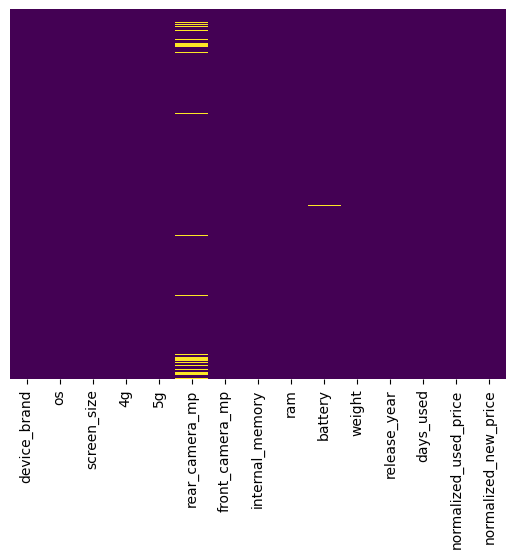

In [125]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Missing Values found!

In [126]:
data = data.dropna()

## Missing values dropped!

<Axes: >

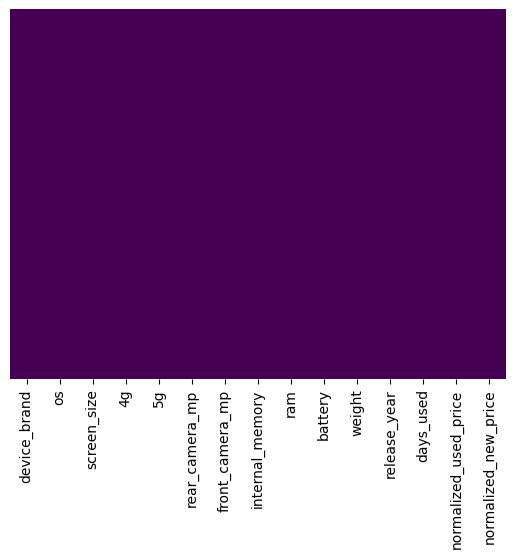

In [127]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Checking duplicate values

In [128]:
data.duplicated().sum()

np.int64(0)

## No duplicate values found!

## Mapping categorical features(4G,5G)

In [129]:
dict_G = {'yes':1,'no':0}

In [130]:
data['4g'] = data['4g'].map(dict_G)

In [131]:
data['5g'] = data['5g'].map(dict_G)

In [132]:
brand_dict = data.groupby(['device_brand'])['normalized_used_price'].median().to_dict()
data['Device_Brand'] = data['device_brand'].map(brand_dict)

In [133]:
data.head()

device_brand       os  screen_size  4g  5g  rear_camera_mp  front_camera_mp  \
0        Honor  Android        14.50   1   0            13.0              5.0   
1        Honor  Android        17.30   1   1            13.0             16.0   
2        Honor  Android        16.69   1   1            13.0              8.0   
3        Honor  Android        25.50   1   1            13.0              8.0   
4        Honor  Android        15.32   1   0            13.0              8.0   

   internal_memory  ram  battery  weight  release_year  days_used  \
0             64.0  3.0   3020.0   146.0          2020        127   
1            128.0  8.0   4300.0   213.0          2020        325   
2            128.0  8.0   4200.0   213.0          2020        162   
3             64.0  6.0   7250.0   480.0          2020        345   
4             64.0  3.0   5000.0   185.0          2020        293   

   normalized_used_price  normalized_new_price  Device_Brand  
0               4.307572              4.715100      4.683326  
1               5.162097              5.519018      4.683326  
2               5.111084              5.884631      4.683326  
3               5.135387              5.630961      4.683326  
4               4.389995              4.947837      4.683326

# Exploring Categorical features

In [134]:
len(data.device_brand.value_counts())

33

In [135]:
data.device_brand.unique()

array(['Honor', 'Others', 'HTC', 'Huawei', 'Lava', 'Lenovo', 'LG',
       'Micromax', 'Nokia', 'Oppo', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE',
       'Apple', 'Asus', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon',
       'Coolpad', 'Gionee', 'Google', 'Karbonn', 'Meizu', 'Microsoft',
       'Motorola', 'OnePlus', 'Panasonic', 'Realme', 'Sony', 'Spice',
       'XOLO'], dtype=object)

In [136]:
Max_brand = data['device_brand'].value_counts().sort_values(ascending=False)[0:20]
Max_brand.name = 'Count'
Max_brand.index.name = 'Brands'

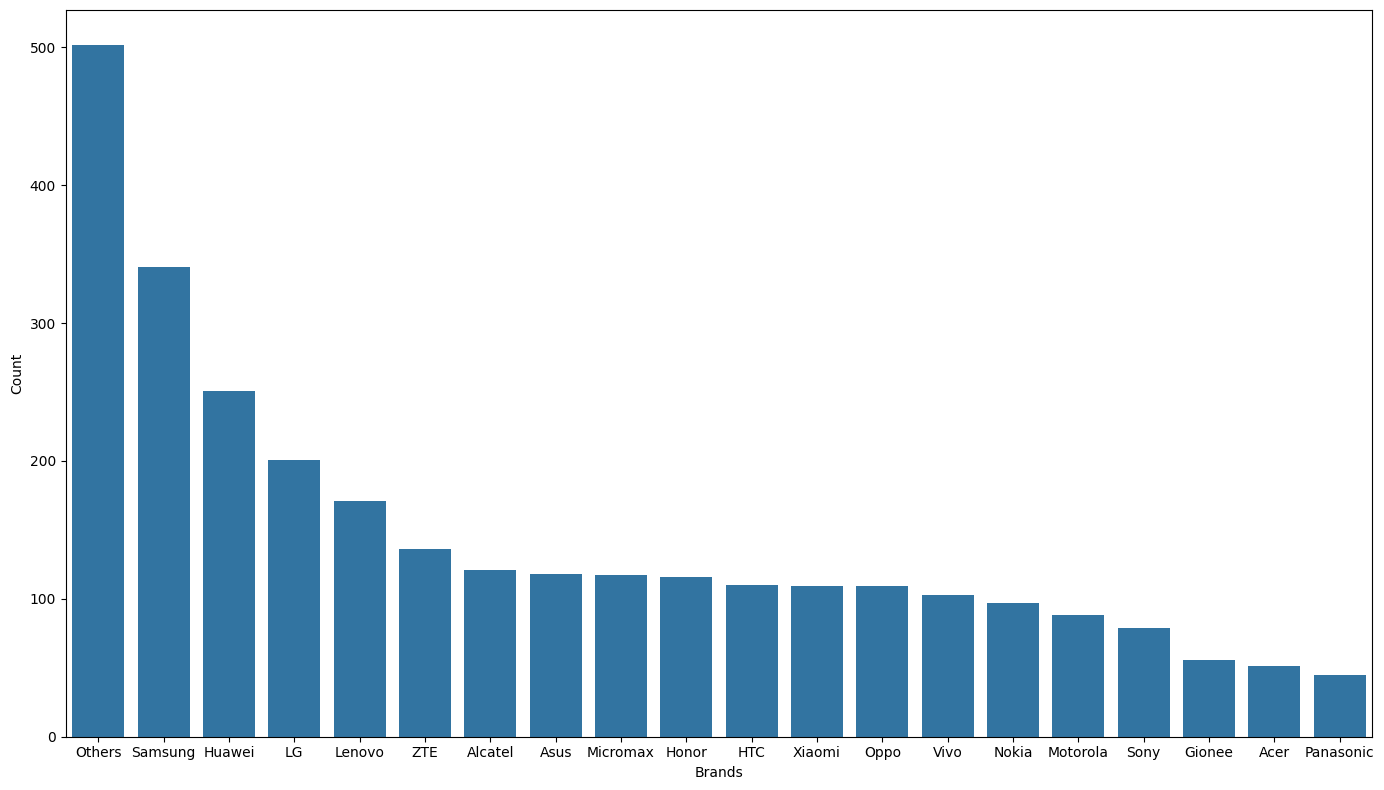

In [137]:
fig = plt.figure(figsize=(14,8))
sns.barplot(x=Max_brand.index,y= Max_brand)
plt.tight_layout()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Honor'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'HTC'),
  Text(3, 0, 'Huawei'),
  Text(4, 0, 'Lava'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'LG'),
  Text(7, 0, 'Micromax'),
  Text(8, 0, 'Nokia'),
  Text(9, 0, 'Oppo'),
  Text(10, 0, 'Samsung'),
  Text(11, 0, 'Vivo'),
  Text(12, 0, 'Xiaomi'),
  Text(13, 0, 'ZTE'),
  Text(14, 0, 'Apple'),
  Text(15, 0, 'Asus'),
  Text(16, 0, 'Acer'),
  Text(17, 0, 'Alcatel'),
  Text(18, 0, 'BlackBerry'),
  Text(19, 0, 'Celkon'),
  Text(20, 0, 'Coolpad'),
  Text(21, 0, 'Gionee'),
  Text(22, 0, 'Google'),
  Text(23, 0, 'Karbonn'),
  Text(24, 0, 'Meizu'),
  Text(25, 0, 'Microsoft'),
  Text(26, 0, 'Motorola'),
  Text(27, 0, 'OnePlus'),
  Text(28, 0, 'Panasonic'),
  Text(29, 0, 'Realme'),
  Text(30, 0, 'Sony'),
  Text(31, 0, 'Spice'),
  Text(32, 0, 'XOLO')])

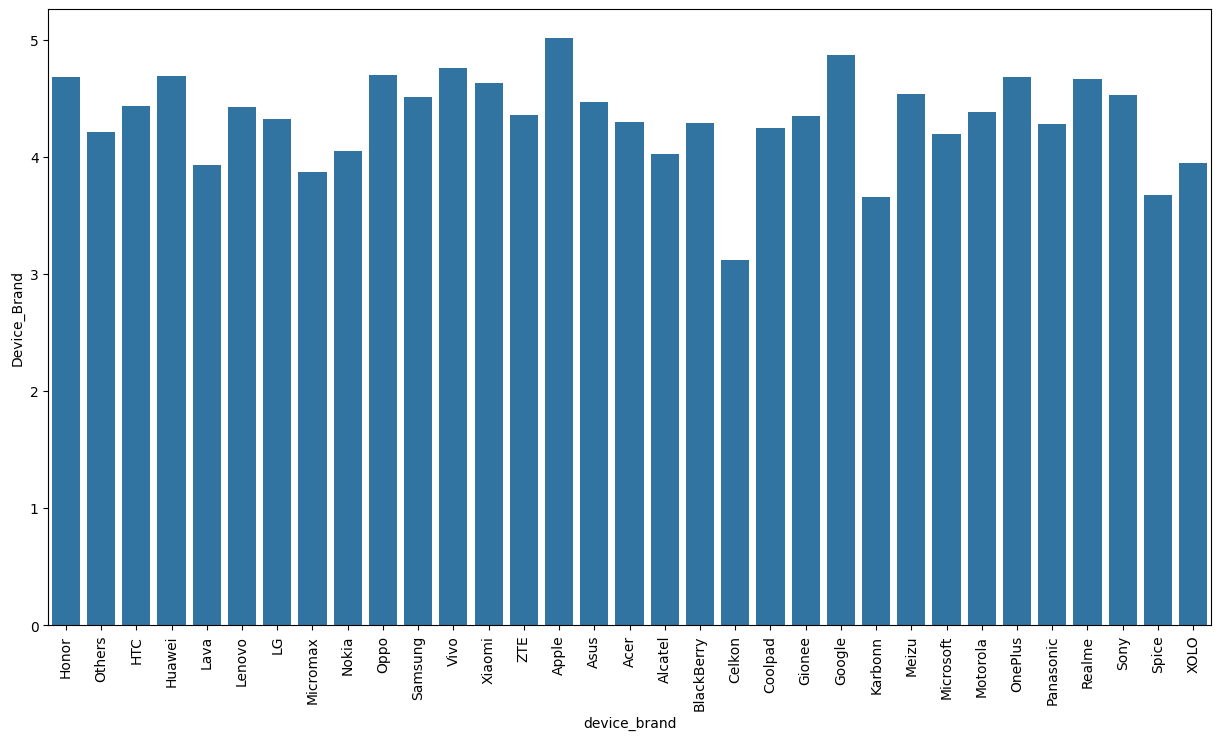

In [138]:
fig = plt.figure(figsize=(15,8))
sns.barplot(y=data['Device_Brand'],x=data['device_brand'])
plt.xticks(rotation=90)

In [139]:
data.os.value_counts()

os
Android    3024
Others      128
Windows      65
iOS          36
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='os'>

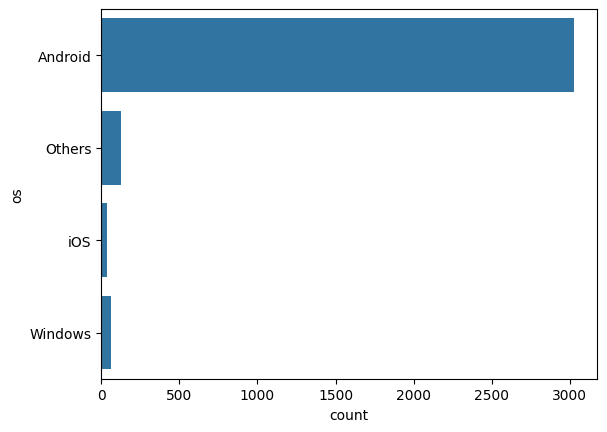

In [140]:
sns.countplot(data['os'])

## Android phones are highest in number

In [141]:
data['5g'].value_counts()

5g
0    3168
1      85
Name: count, dtype: int64

<Axes: ylabel='count'>

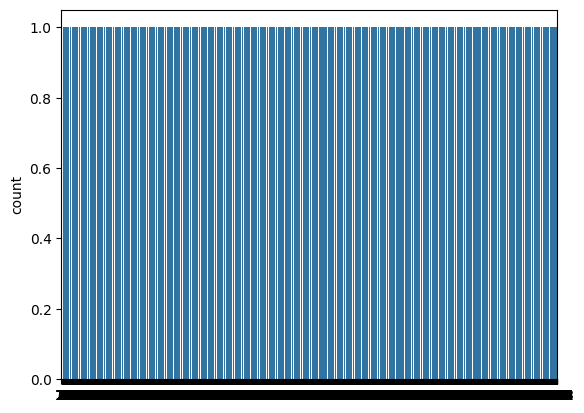

In [142]:
sns.countplot(data['5g'])

## There are very few phones with 5G

In [143]:
data['4g'].value_counts()

4g
1    2148
0    1105
Name: count, dtype: int64

<Axes: ylabel='count'>

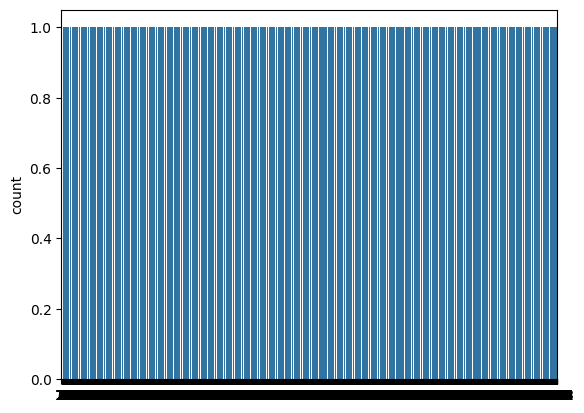

In [144]:
sns.countplot(data['4g'])

## There are more phones 4G enabled

In [145]:
data['ram'].value_counts()

ram
4.00     2755
6.00      109
8.00       88
0.25       83
2.00       70
3.00       64
1.00       34
0.03       16
0.02       14
12.00      10
0.50        9
1.50        1
Name: count, dtype: int64

<Axes: ylabel='count'>

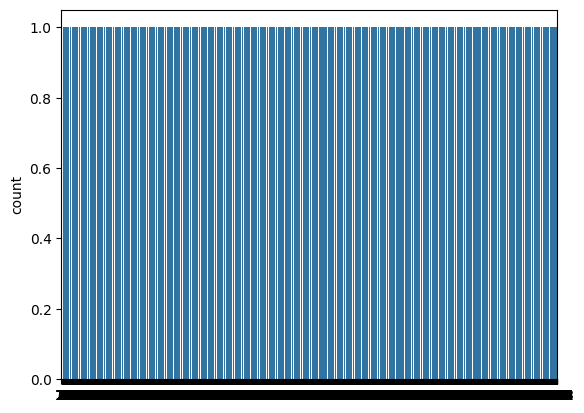

In [146]:
sns.countplot(data['ram'])

## Most phones have 4GB Ram

In [147]:
data['release_year'].value_counts()

release_year
2014    639
2013    567
2015    507
2019    399
2016    381
2018    310
2017    297
2020    153
Name: count, dtype: int64

<Axes: ylabel='count'>

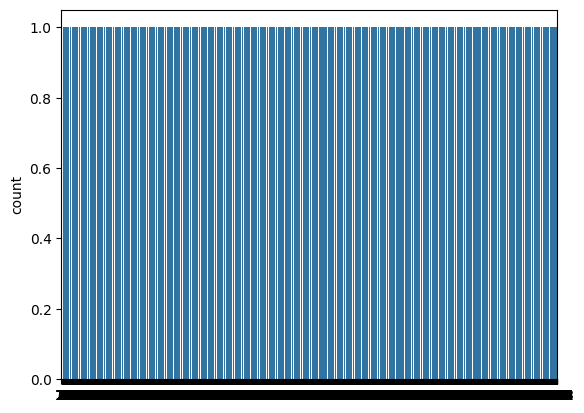

In [148]:
sns.countplot(data['release_year'])

In [149]:
data['internal_memory'].value_counts()

internal_memory
16.00      1278
32.00      1042
64.00       455
128.00      297
256.00       69
512.00       44
0.10         16
0.06         14
8.00         12
4.00         10
1024.00       8
0.50          4
0.20          2
24.00         1
0.01          1
Name: count, dtype: int64

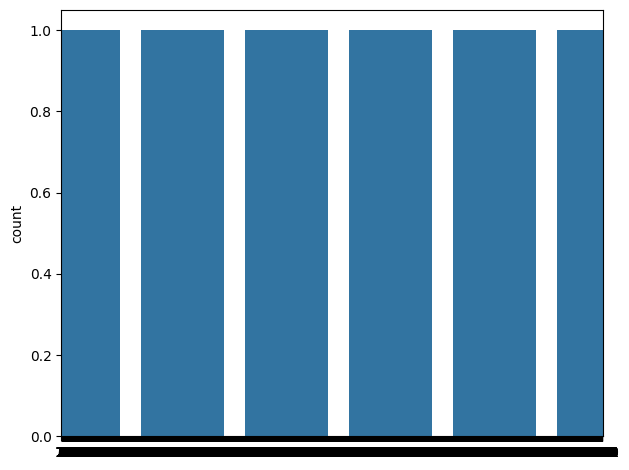

In [150]:
sns.countplot(data['internal_memory'])
plt.tight_layout()

## Relation between target variable and categorical features

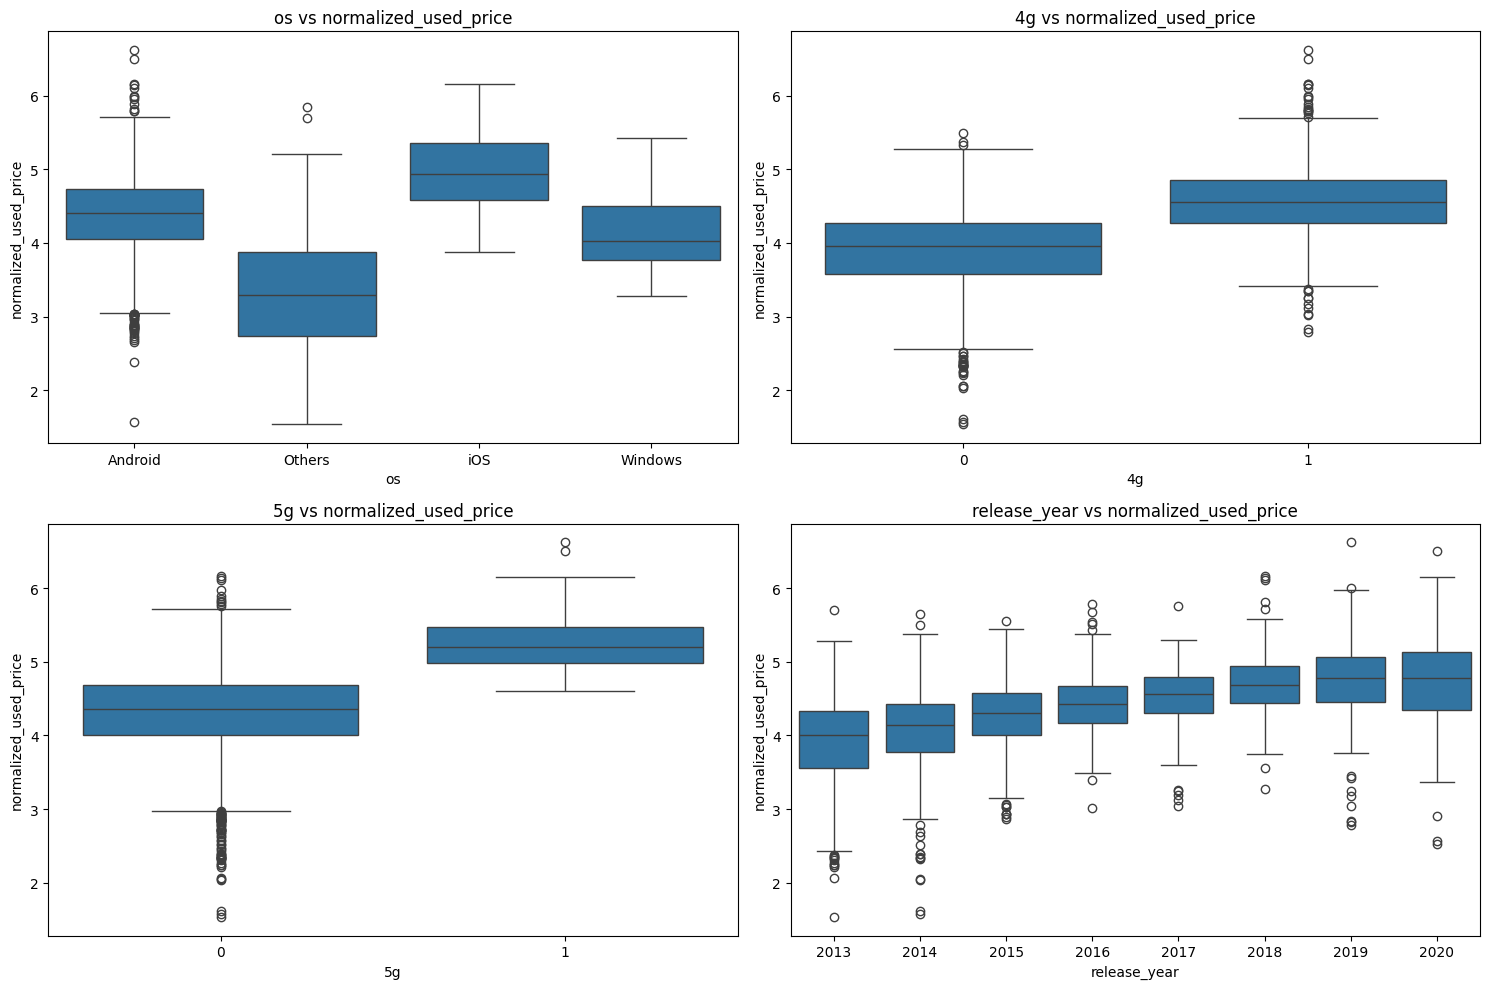

In [151]:
fig,ax = plt.subplots(2,2,figsize = (15,10))

sns.boxplot(x = 'os', y = 'normalized_used_price', data = data,ax=ax[0,0])
ax[0,0].set_title('os vs normalized_used_price')

sns.boxplot(x = '4g', y = 'normalized_used_price', data = data,ax=ax[0,1])
ax[0,1].set_title('4g vs normalized_used_price')

sns.boxplot(x = '5g', y = 'normalized_used_price', data = data,ax=ax[1,0])
ax[1,0].set_title('5g vs normalized_used_price')

sns.boxplot(x = 'release_year', y = 'normalized_used_price', data = data,ax=ax[1,1])
ax[1,1].set_title('release_year vs normalized_used_price')

plt.tight_layout()
plt.show()

## Through these visualizations we can see that : 
## -  phones with os as ios are priced higher than phones with other os
## -  5G enabled phones are priced higher
## -  4G enabled phones are priced higher
## -  Phones from recent years are priced higher than phones from previous years

In [152]:
data.columns

Index(['device_brand', 'os', 'screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price', 'Device_Brand'],
      dtype='object')

In [153]:
numerical_features = ['screen_size','rear_camera_mp','front_camera_mp','battery','weight','days_used','normalized_new_price', 'normalized_used_price']

# Checking distribution of data

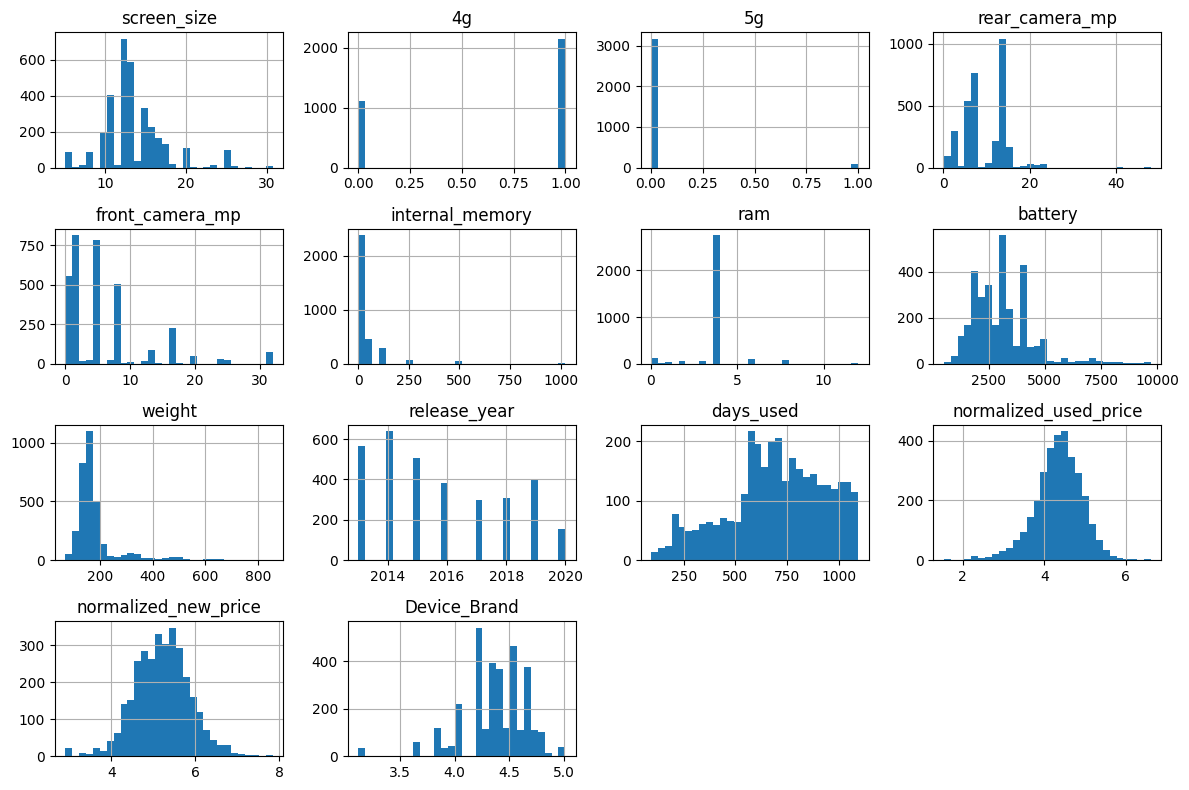

In [154]:
data.hist(figsize=(12,8),bins=30)
plt.tight_layout()

## Function to visualize relationship between target variable and numerical features

In [155]:
def bivariate_analysis(x):
    plt.figure(figsize=(10,6))
    ax = sns.regplot(x=x, y='normalized_used_price',data=data)
    ax.set_title("Used Price vs "+x, fontsize=25)
    ax.set_xlabel(x, fontsize=20)
    ax.set_ylabel('normalized_used_price', fontsize=20)
    plt.locator_params(axis='x', nbins=10)

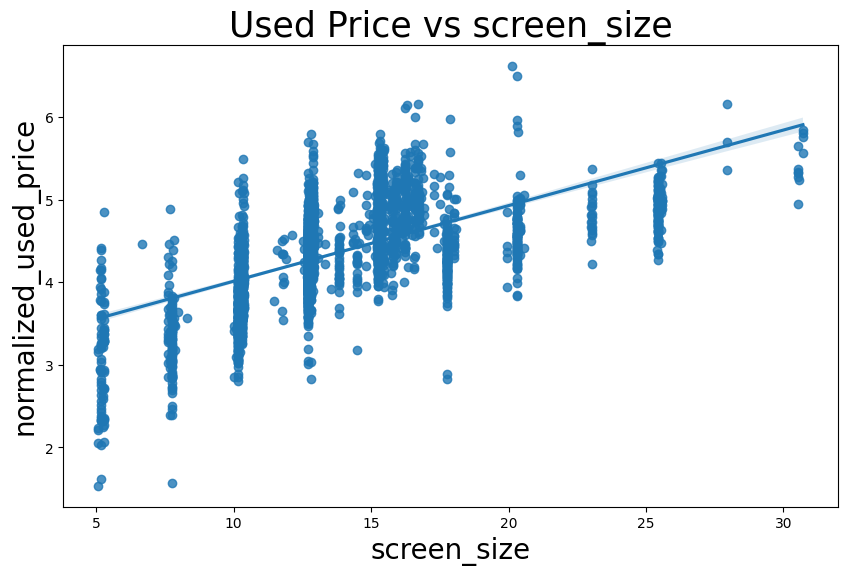

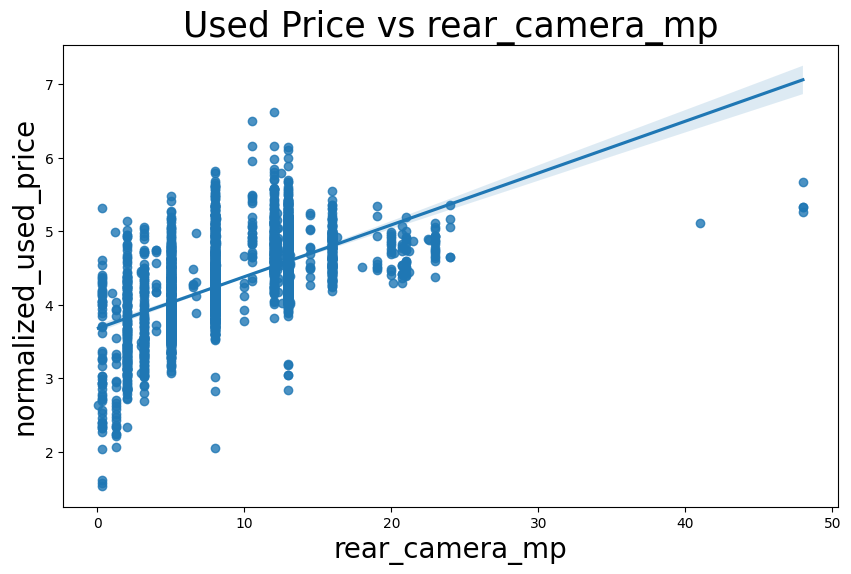

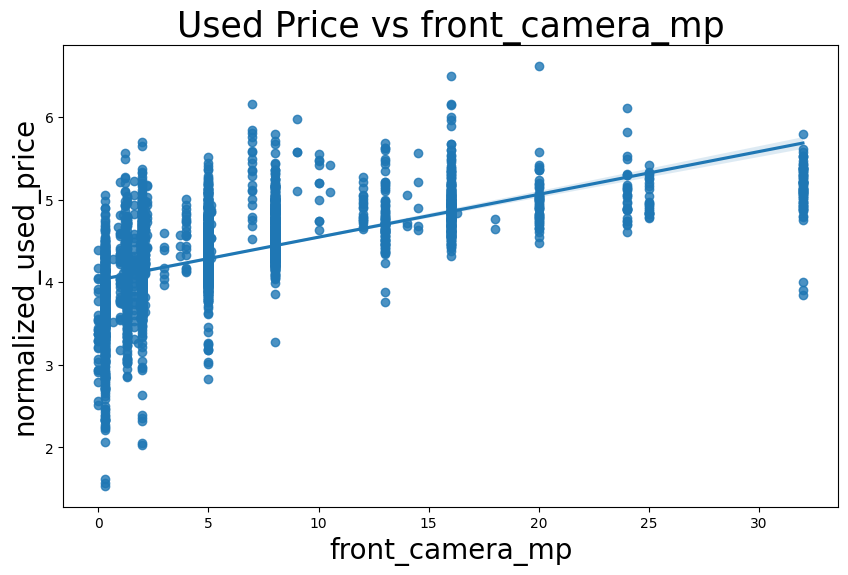

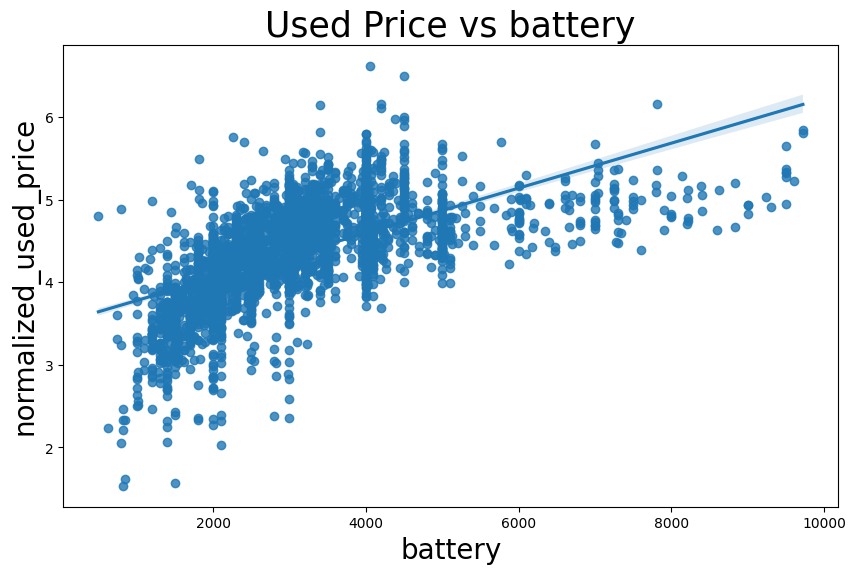

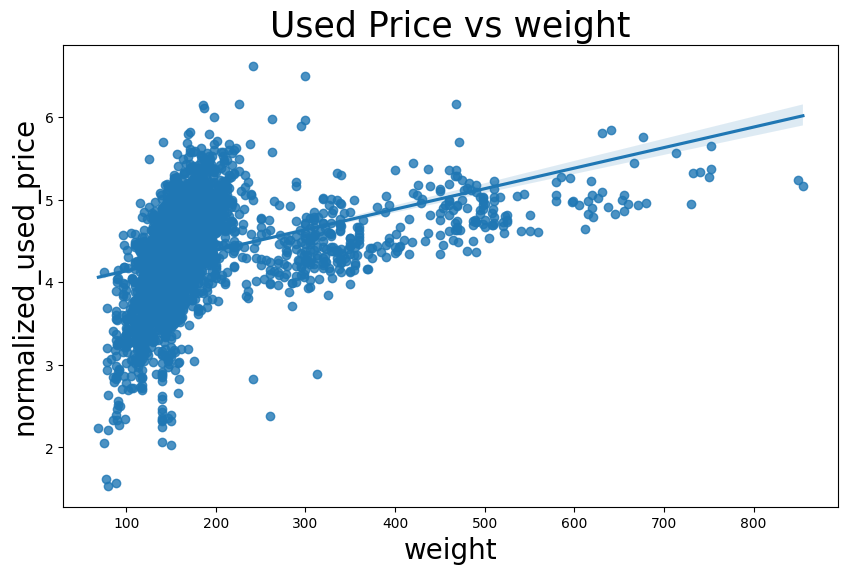

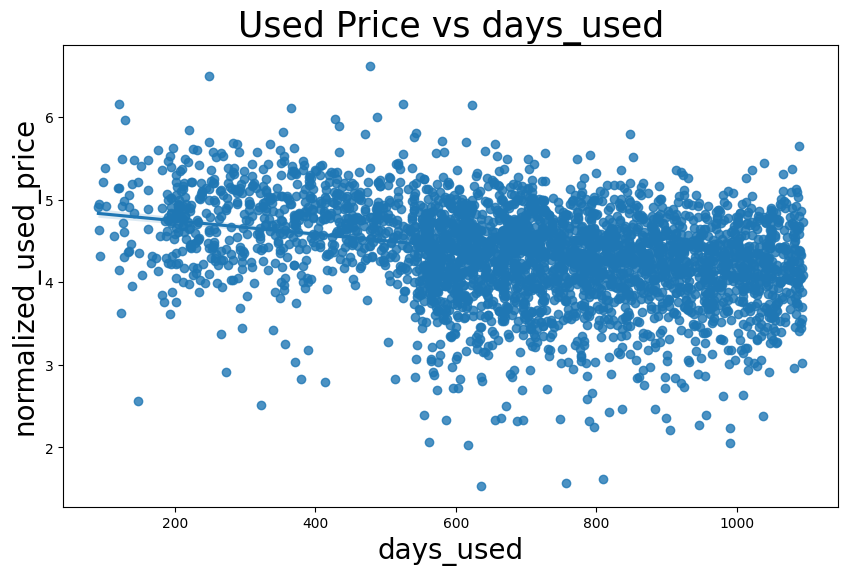

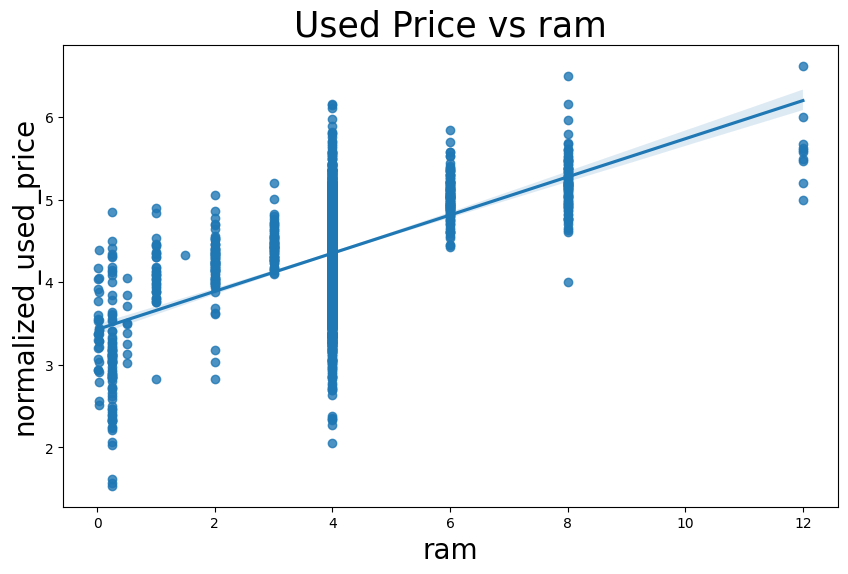

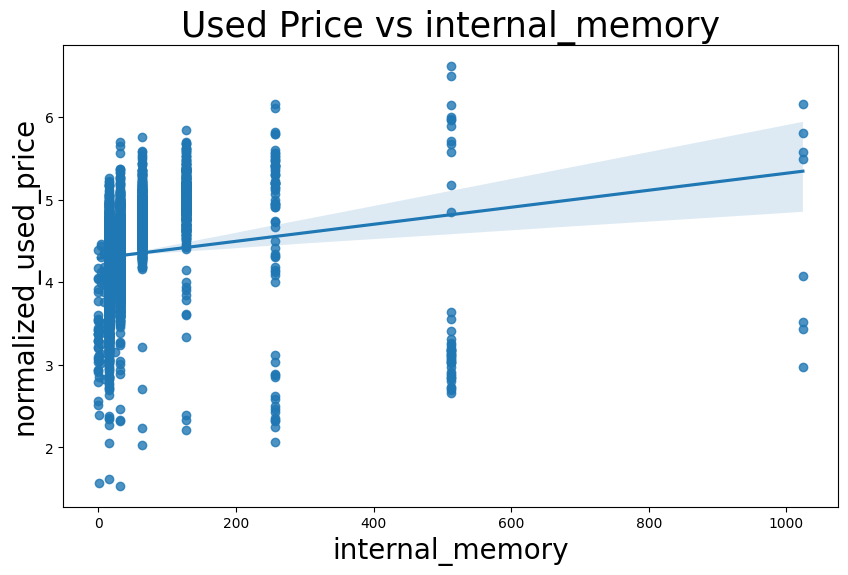

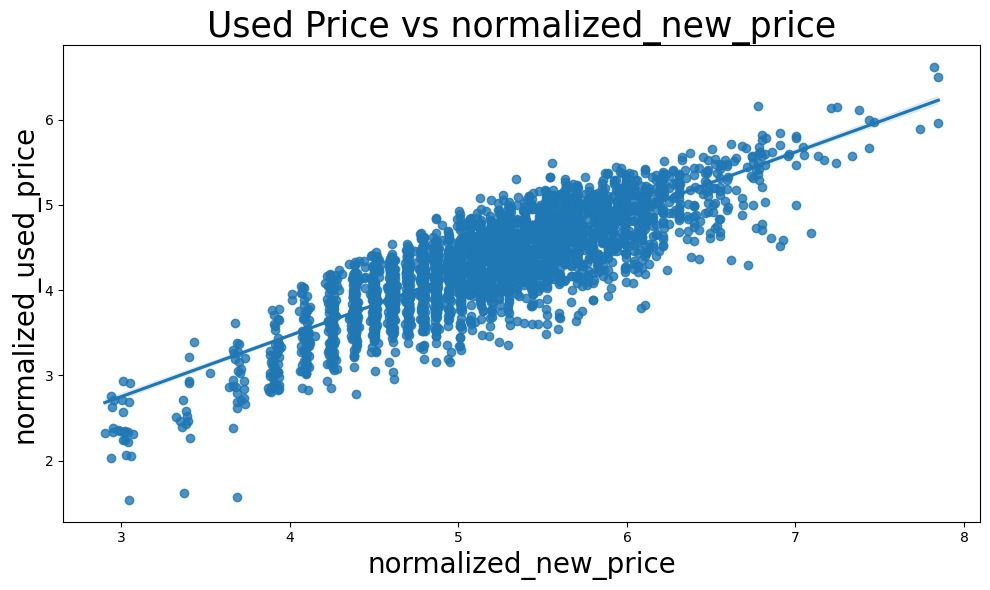

In [156]:
cols = ['screen_size','rear_camera_mp','front_camera_mp','battery','weight','days_used','ram','internal_memory','normalized_new_price']
for x in cols:
    bivariate_analysis(x)
plt.tight_layout()

# Multivariate Analysis

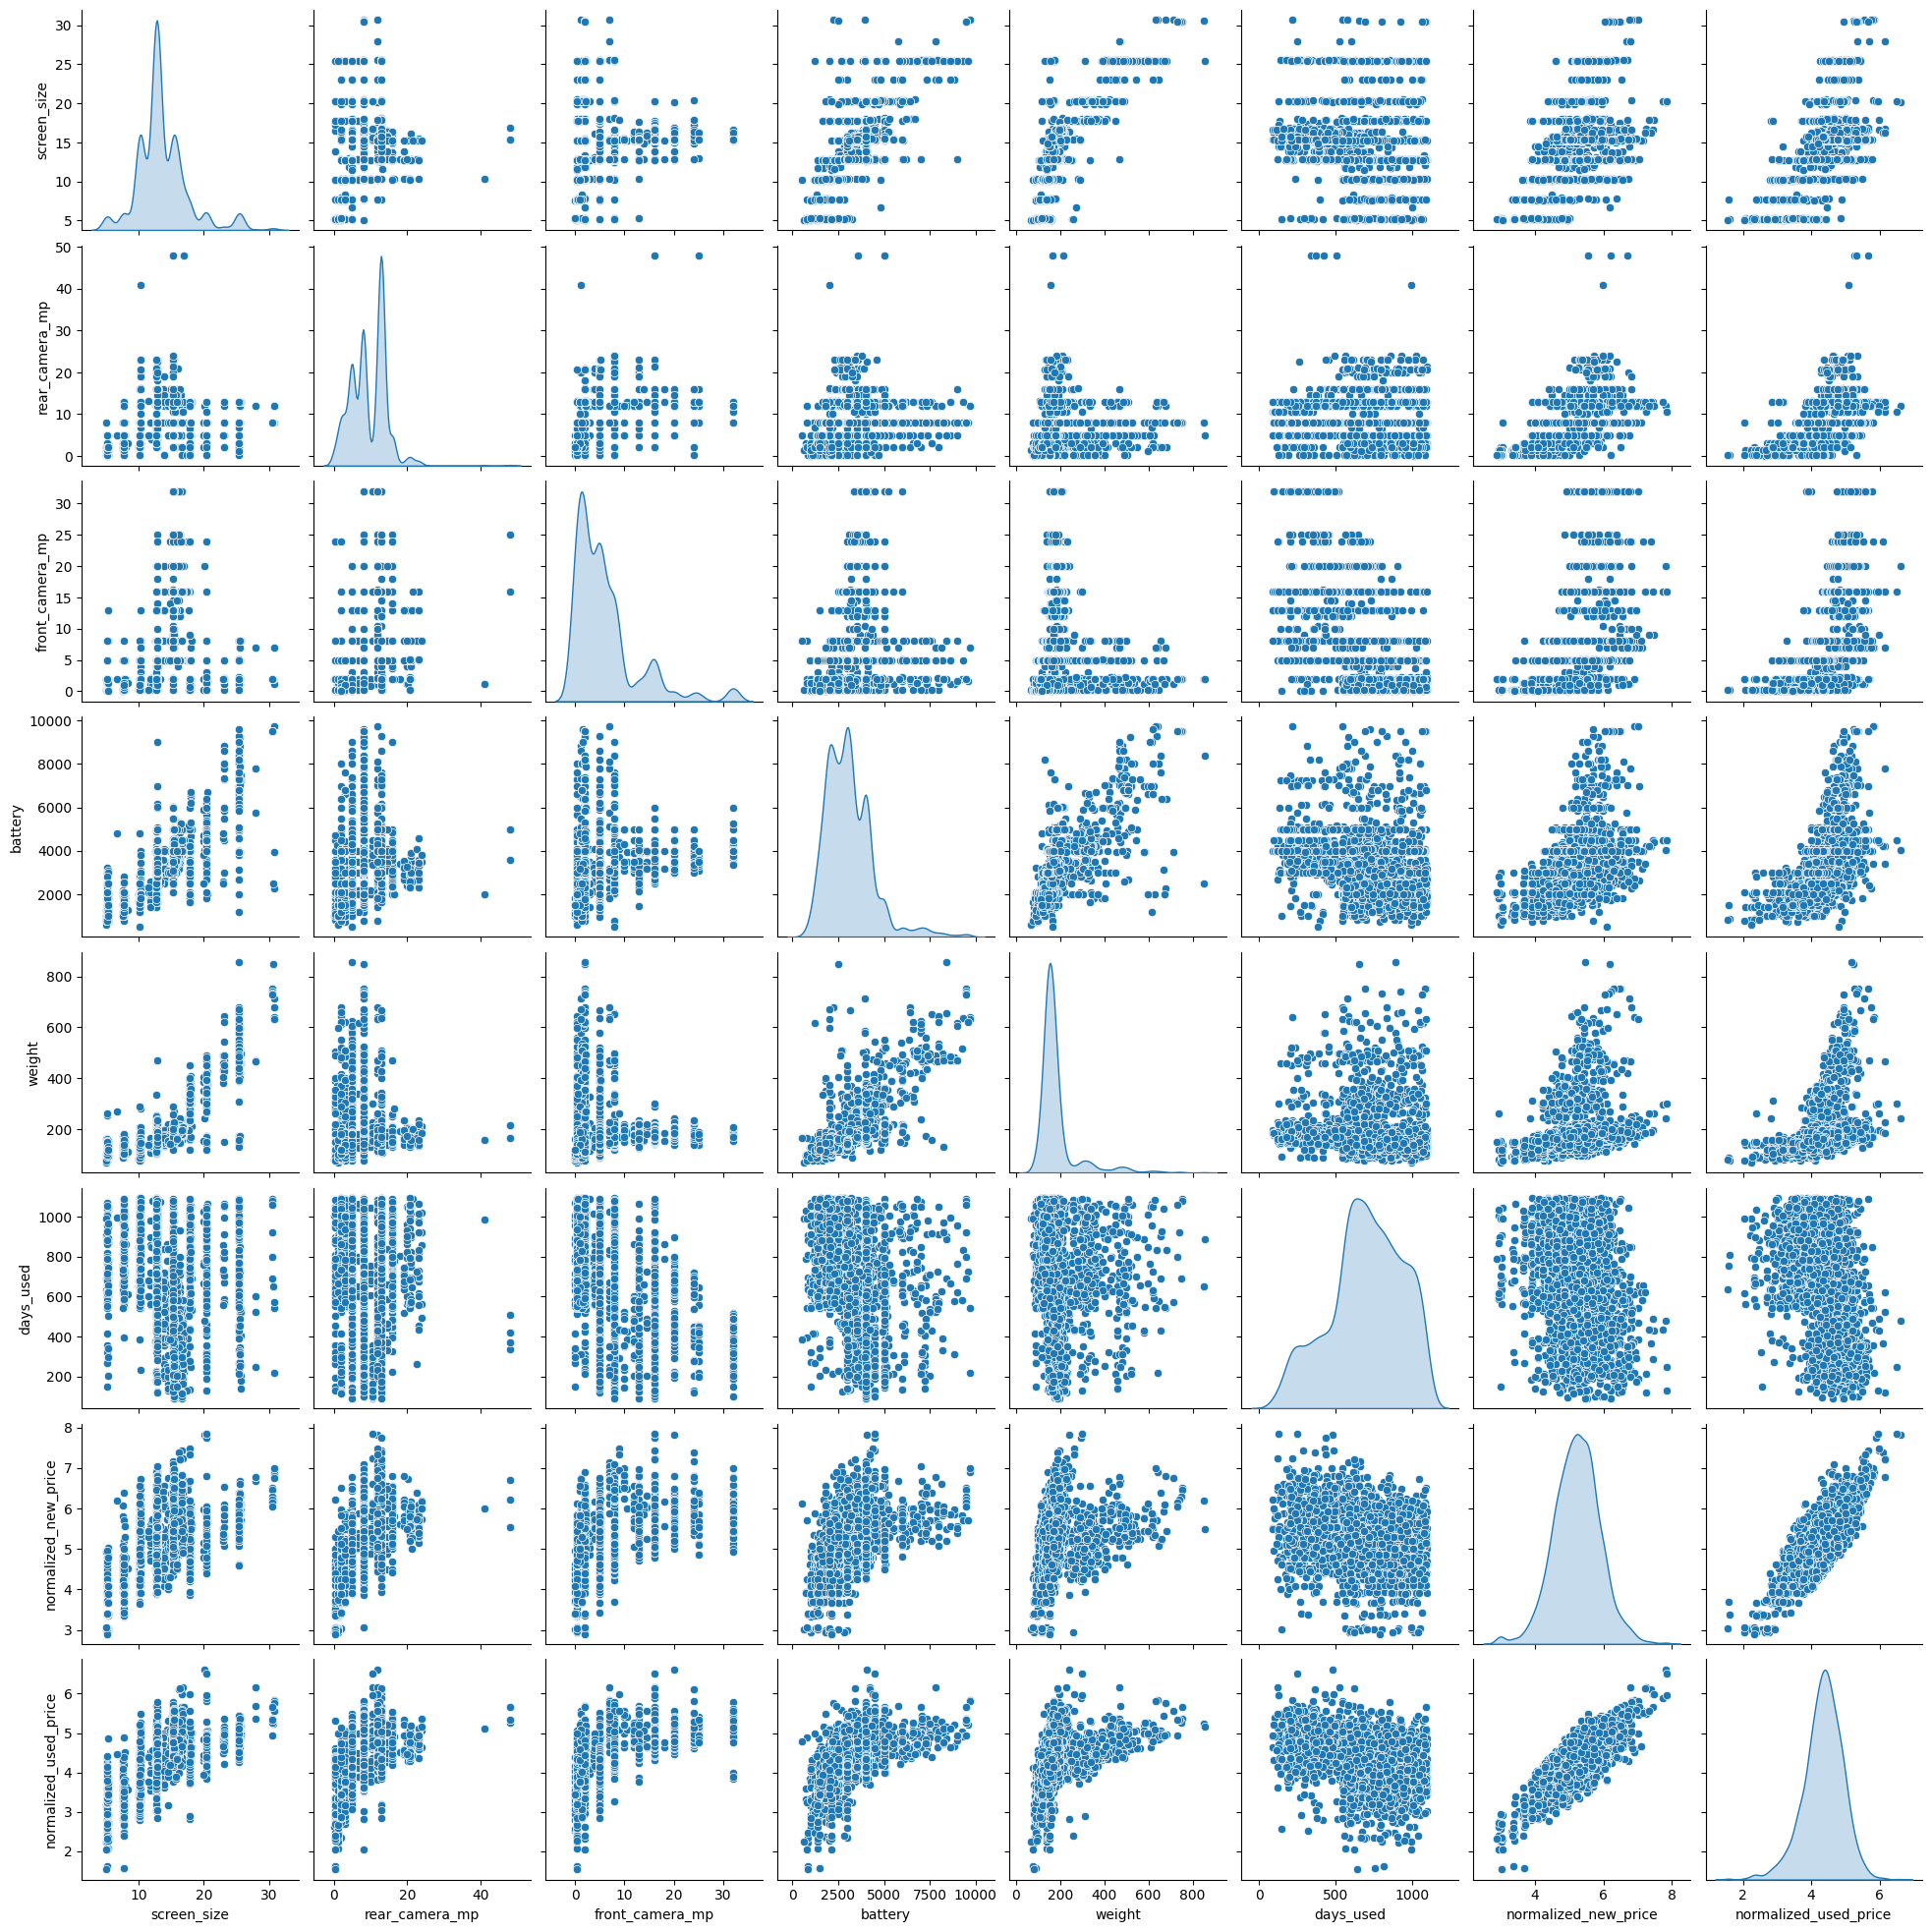

In [157]:
sns.pairplot(data[numerical_features],diag_kind='kde')

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'Honor'

<Figure size 1200x800 with 0 Axes>

# Relation between Features  
- __Used Price__ has the highest <font color=green>__positive__</font> correlation with __New Price__, followed by __battery__, __front camera__, __screen size__, __rear camera__ and __4G__.
- __Used Price__ has the highest <font color=red>__negative__</font> correlation with __Weight__ followed by __Days Used__. 

### There is a <font color=green>__positive__</font> correlation between  
   -  __Battery__ and __Screen Size__ __(HIGH)__    
   -  __Release Year__ and __Front Camera__ __(MODERATE)__  
   -  __Front Camera__ and __4G__ __(MODERATE)__  
   -  __Front Camera__ and __Rear Camera__ __(MODERATE)__  
   -  __Release Year__ and __4G__ __(MODERATE)__  
   -  __Rear Camera__ and __4G__ __(LOW)__  
   -  __Rear Camera__ and __New Price__ __(LOW)__  
   -  __New Price__ and __Battery__ __(LOW)__
   -  __New Price__ and __Screen Size__ __(LOW)__  
   -  __New Price__ and __Front Camera__ __(LOW)__    

### There is a <font color=red>__negative__</font> correlation between  
   -  __Battery__ and __Weight__ __(HIGH)__  
   -  __Screen Size__ and __Weight__ __(HIGH)__    
   -  __Days Used__ and __Release Year__ __(MODERATE)__    
   -  __Days used__ and __Front Camera__ __(MODERATE)__   

In [159]:
cols2 = ['screen_size','rear_camera_mp','front_camera_mp','battery','weight','days_used','normalized_new_price','normalized_used_price']

# Checking Outliers

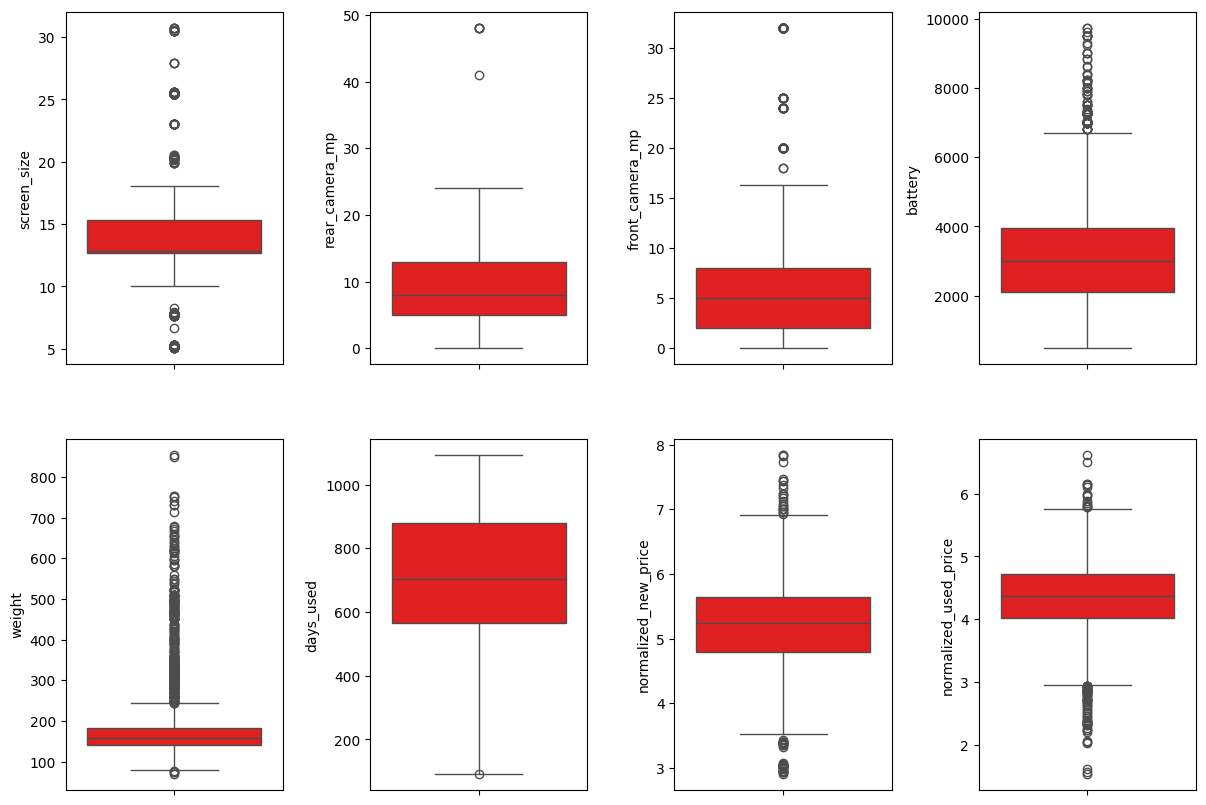

In [160]:
fig,ax=plt.subplots(2,4,figsize=(12,8))
index=0
ax=ax.flatten()
for col in cols2:
    sns.boxplot(y=col, data=data, color='r', ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=1, h_pad=5.0)

## Function to detect outliers

In [161]:
def detect_outliers(columns):
    outlier_indices = []

    for column in columns:
        # 1st quartile
        Q1 = np.percentile(data[column], 25)
        # 3st quartile
        Q3 = np.percentile(data[column], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[column] < Q1 - outlier_step)
                              | (data[column] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
        return outlier_indices

In [162]:
len(detect_outliers(cols2))

440

## 440 Outliers found!

# Checking skewness of data

In [163]:
def check_skweness(columnName):
    print('''Before Correcting''')
    try:
        (mu, sigma) = norm.fit(data[columnName])
    except RuntimeError:
        (mu,sigma) = norm.fit(data[columnName].dropna())
    print("Mu before correcting {} : {}, Sigma before correcting {} : {}".format(
        columnName.upper(), mu, columnName.upper(), sigma))
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    sns.distplot(data[columnName], fit=norm, color="orange")
    plt.title(columnName.upper() +
              " Distplot before Skewness Correction", color="black")
    plt.subplot(1,2,2)
    stats.probplot(data[columnName], plot=plt)
    plt.show();

Before Correcting
Mu before correcting SCREEN_SIZE : 13.617476175837686, Sigma before correcting SCREEN_SIZE : 3.850927722248345


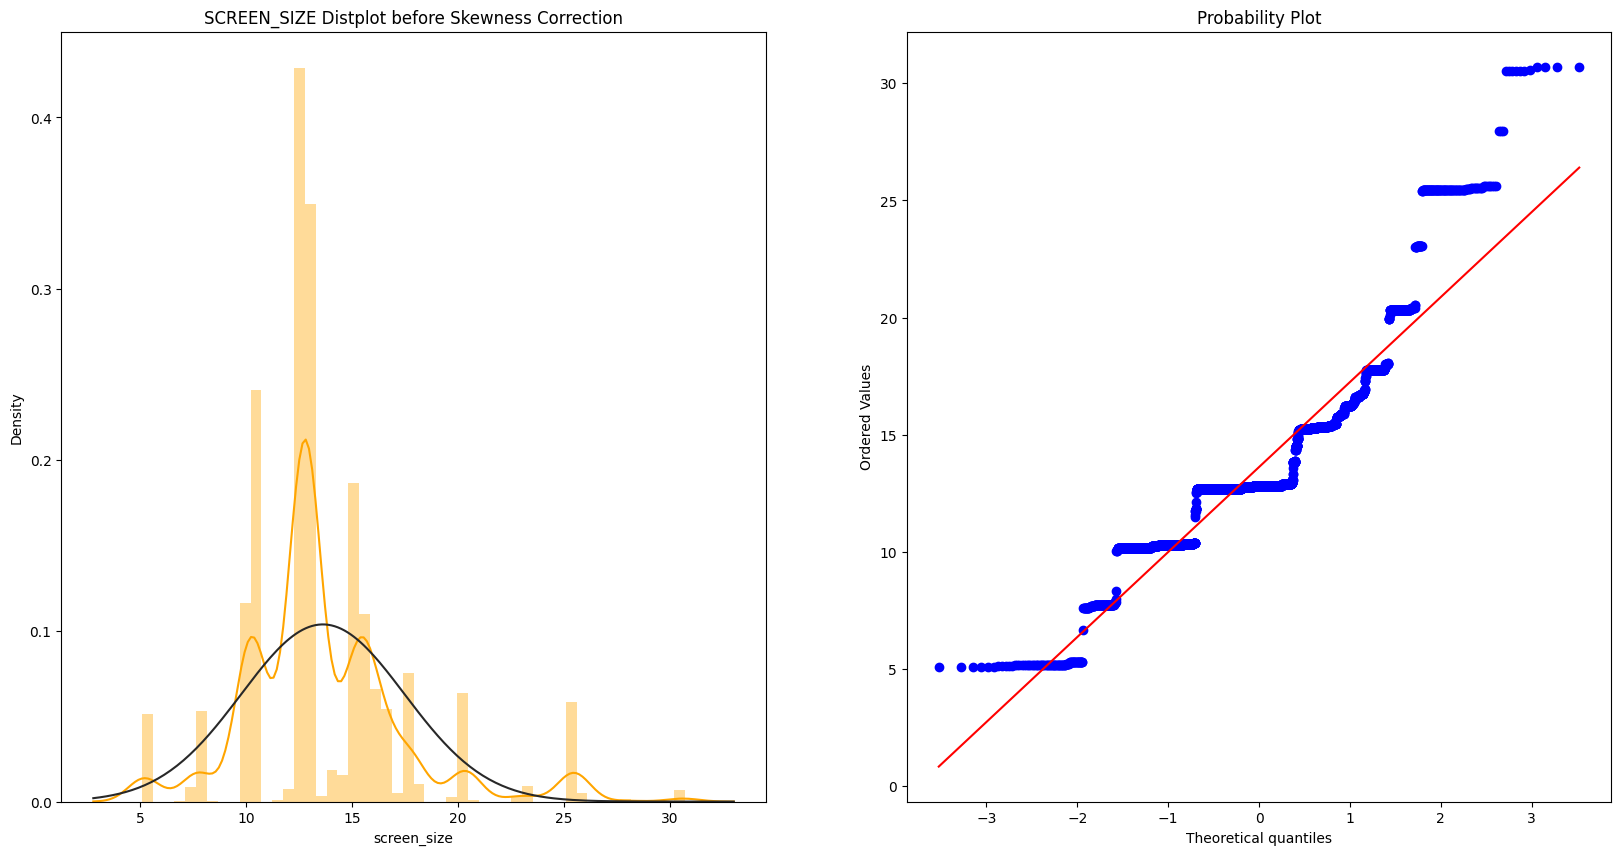

Before Correcting
Mu before correcting REAR_CAMERA_MP : 9.476354134644943, Sigma before correcting REAR_CAMERA_MP : 4.801461330992338


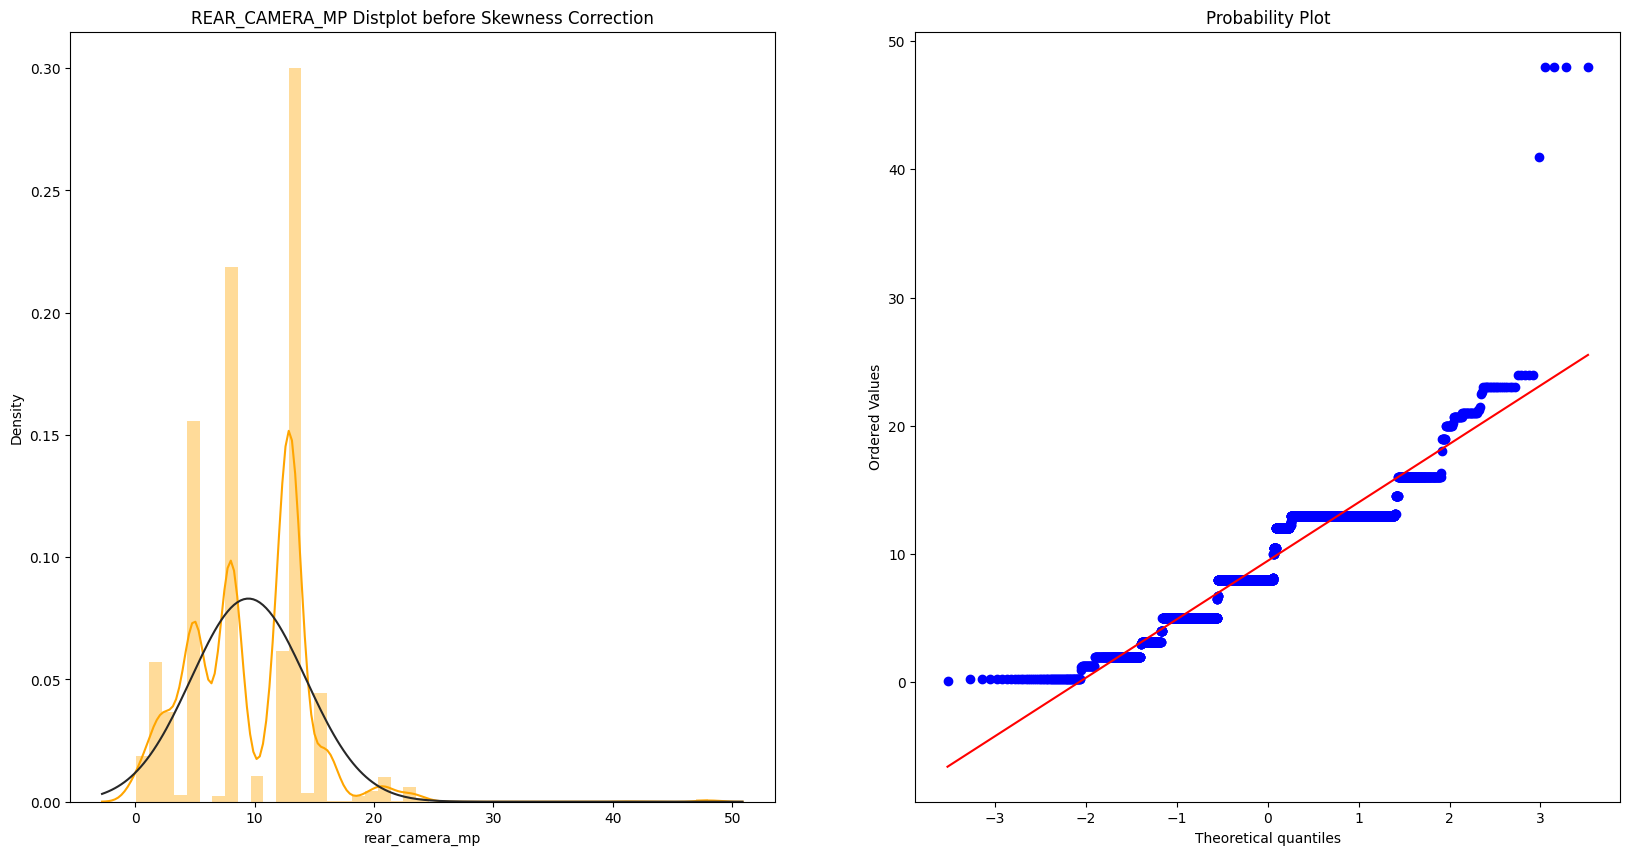

Before Correcting
Mu before correcting FRONT_CAMERA_MP : 6.093790347371658, Sigma before correcting FRONT_CAMERA_MP : 6.59856537717815


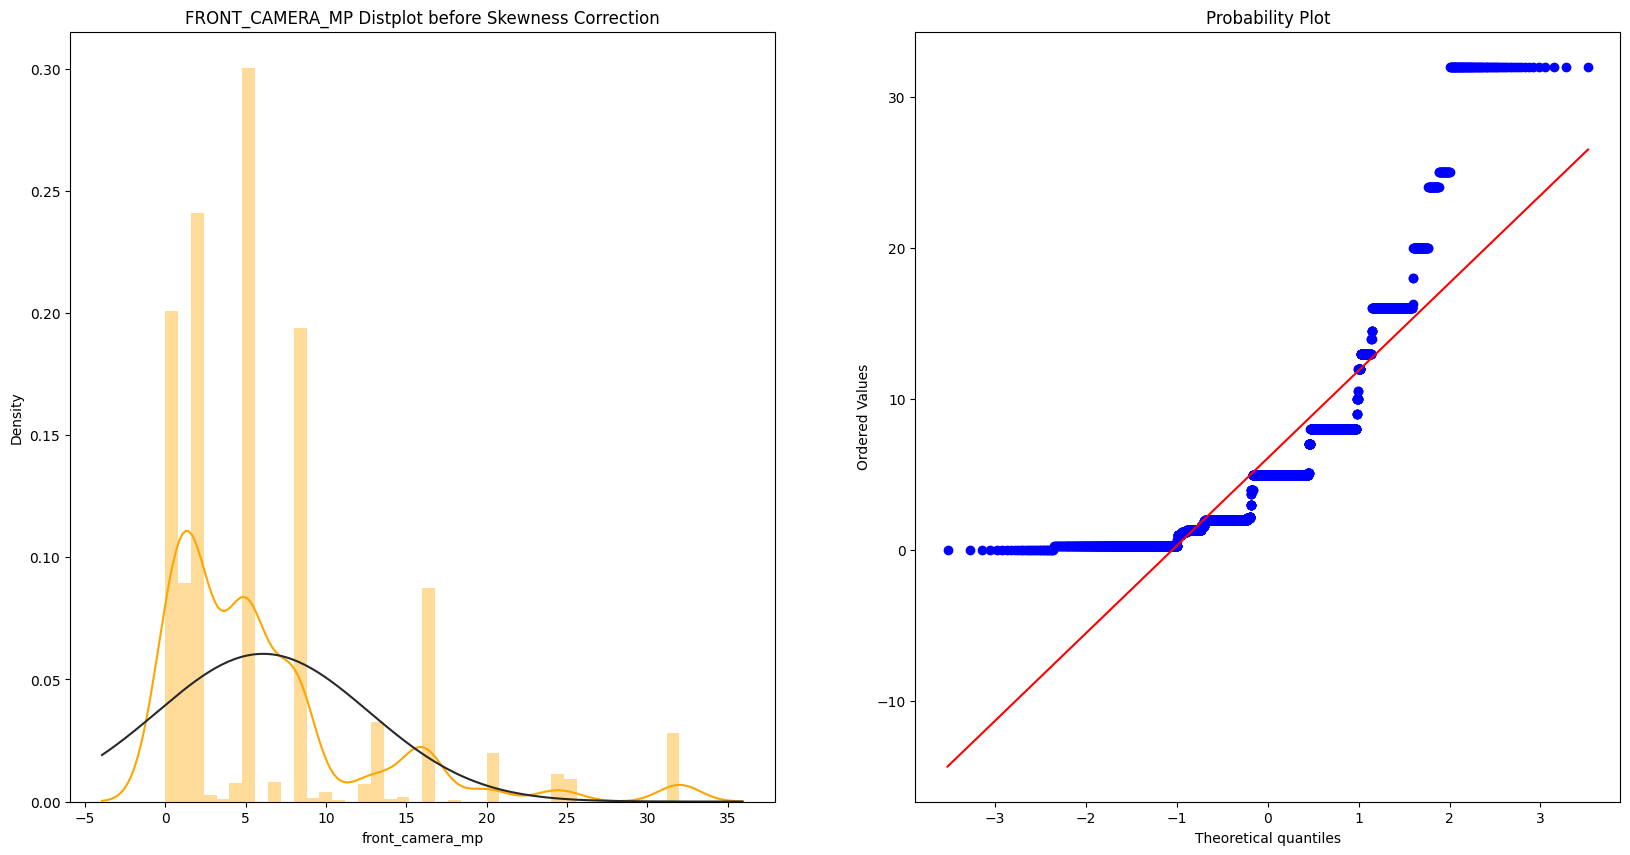

Before Correcting
Mu before correcting BATTERY : 3074.926990470335, Sigma before correcting BATTERY : 1296.758255626418


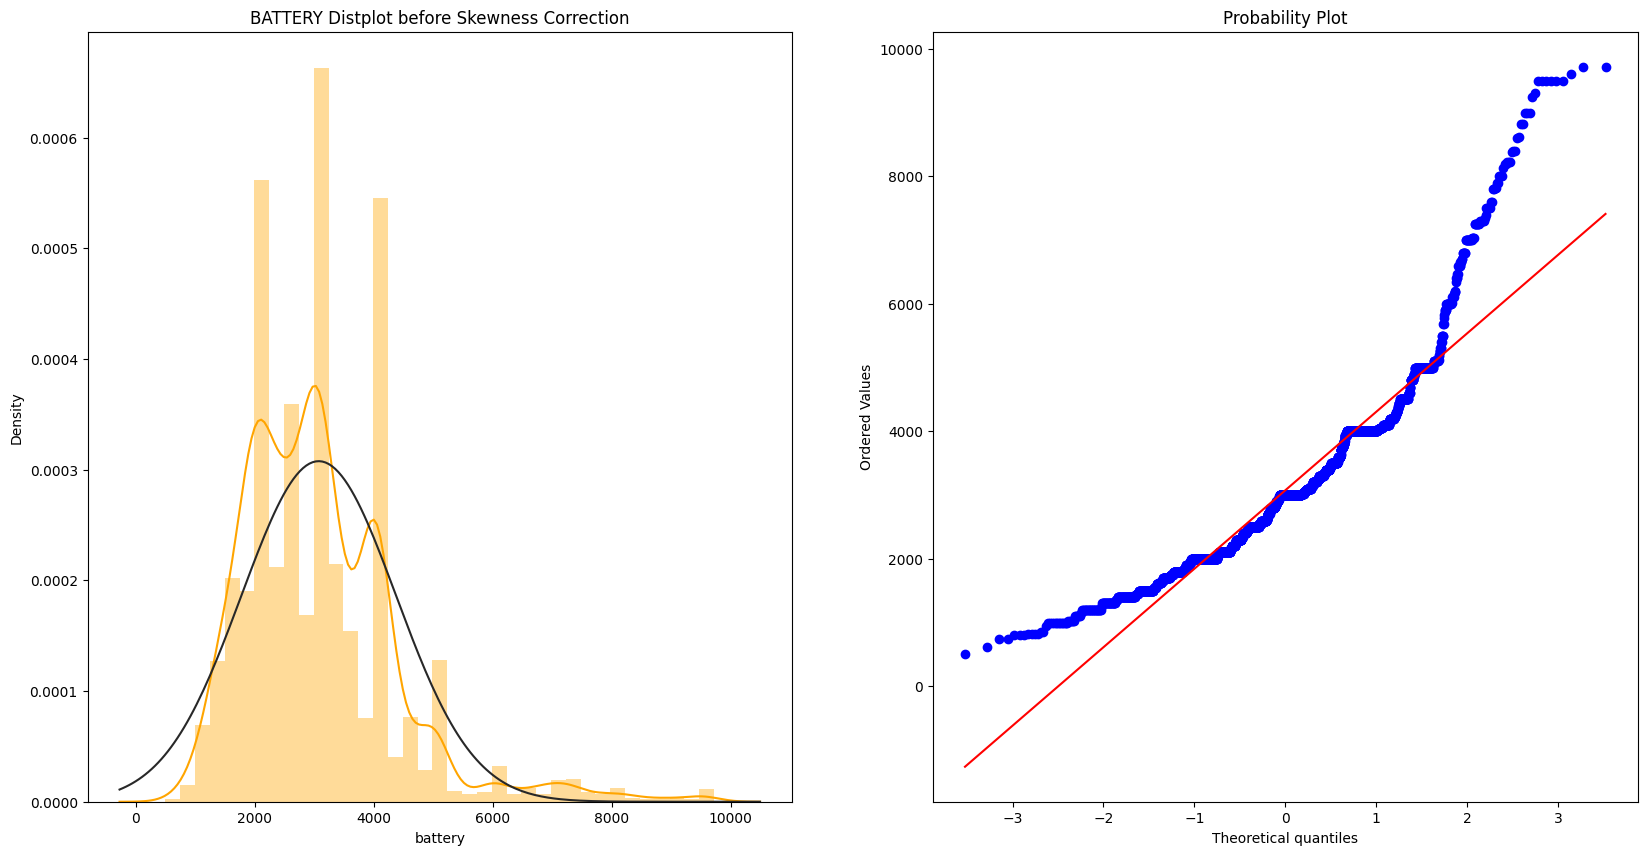

Before Correcting
Mu before correcting WEIGHT : 182.49363664309868, Sigma before correcting WEIGHT : 90.34592055359136


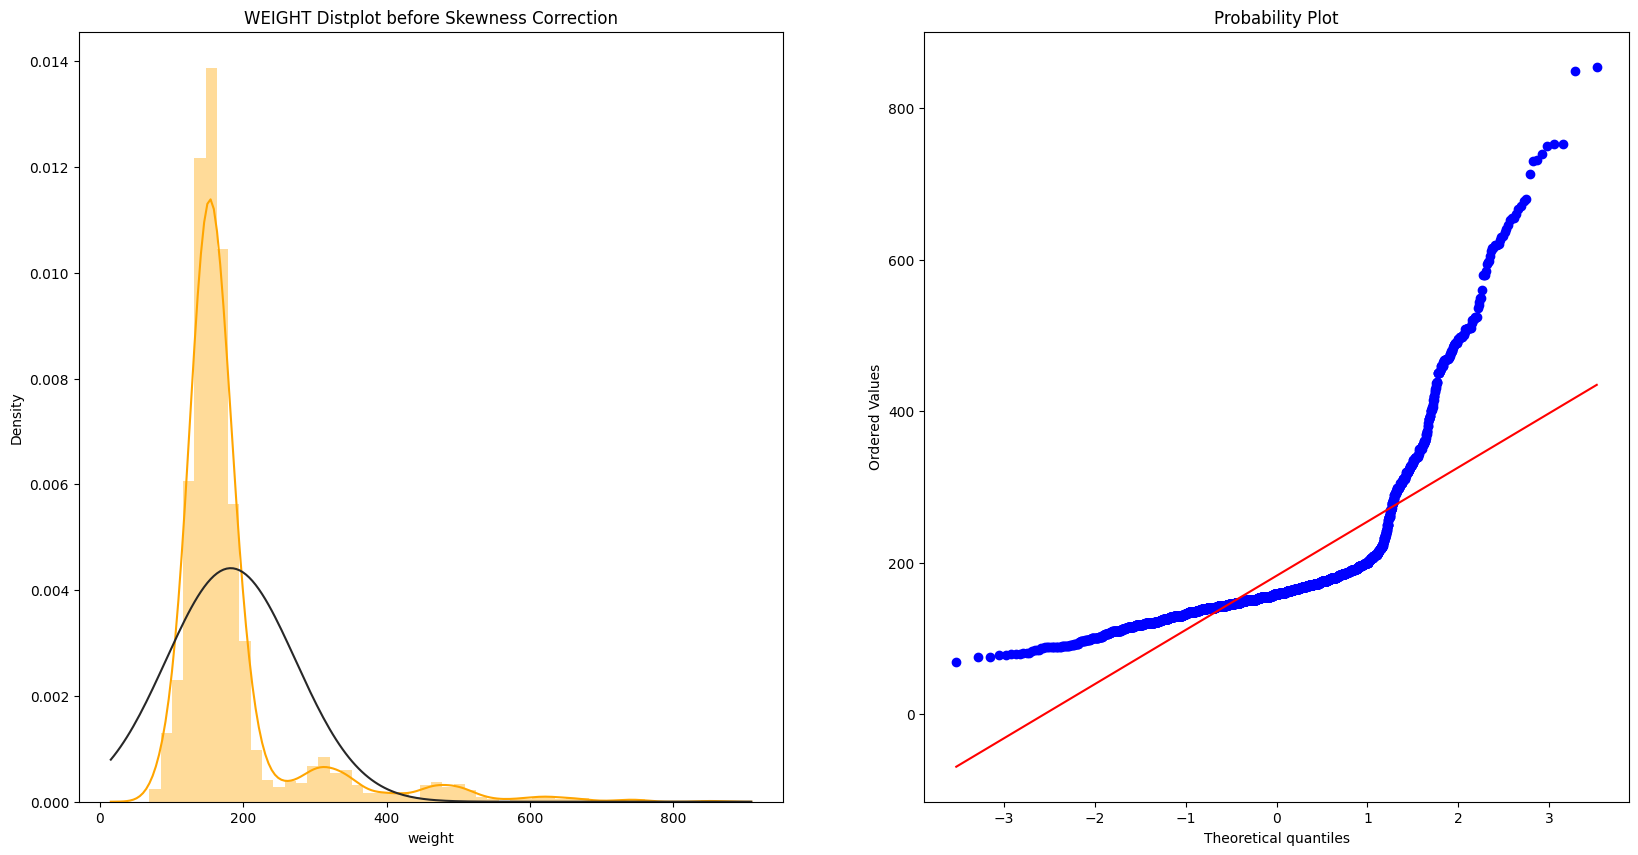

Before Correcting
Mu before correcting DAYS_USED : 695.695358130956, Sigma before correcting DAYS_USED : 235.4178911895456


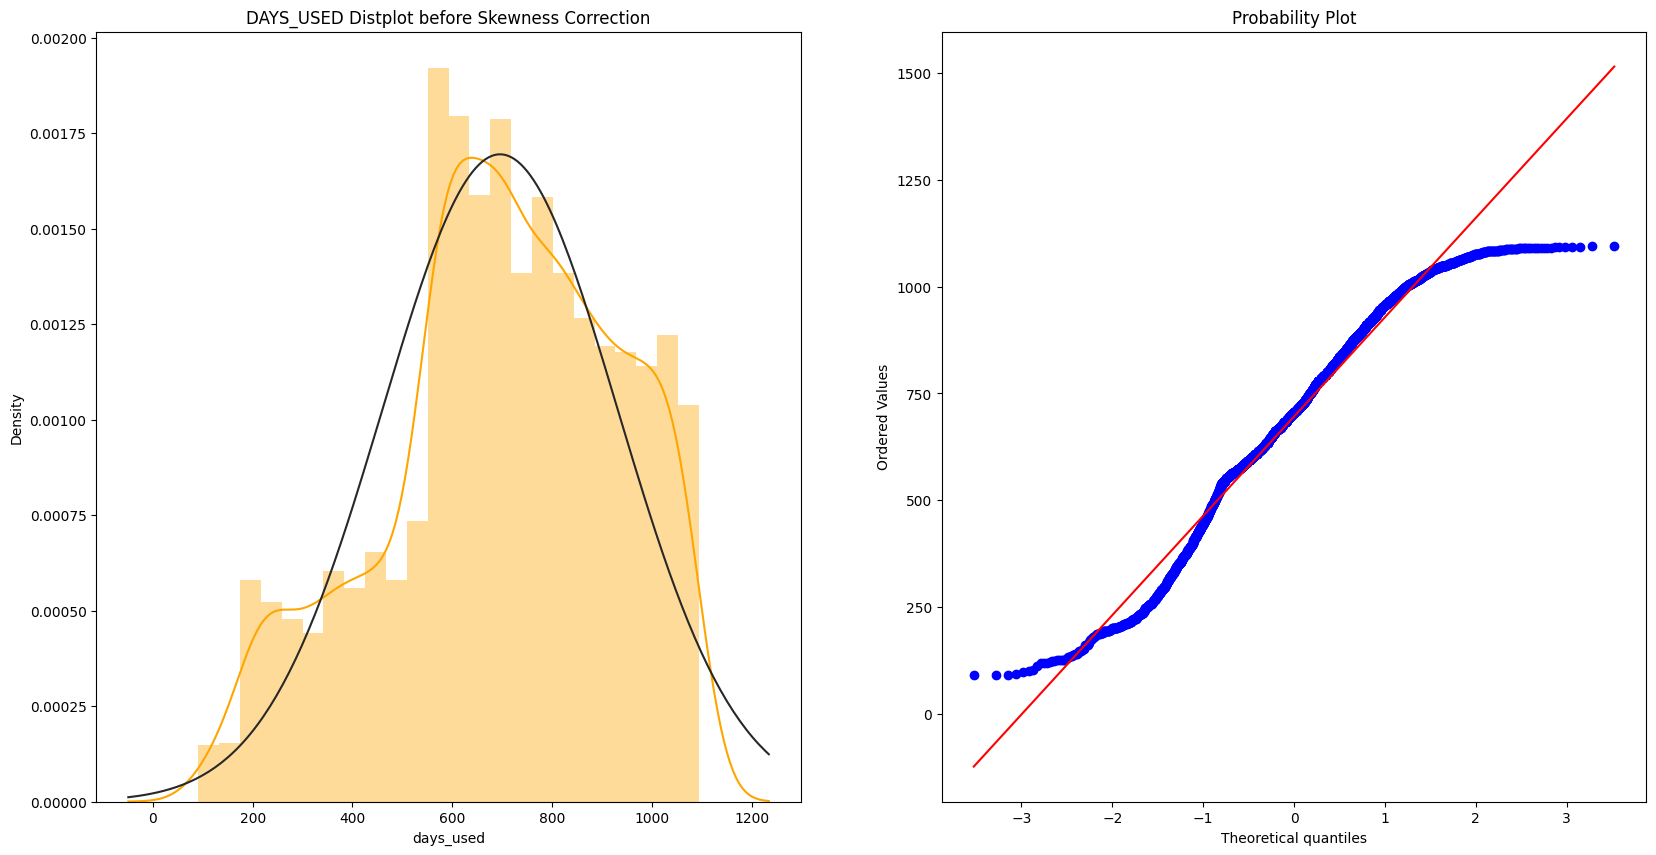

In [164]:
skew_check_cols = ['screen_size','rear_camera_mp','front_camera_mp','battery','weight','days_used']
for columns in skew_check_cols:
    check_skweness(columns)

## Function to apply different tranformations on variables to get normalized data

In [165]:
def trying_different_transformations(column,transformation):
    if transformation=='boxcox':
        try:
            print("BoxCox - "+column)
            temp,temp_params = boxcox(data[column]+1)
            (mu,sigma)=norm.fit(temp)
            print("mu ",mu," sigma ",sigma)
            plt.figure(figsize=(20,10))
            plt.subplot(1,2,1)
            sns.distplot(temp, fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(temp, plot = plt)
        except ValueError:
            pass
        except ValueError:
            pass
    elif transformation=='log':
        try:
            print("Log - "+column)
            (mu,sigma)=norm.fit(np.log1p(data[column]))
            print("mu ",mu," sigma ",sigma)
            plt.figure(figsize=(20,10))
            plt.subplot(1,2,1)
            sns.distplot(np.log1p(data[column]), fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(np.log1p(data[column]), plot = plt)
        except RuntimeError:
            pass
        except ValueError:
            pass
    elif transformation=='reciprocal':
        try:
            print("Reciprocal - "+column)
            temp_r = 1/data[column]
            temp_r = temp_r.replace([np.inf, -np.inf], 0)
            (mu,sigma)=norm.fit(temp_r)
            print("mu ",mu," sigma ",sigma)
            plt.figure(figsize=(20,10))
            plt.subplot(1,2,1)
            sns.distplot(temp_r, fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(temp_r, plot = plt)
        except RuntimeError:
            pass
        except ValueError:
            pass
    elif transformation=='sqroot':
        try:
            print("Square_Root - "+column)
            (mu,sigma)=norm.fit(data[column]**(1/2))
            print("mu ",mu," sigma ",sigma)
            plt.figure(figsize=(20,10))
            plt.subplot(1,2,1)
            sns.distplot(data[column]**(1/2), fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(data[column]**(1/2), plot = plt)
        except RuntimeError:
            pass
        except ValueError:
            pass
    else:
        try:
            print("Exponential - "+column)
            (mu,sigma)=norm.fit(data[column]**(1/1.2))
            print("mu ",mu," sigma ",sigma)
            plt.figure(figsize=(20,10))
            plt.subplot(1,2,1)
            sns.distplot(data[column]**(1/1.2), fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(data[column]**(1/1.2), plot = plt)
        except RuntimeError:
            pass
        except ValueError:
            pass

## Transformations to try !

In [166]:
transformations = ['boxcox','log','reciprocal','sqroot','exp']

## Trying different transformations on screen_size feature

BoxCox - screen_size
mu  3.569840626369066  sigma  0.4545136746419827
Log - screen_size
mu  2.6489500119971527  sigma  0.2597925882344679
Reciprocal - screen_size
mu  0.07960684557547834  sigma  0.025525098428114866
Square_Root - screen_size
mu  3.6549818070083795  sigma  0.5085117169500123
Exponential - screen_size
mu  8.765467966999235  sigma  2.0485469876423363


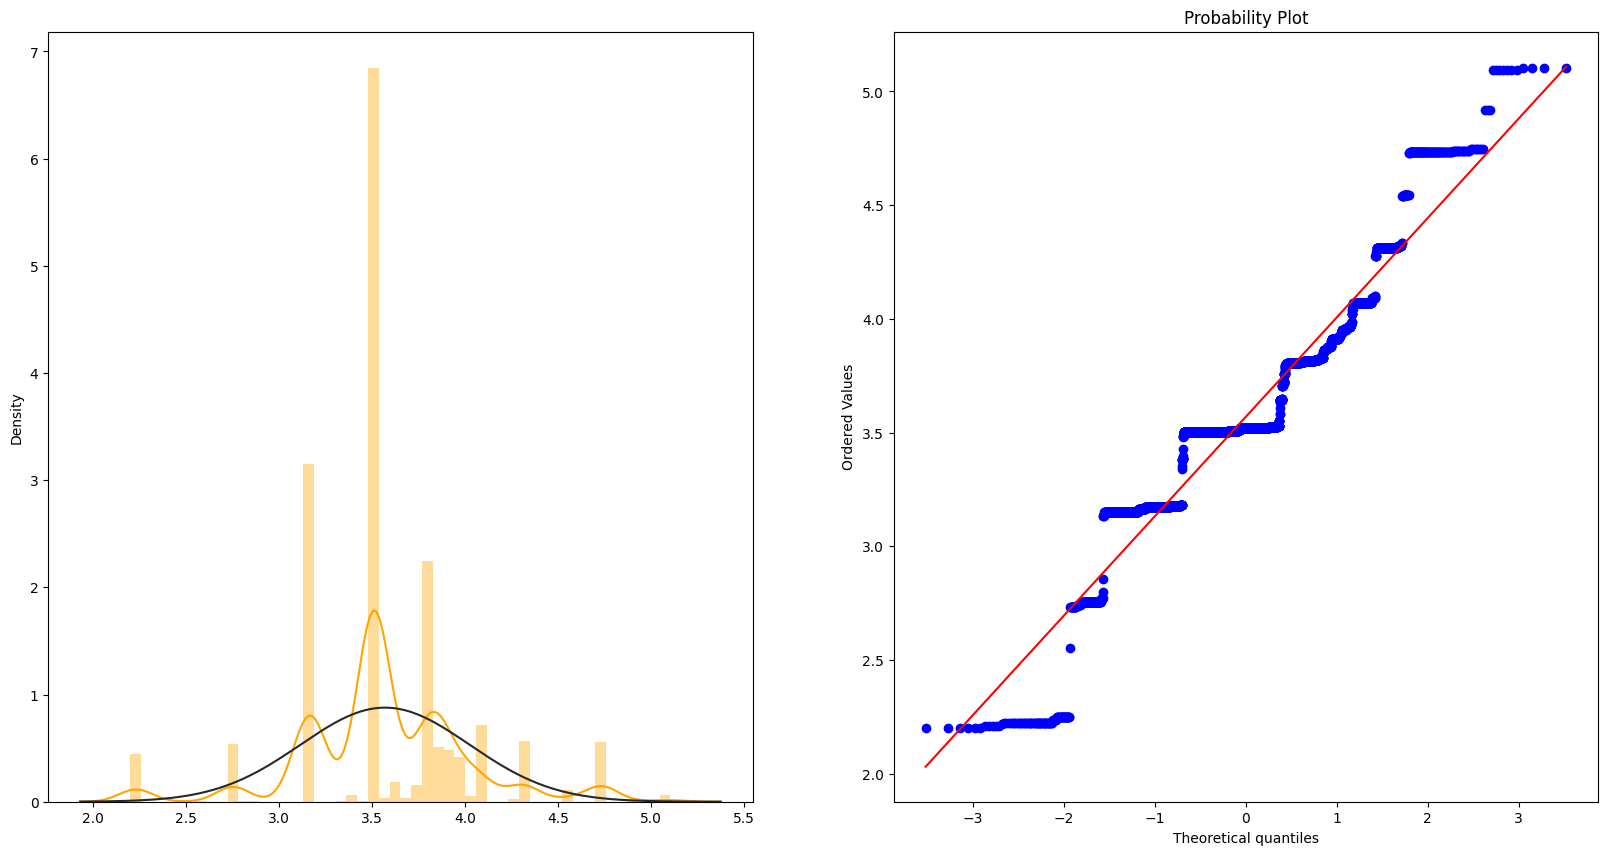

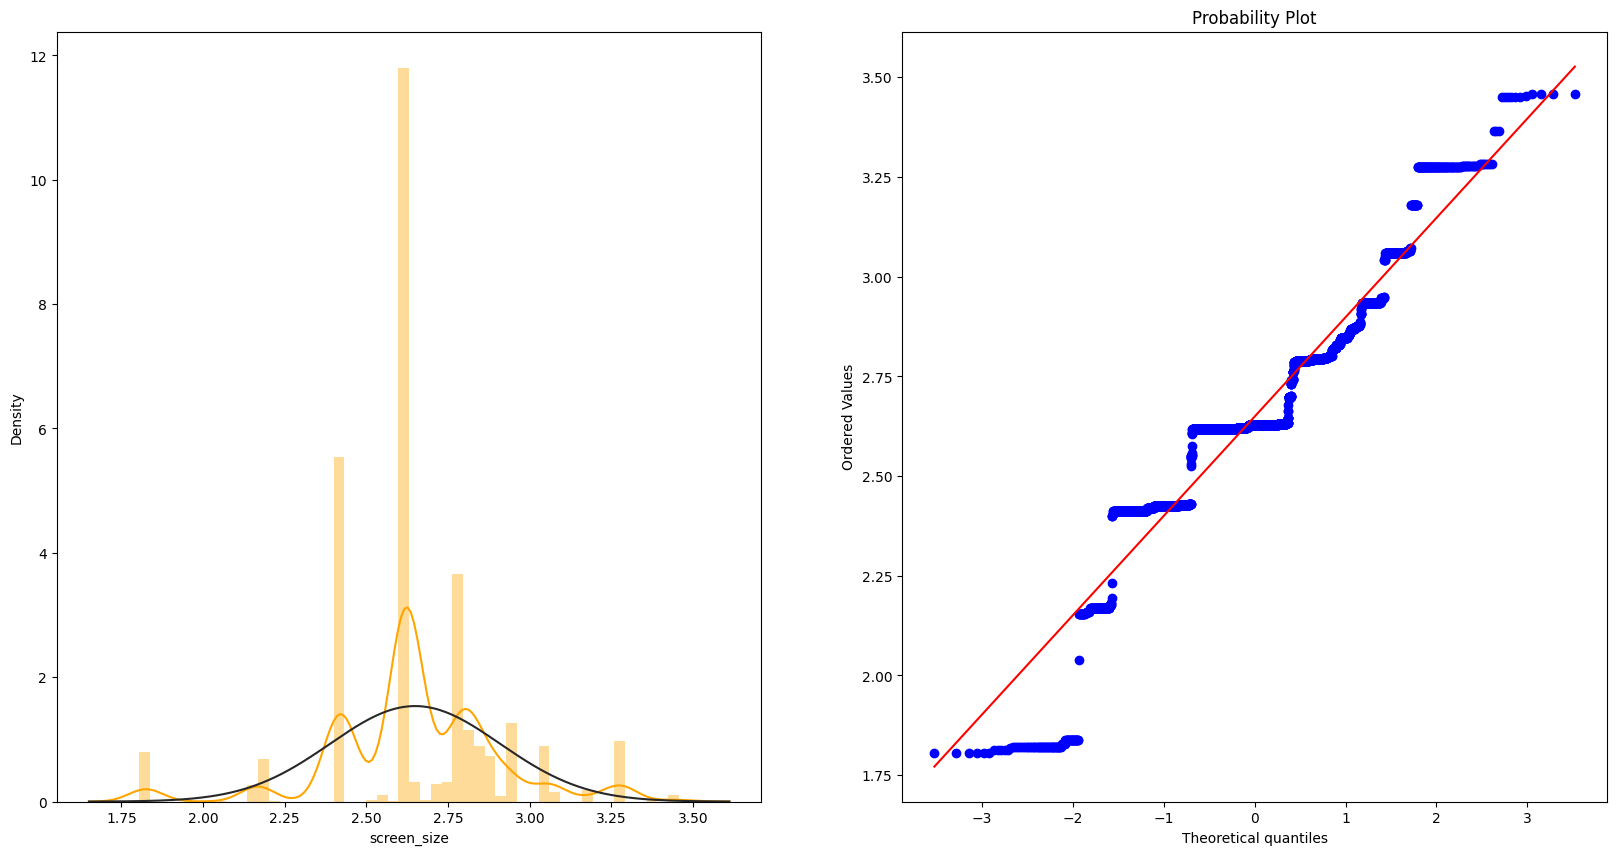

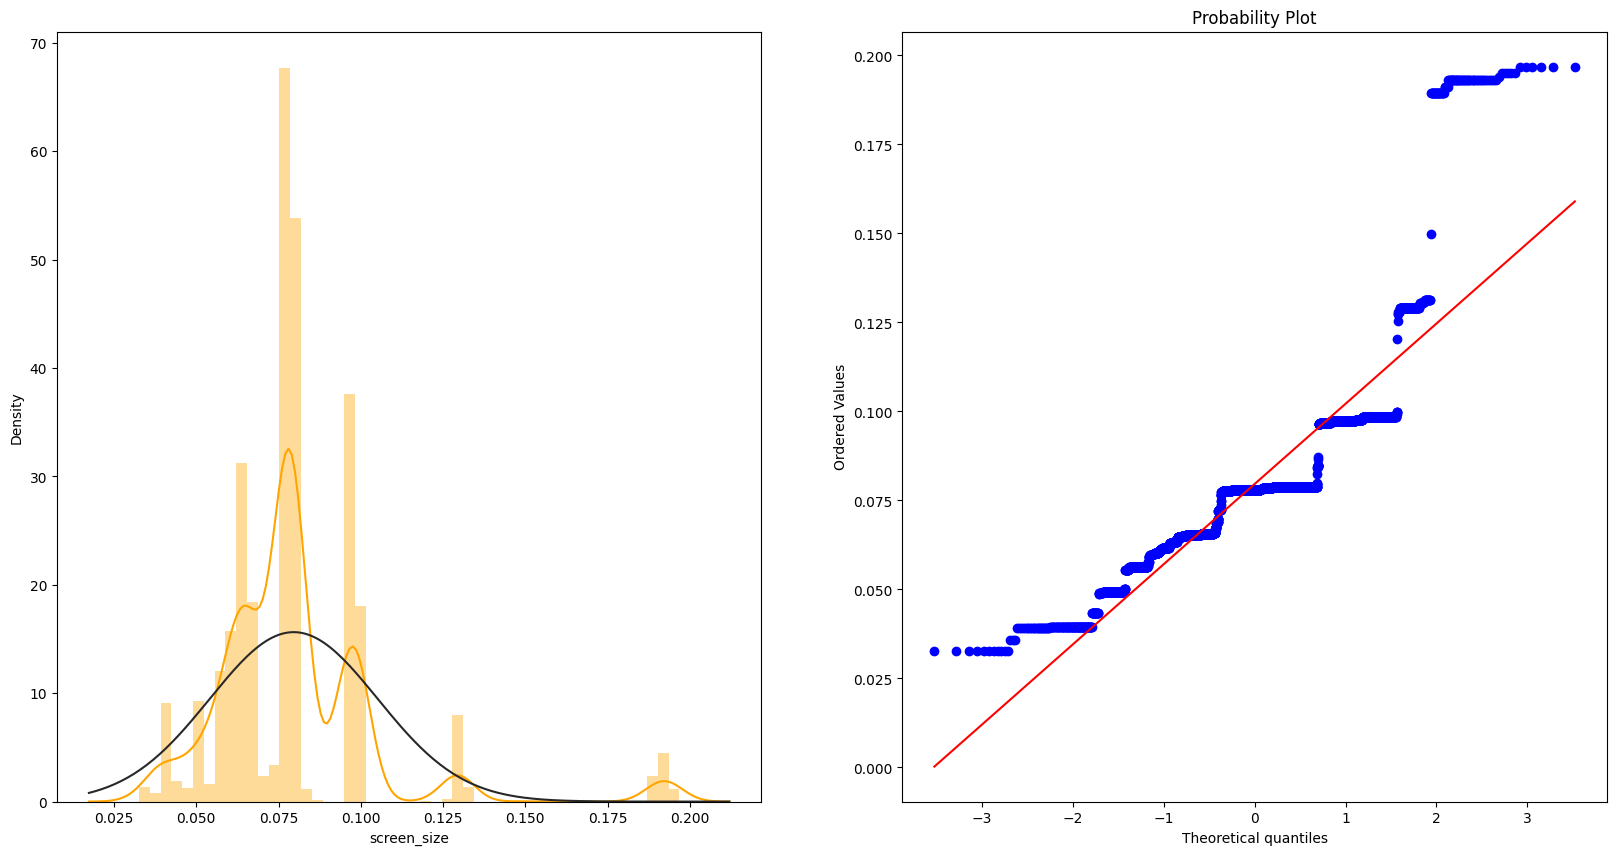

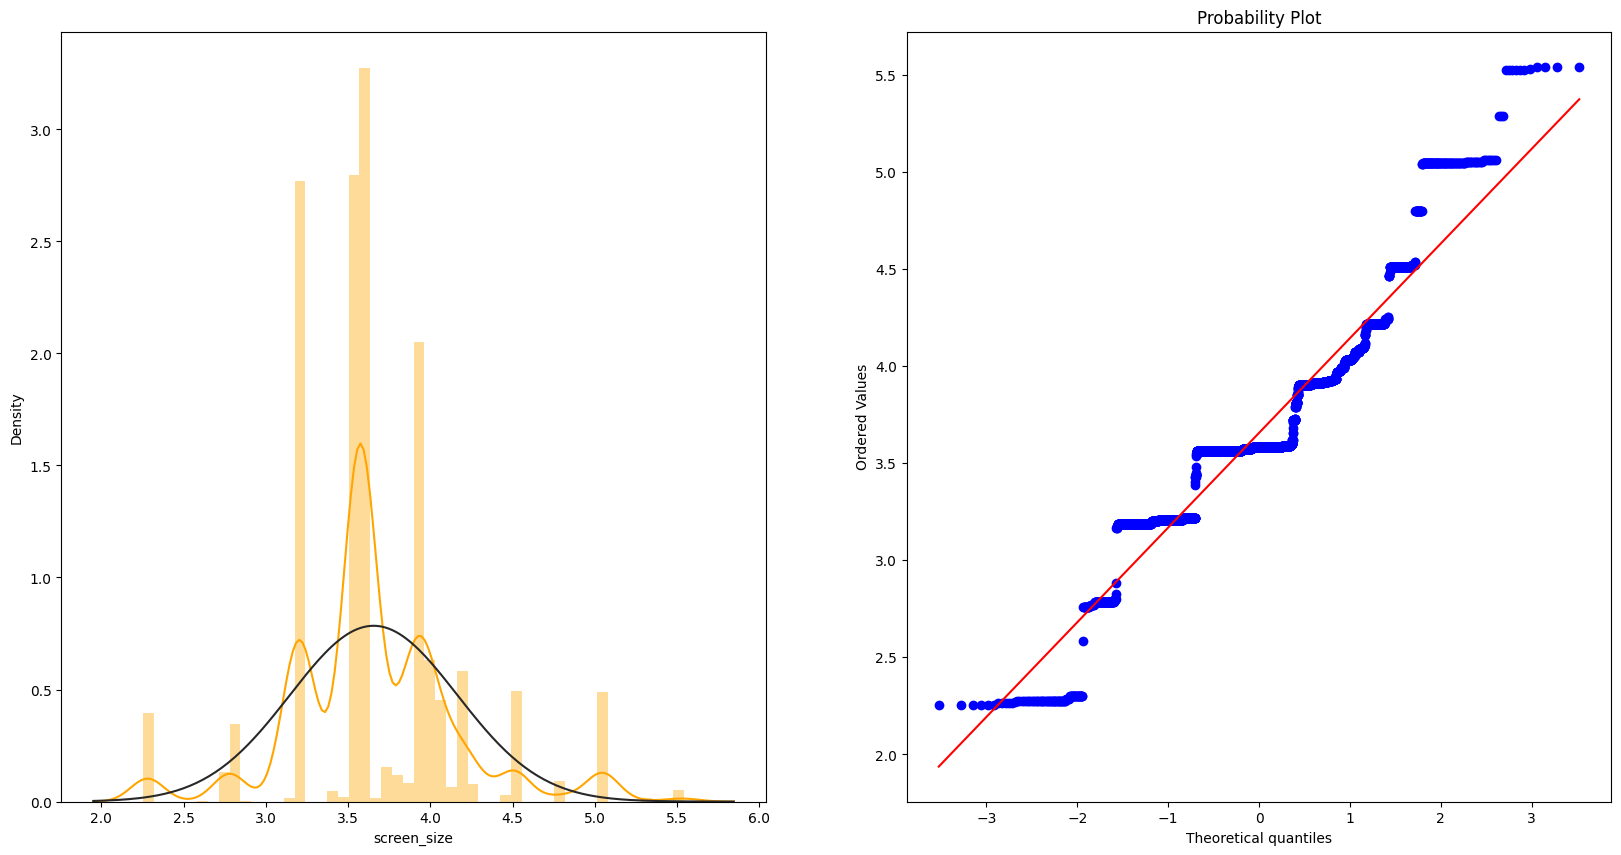

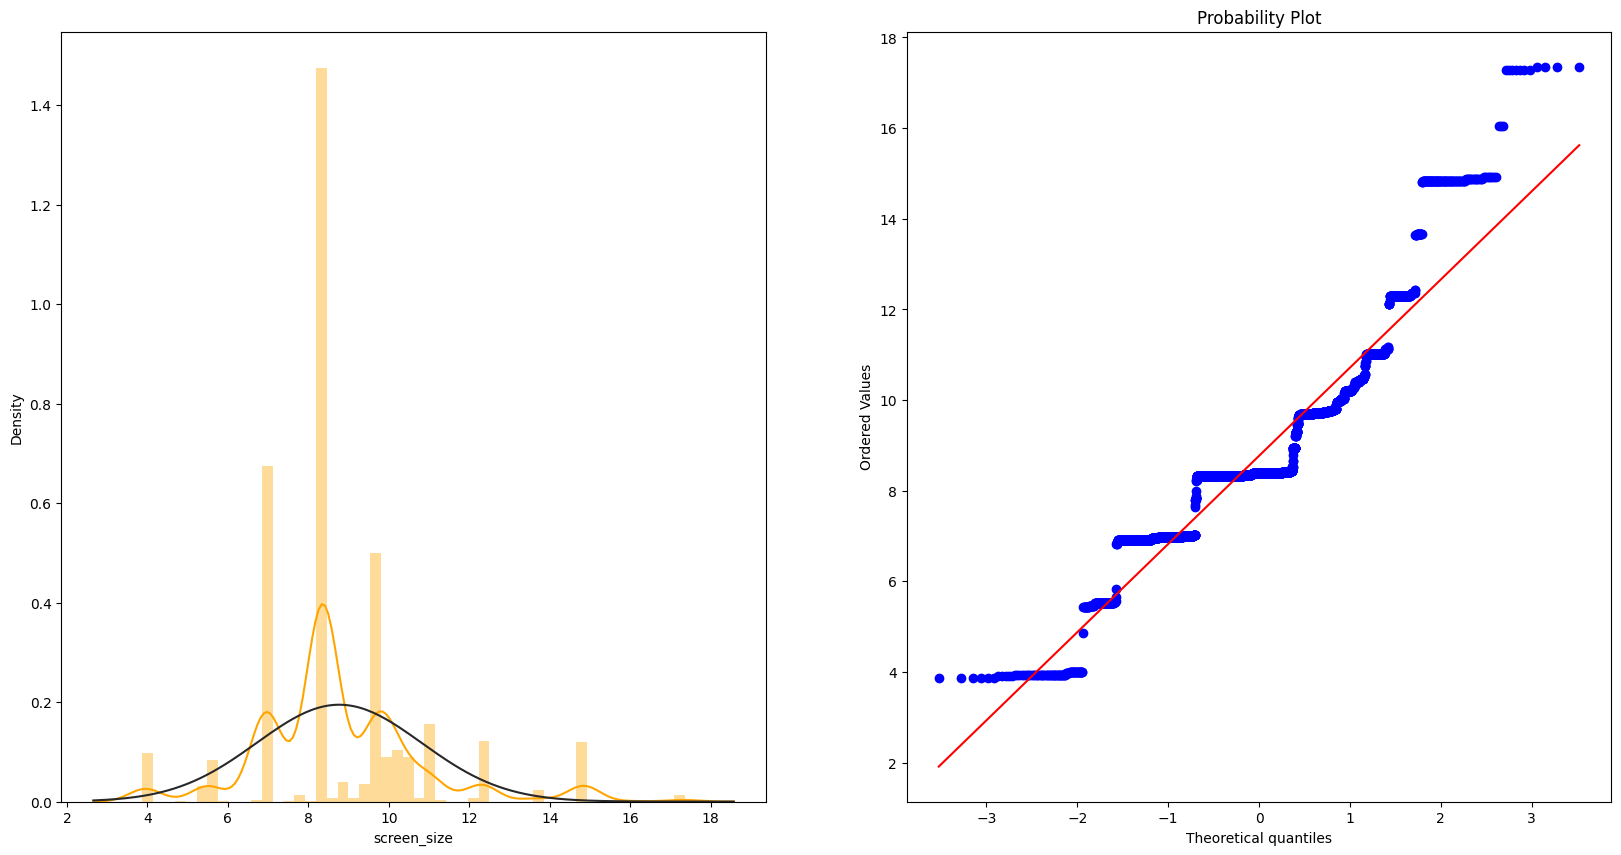

In [167]:
for x in transformations:
    trying_different_transformations('screen_size',x)

## Trying different transformations on rear_camera_mp feature

BoxCox - rear_camera_mp
mu  5.561195485626964  sigma  2.2755111815087923
Log - rear_camera_mp
mu  2.2166565580441495  sigma  0.5686388346206583
Reciprocal - rear_camera_mp
mu  0.21288679387362286  sigma  0.5034662710014629
Square_Root - rear_camera_mp
mu  2.9592967600910938  sigma  0.847889627462975
Exponential - rear_camera_mp
mu  6.386109911940589  sigma  2.776726315977432


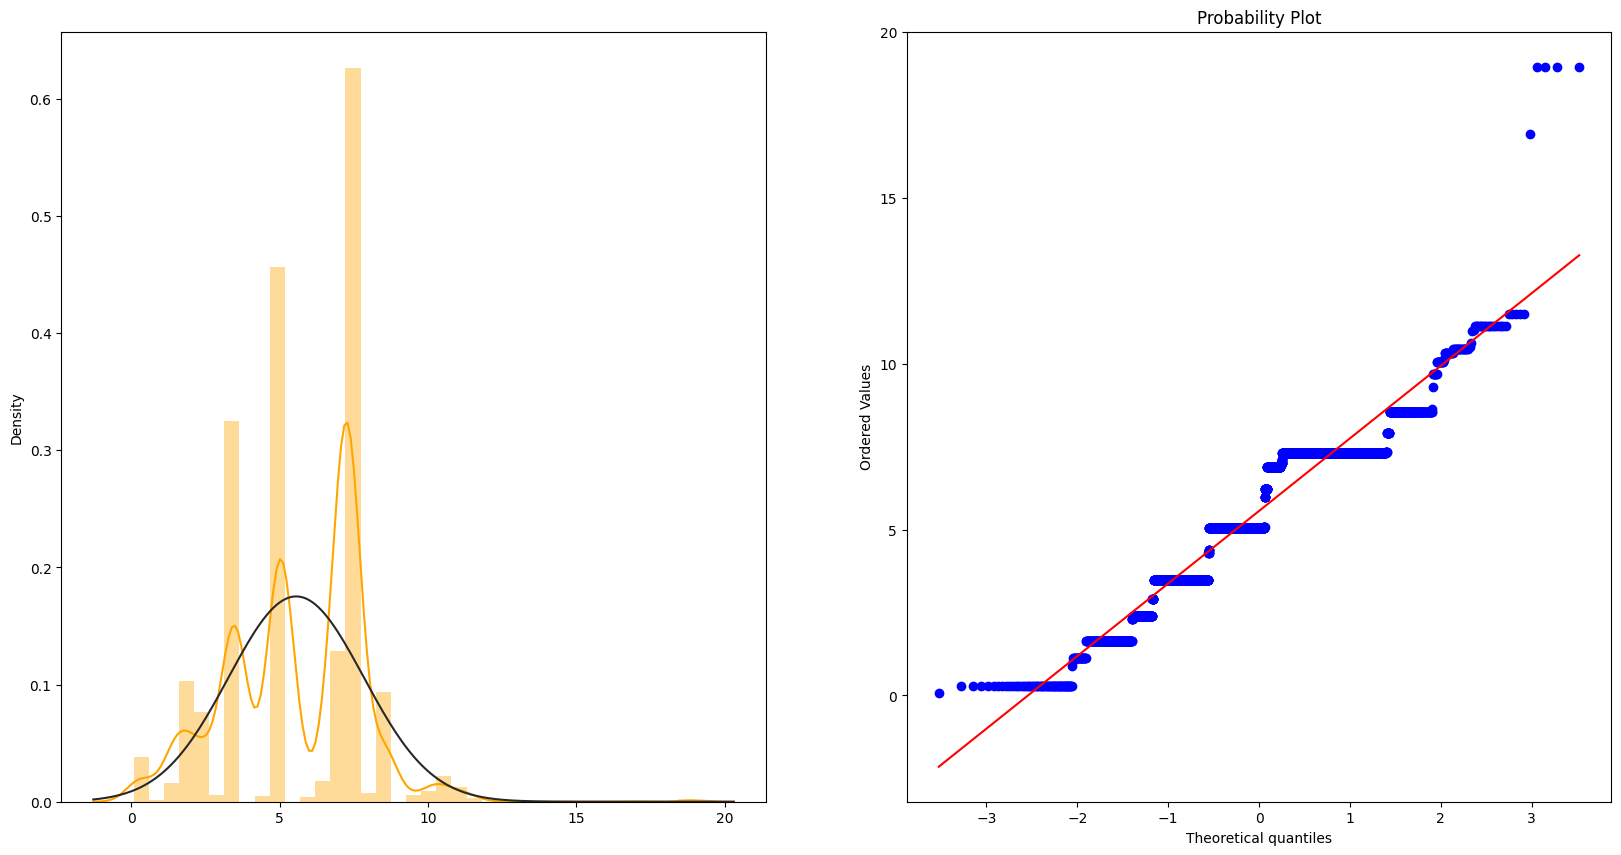

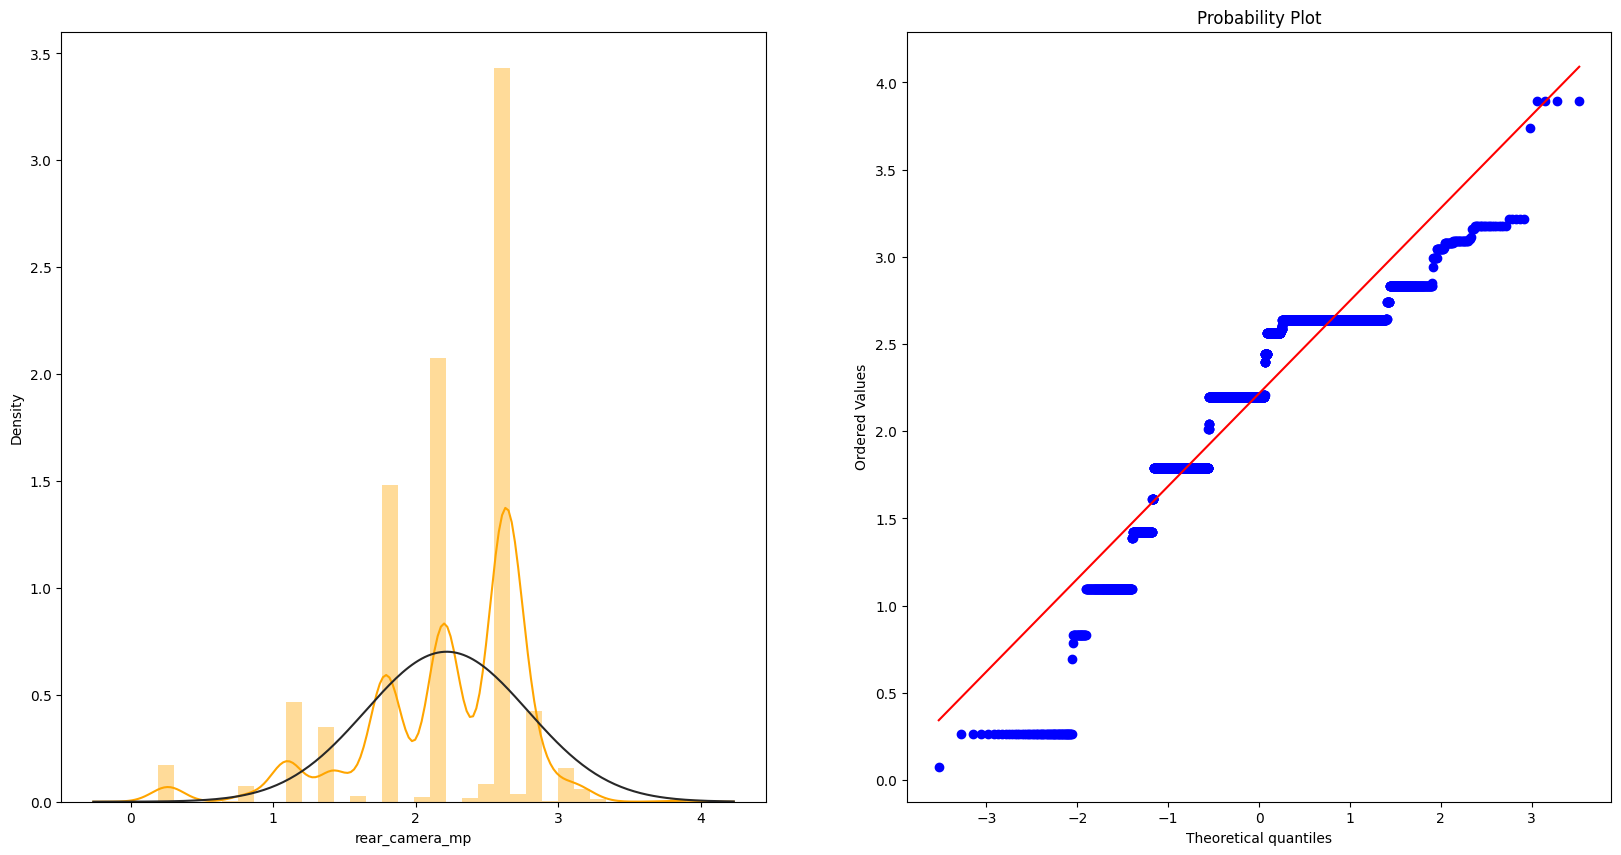

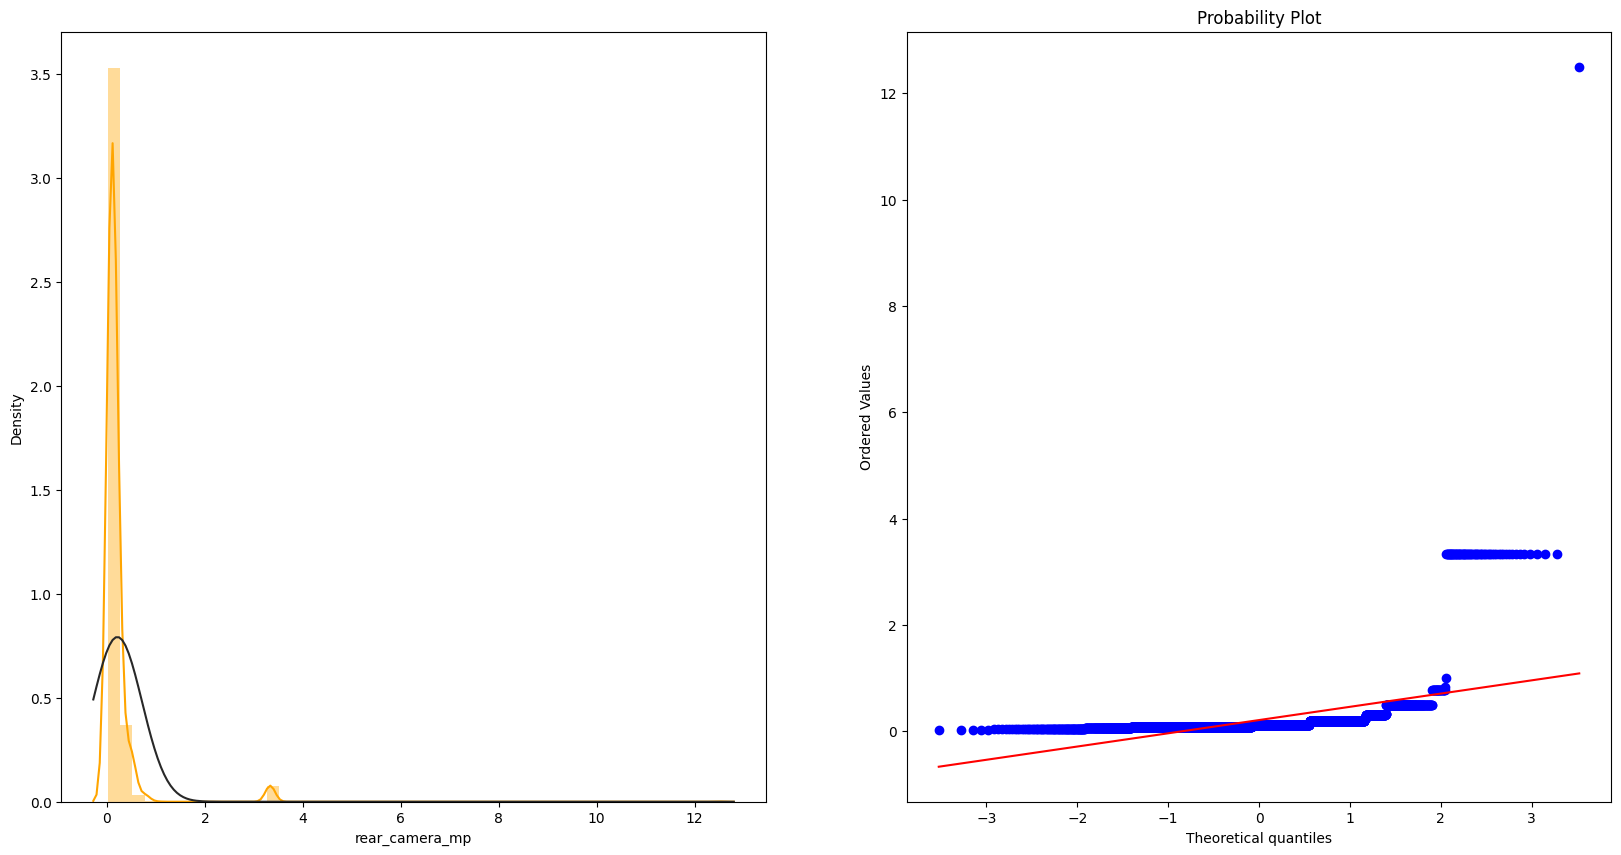

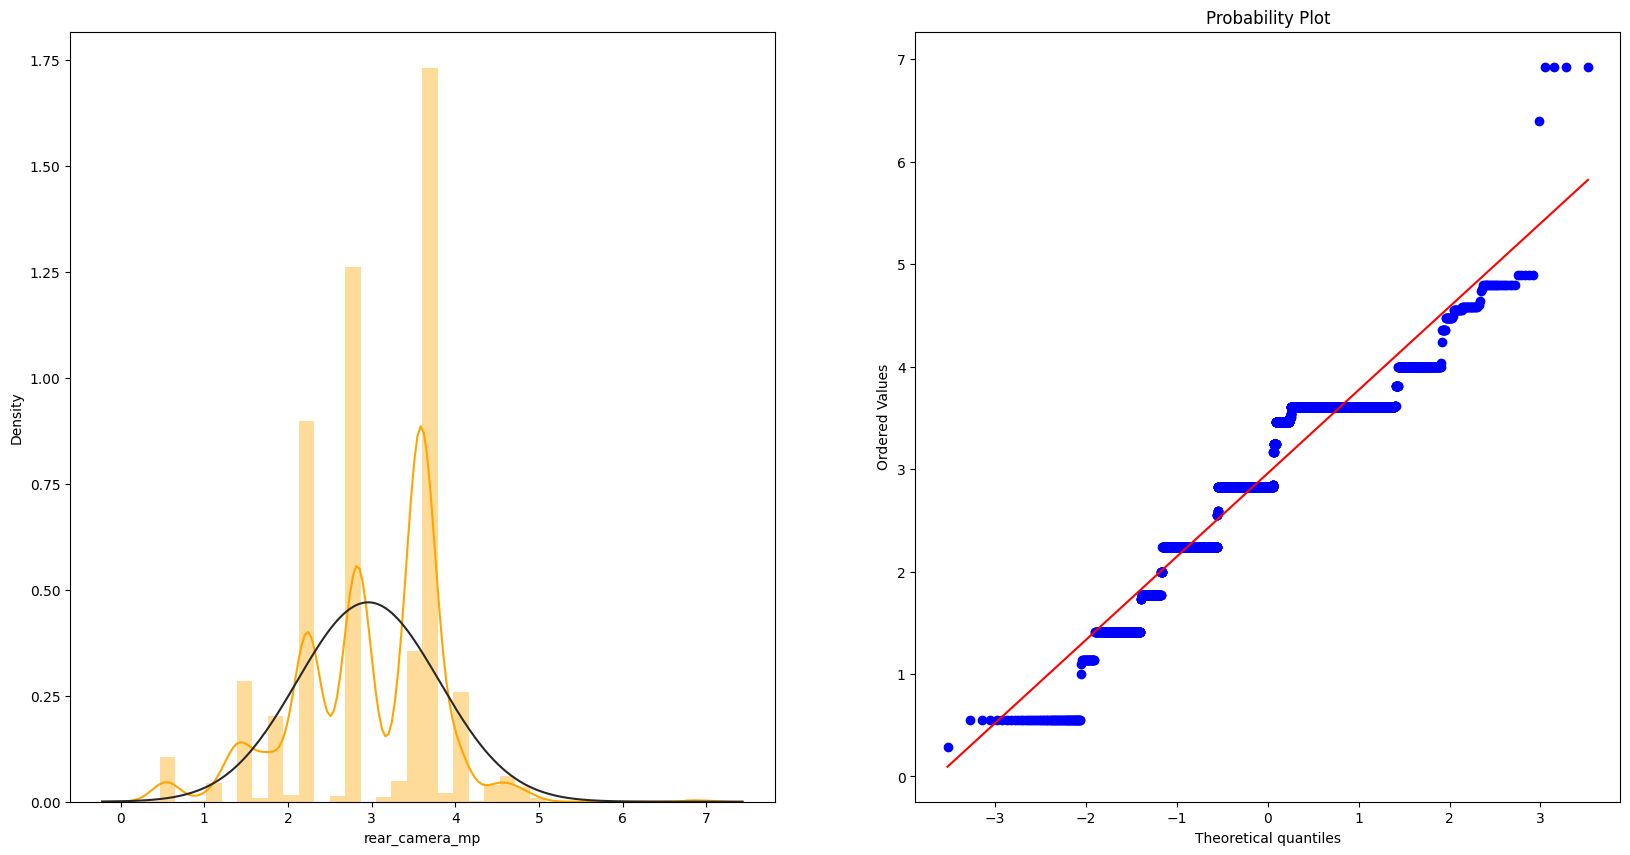

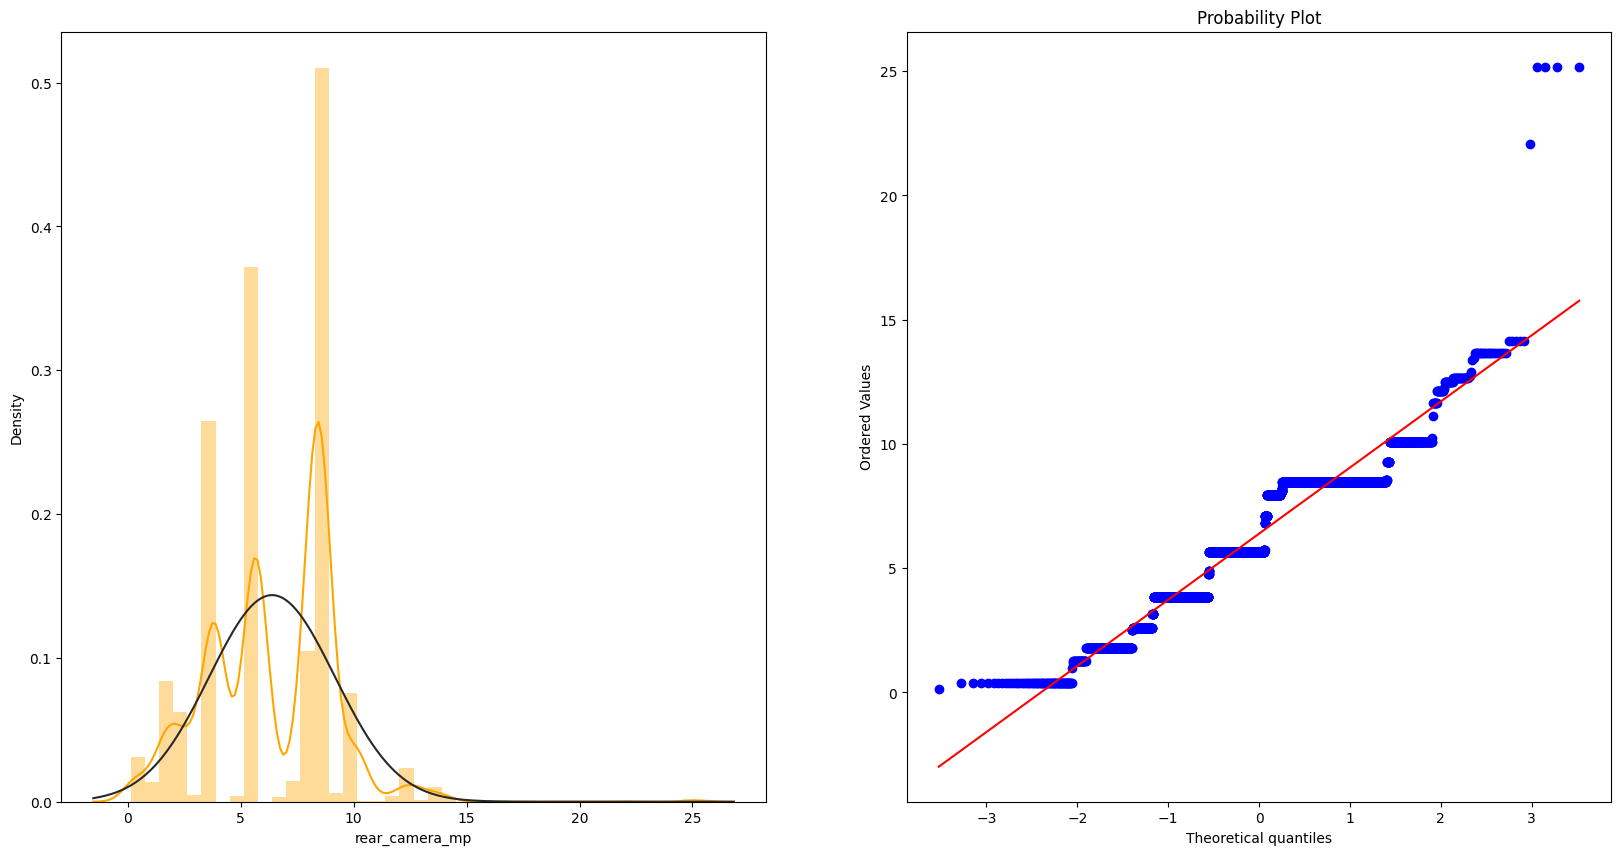

In [168]:
for x in transformations:
    trying_different_transformations('rear_camera_mp',x)

## Trying different transformations on front_camera_mp feature

BoxCox - front_camera_mp
mu  1.5268144756253081  sigma  0.819368805379863
Log - front_camera_mp
mu  1.5881763402721587  sigma  0.8715756237382545
Reciprocal - front_camera_mp
mu  0.7395276436723018  sigma  1.1133356363904017
Square_Root - front_camera_mp
mu  2.1439325683717114  sigma  1.2236598749843581
Exponential - front_camera_mp
mu  4.201861528431512  sigma  3.818759083260187


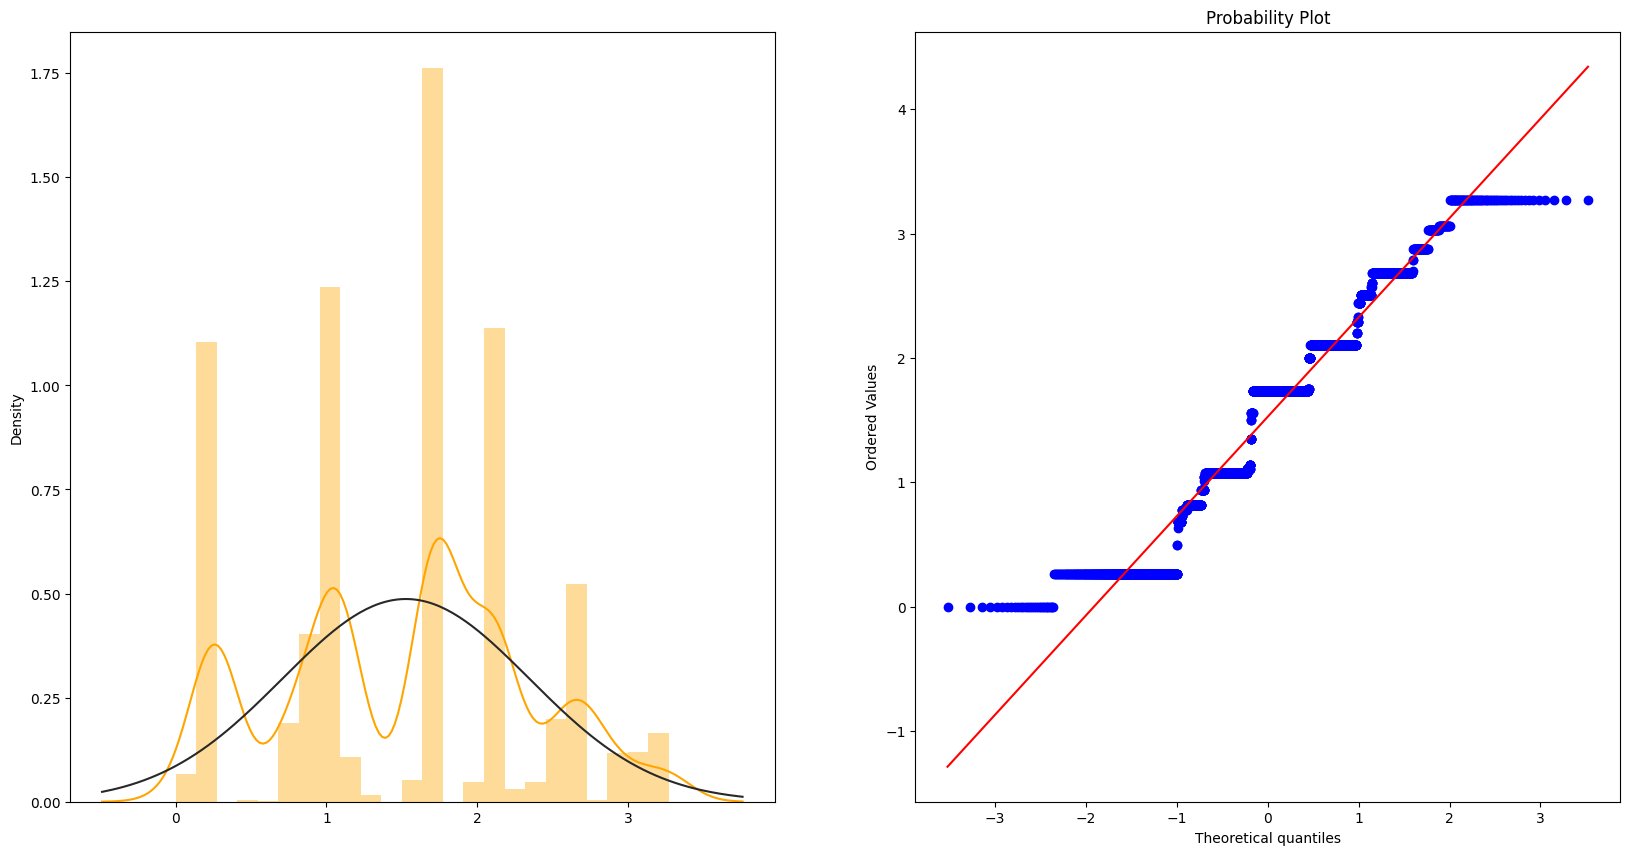

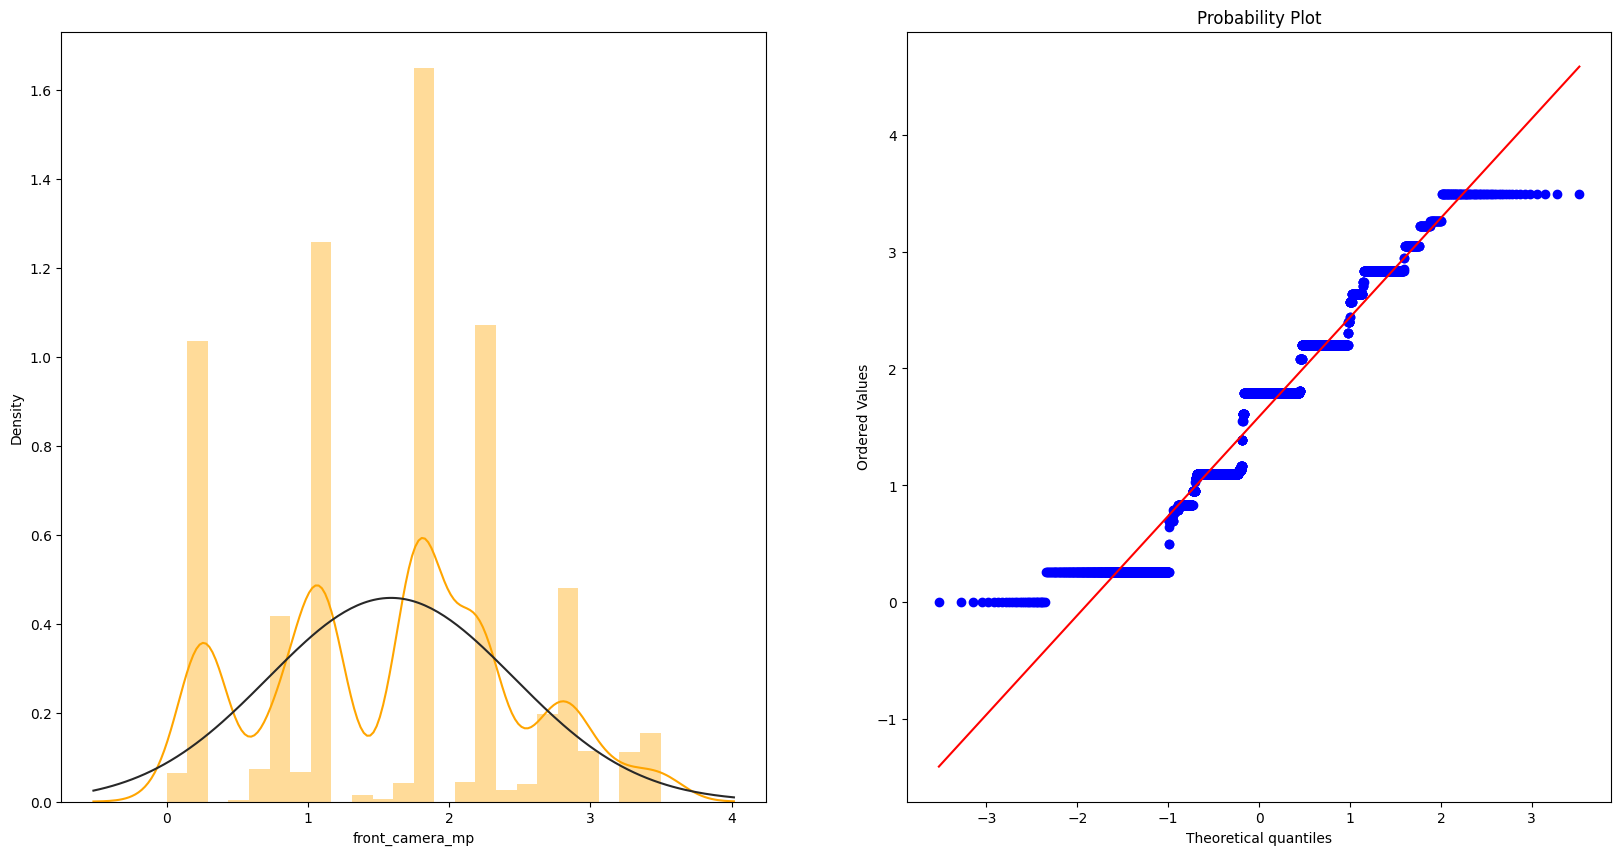

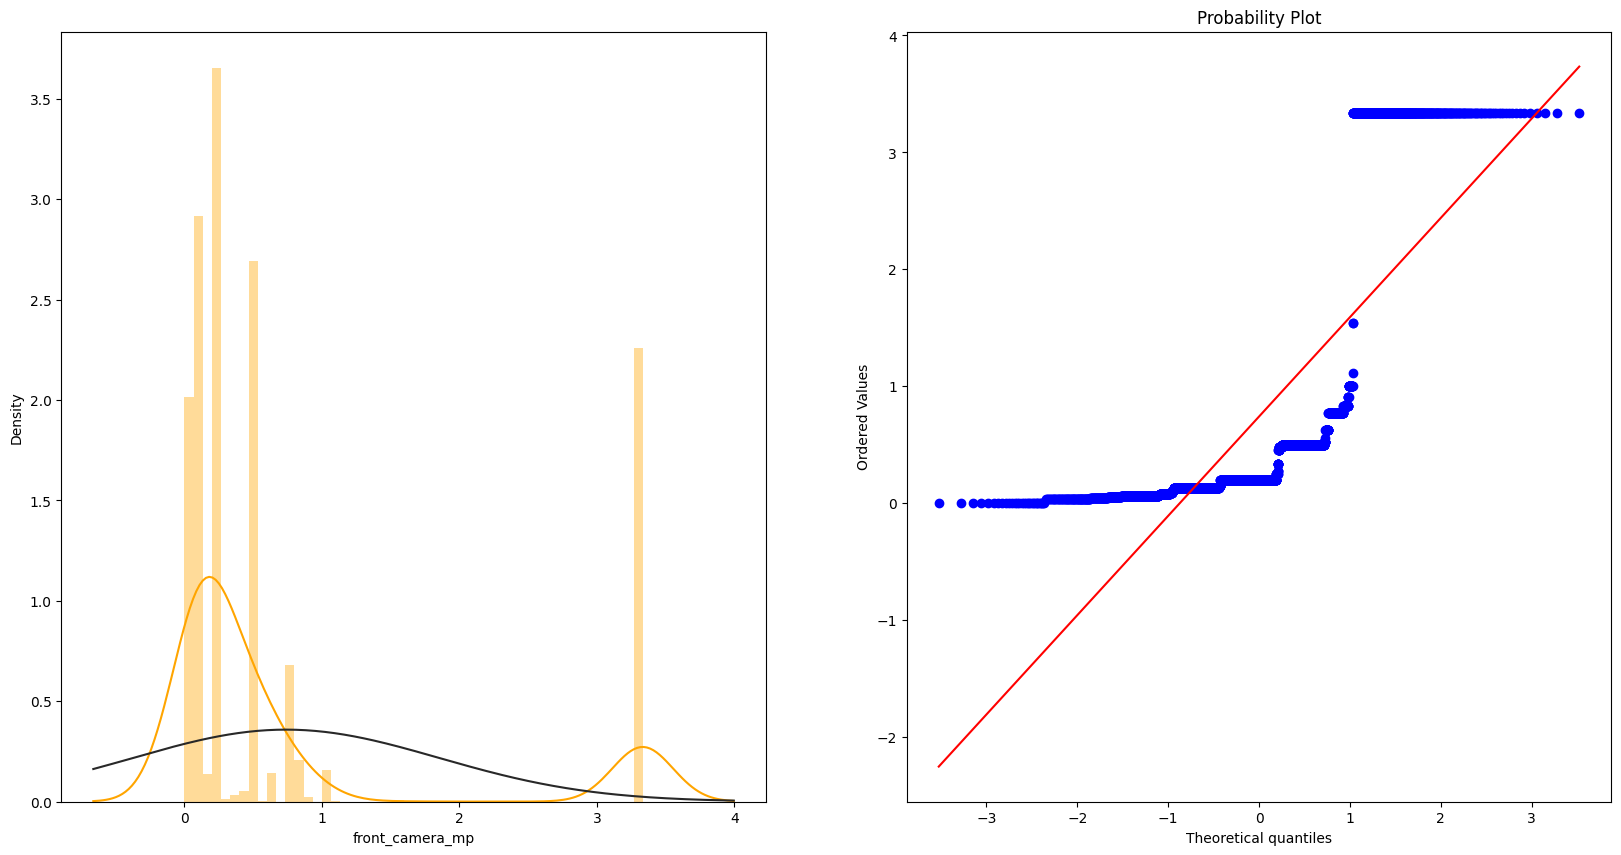

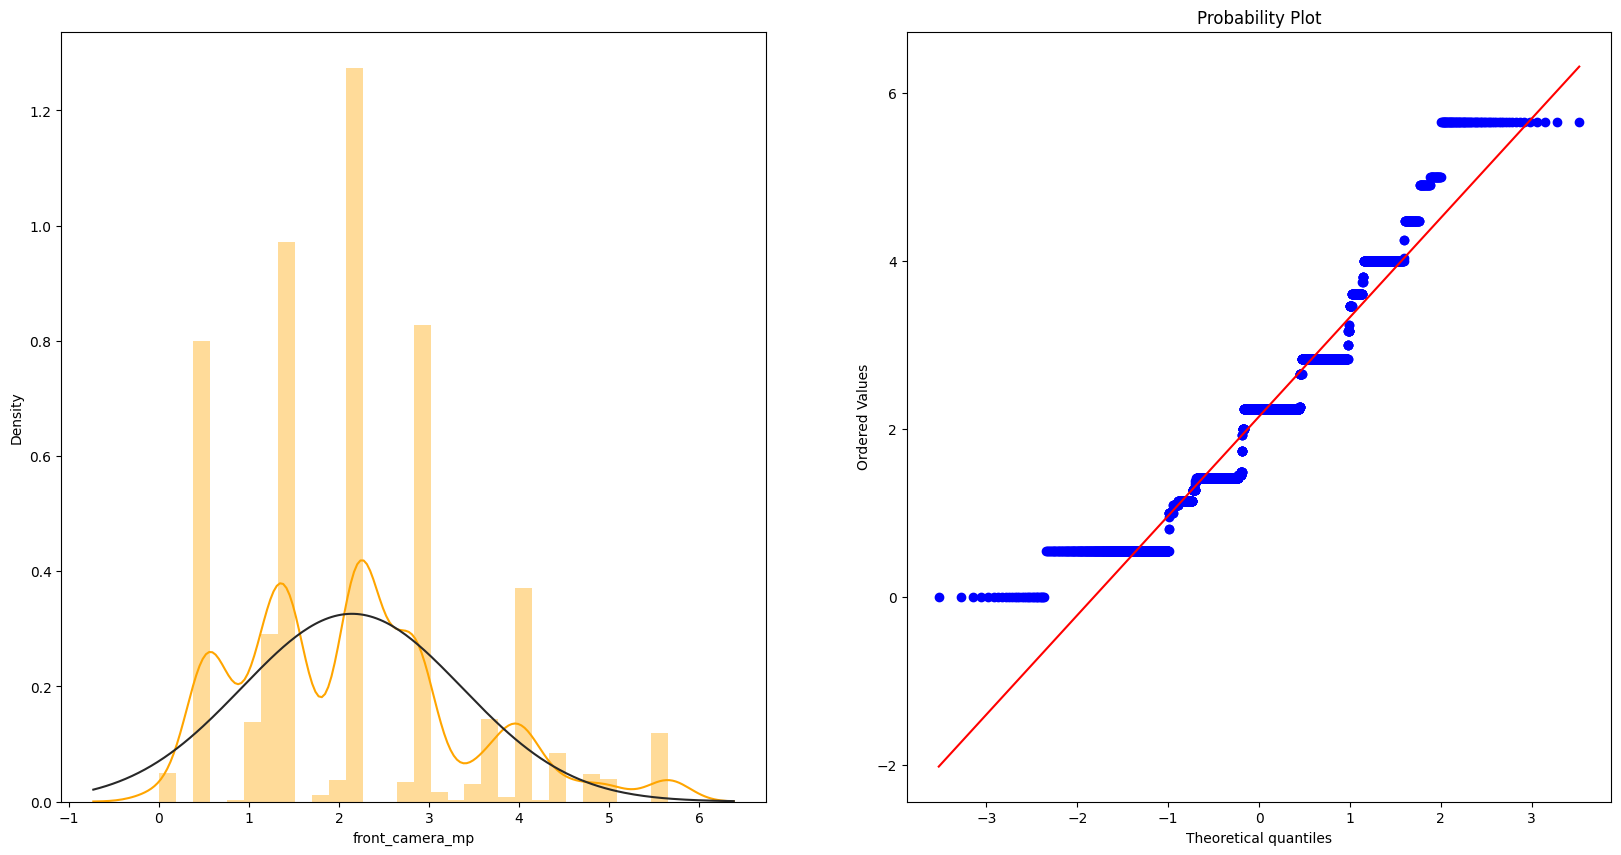

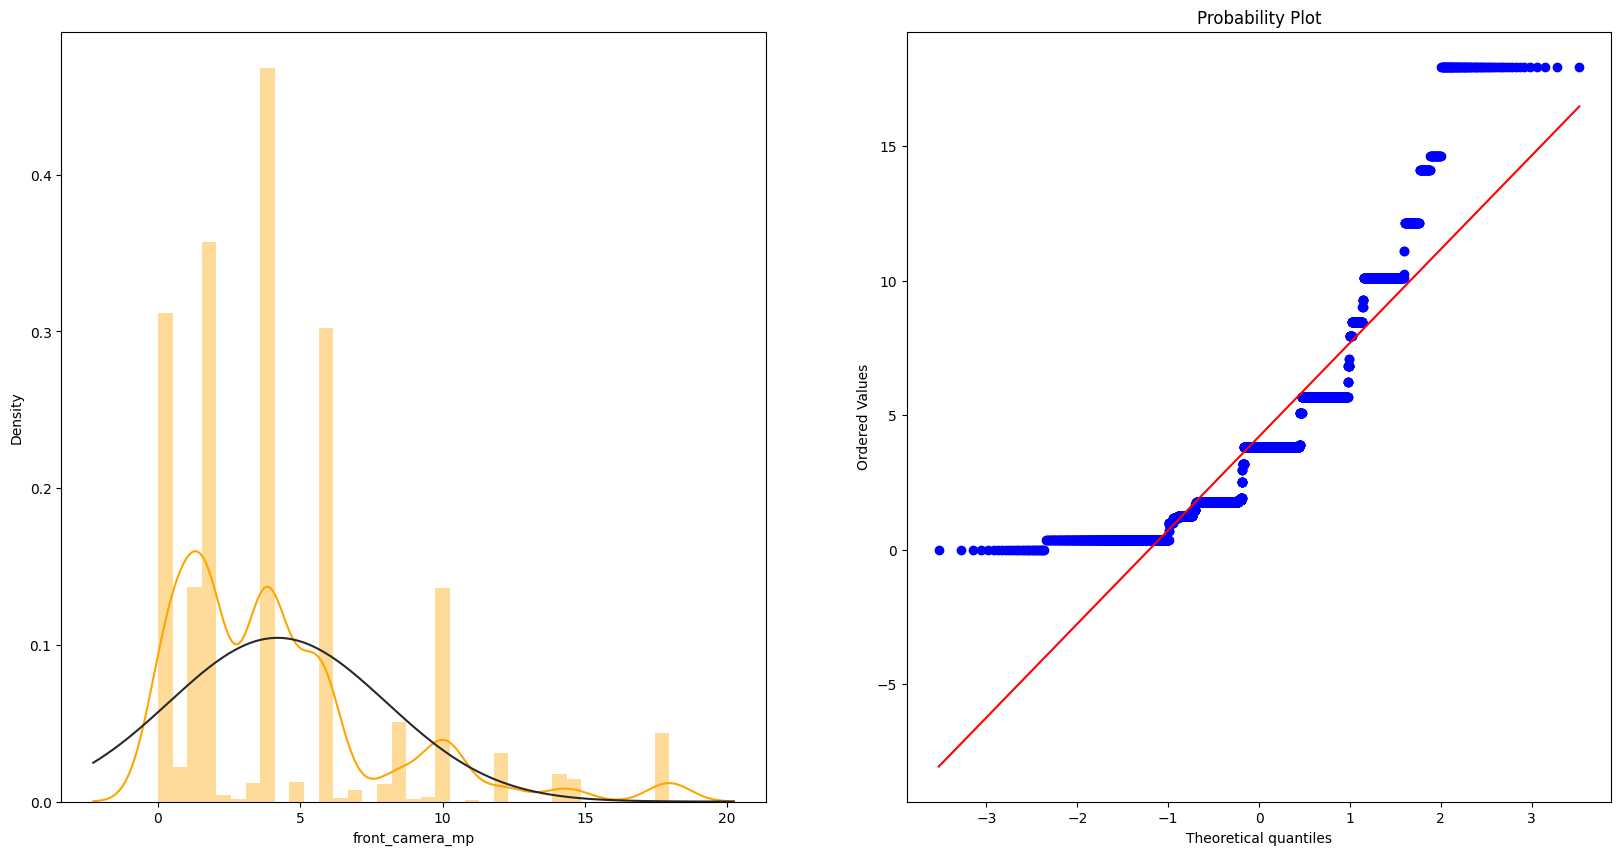

In [169]:
for x in transformations:
    trying_different_transformations('front_camera_mp',x)

## Trying different transformations on battery feature

BoxCox - battery
mu  9.140952663531056  sigma  0.5274073873615559
Log - battery
mu  7.950738907016909  sigma  0.4018552646649475
Reciprocal - battery
mu  0.00038254872318301626  sigma  0.00016467025906119576
Square_Root - battery
mu  54.34431173601634  sigma  11.028271505952869
Exponential - battery
mu  797.3570202661799  sigma  275.7825894042893


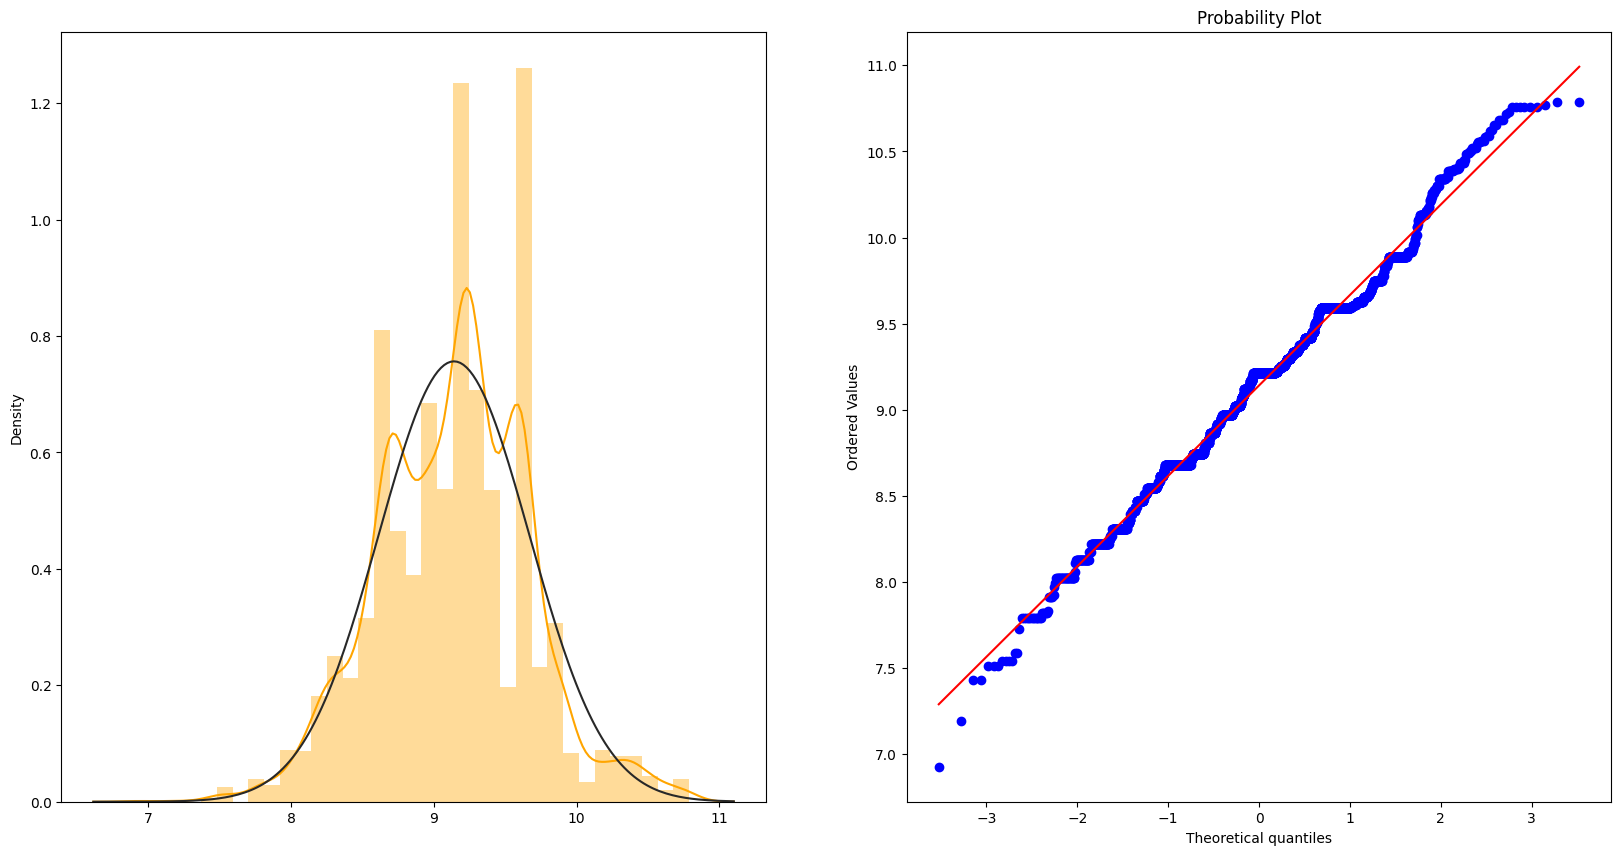

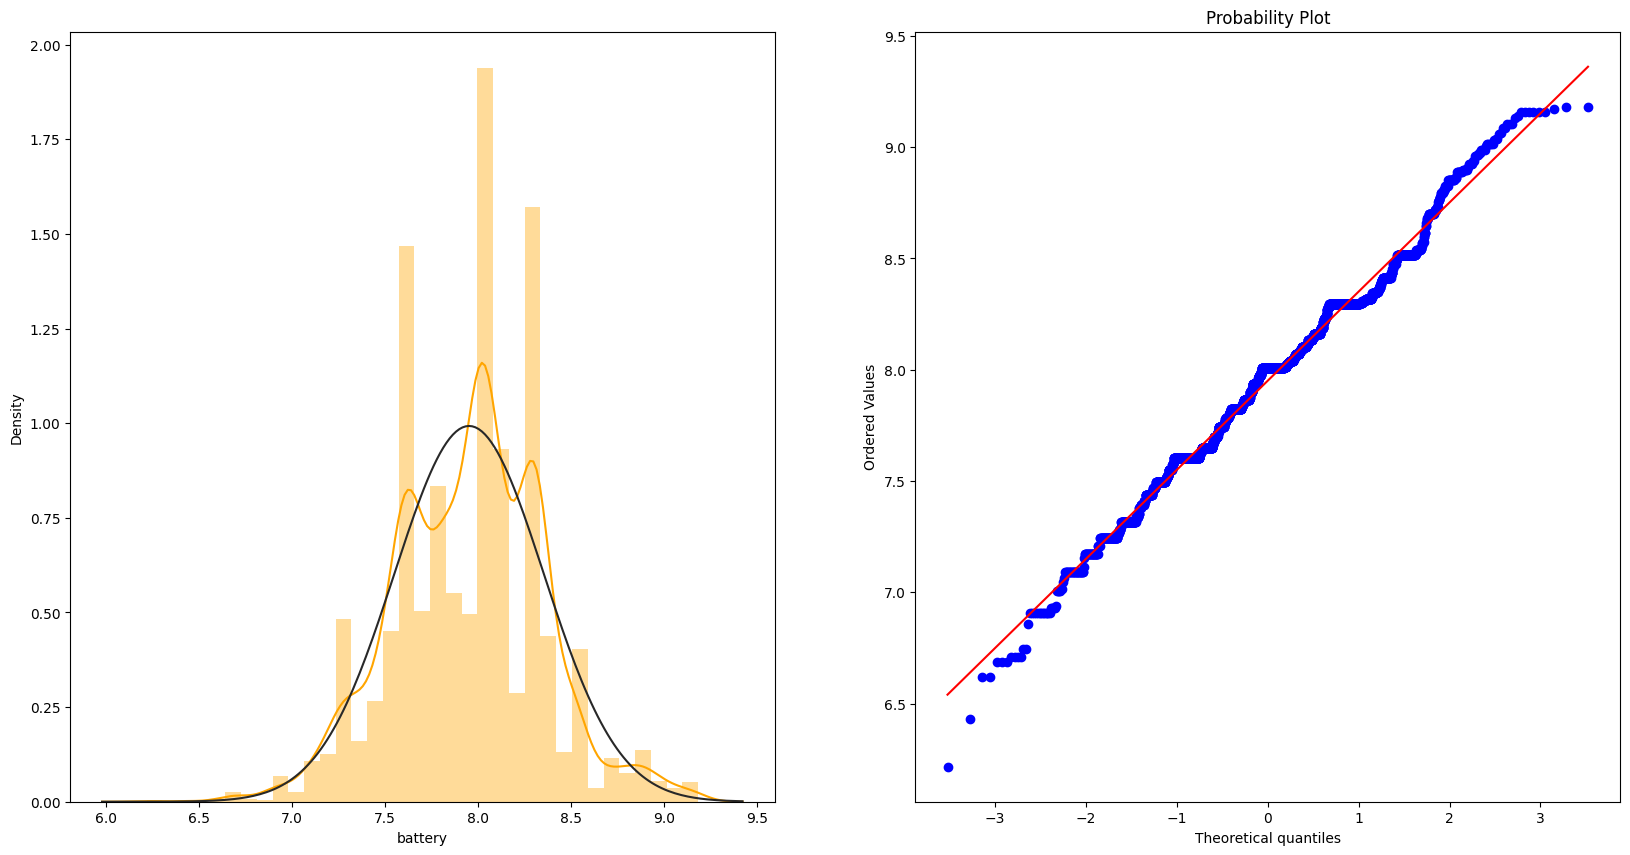

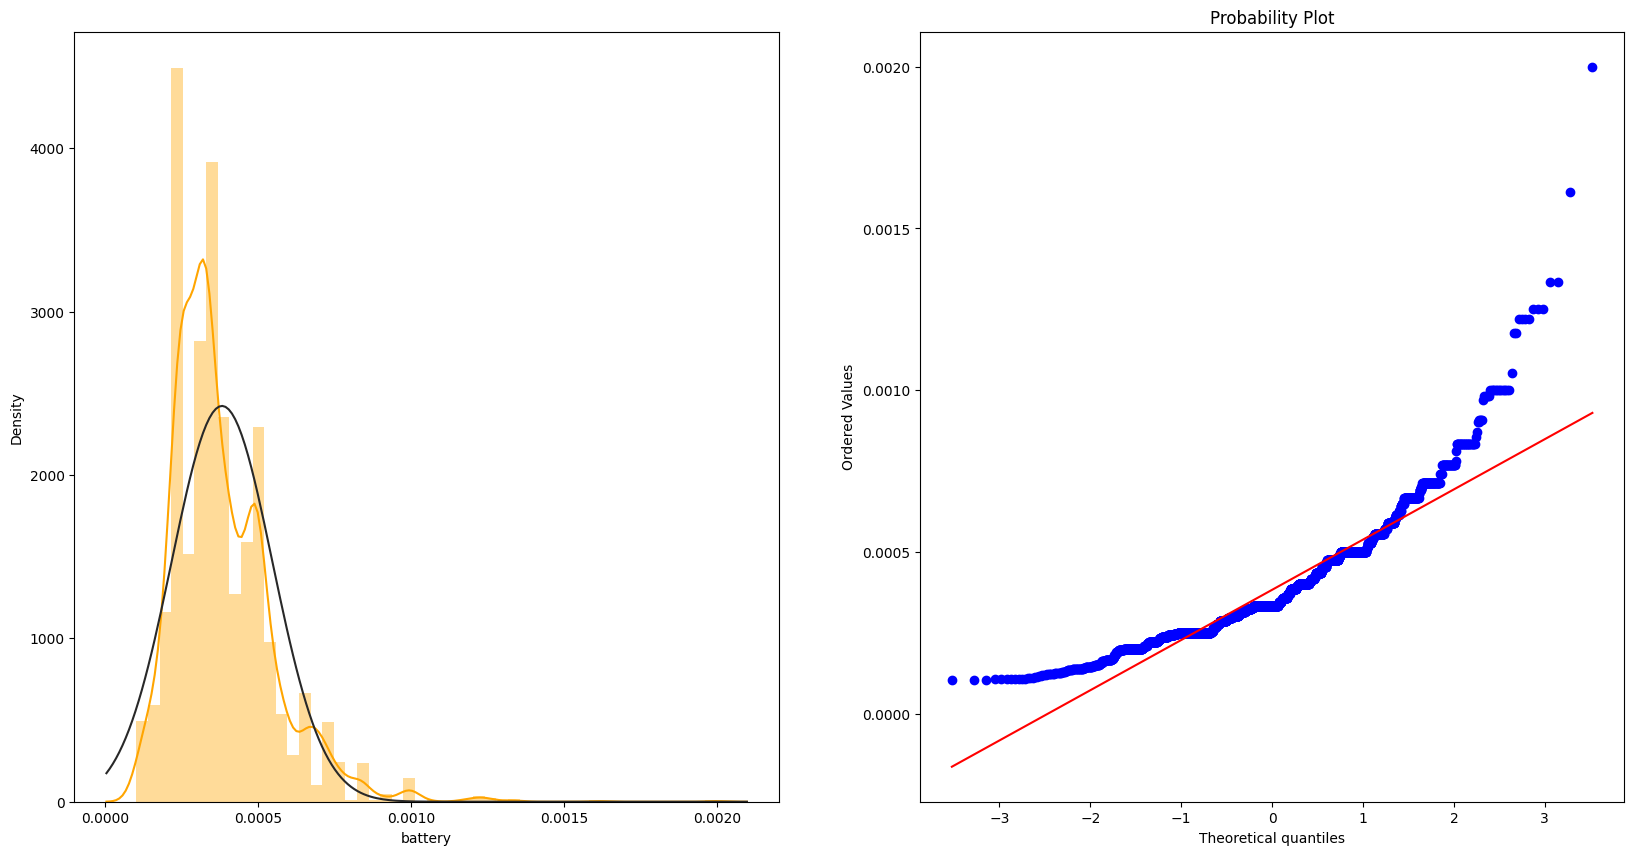

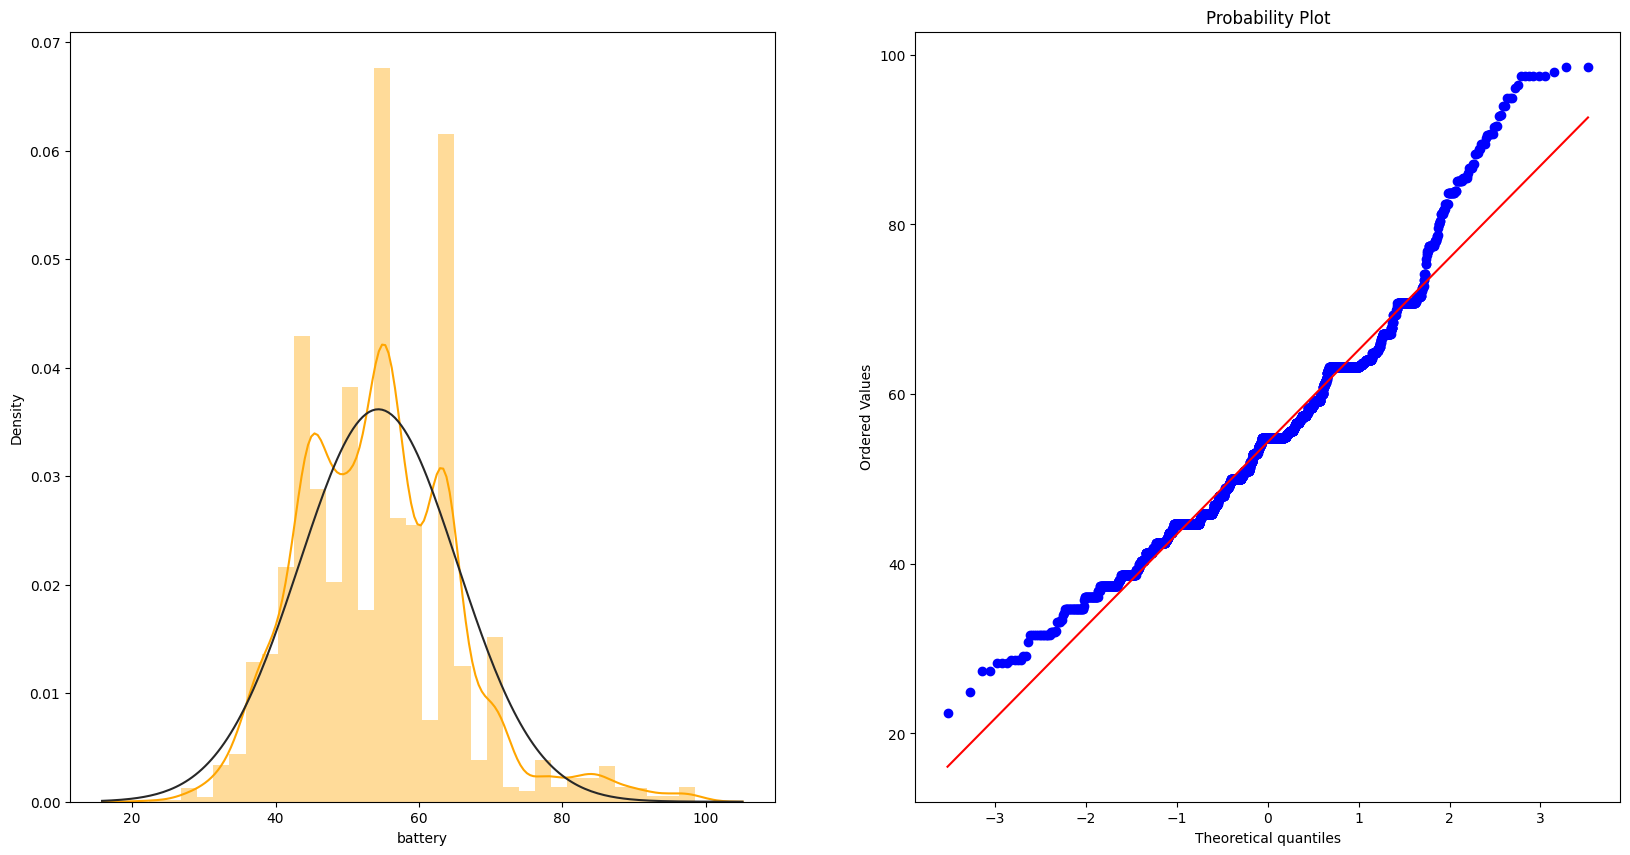

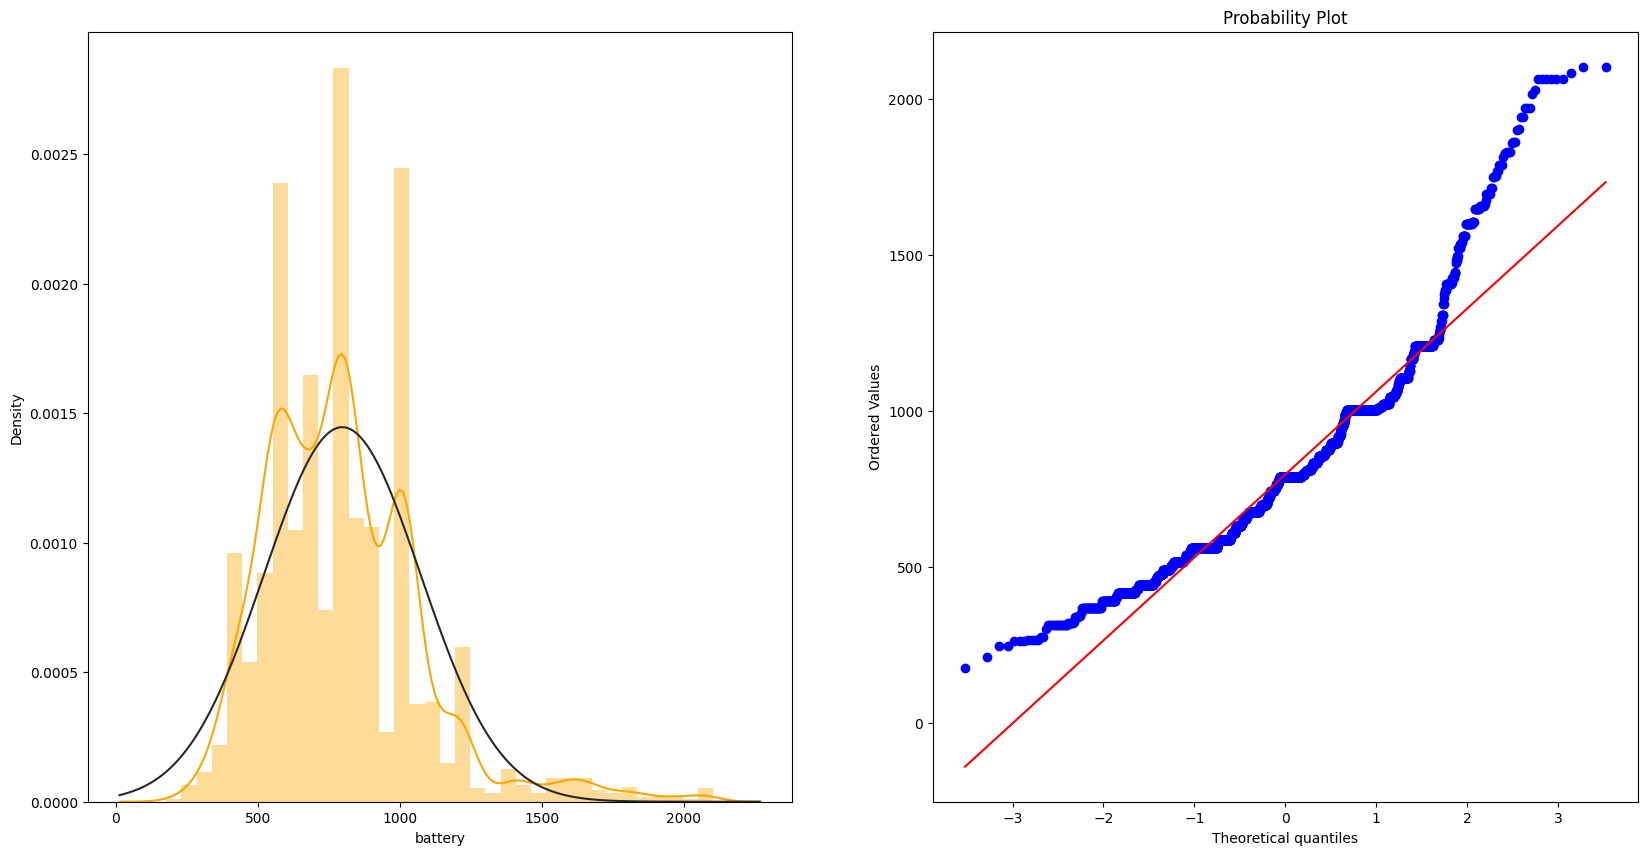

In [170]:
for x in transformations:
    trying_different_transformations('battery',x)

## Trying different transformations on weight feature

BoxCox - weight
mu  0.8331452103173497  sigma  0.000623564194125843
Log - weight
mu  5.1382326242001595  sigma  0.3466813526975624
Reciprocal - weight
mu  0.006213180426972396  sigma  0.0017488702471315902
Square_Root - weight
mu  13.23412673316506  sigma  2.711369811299194
Exponential - weight
mu  75.69601373789506  sigma  29.257851090331783


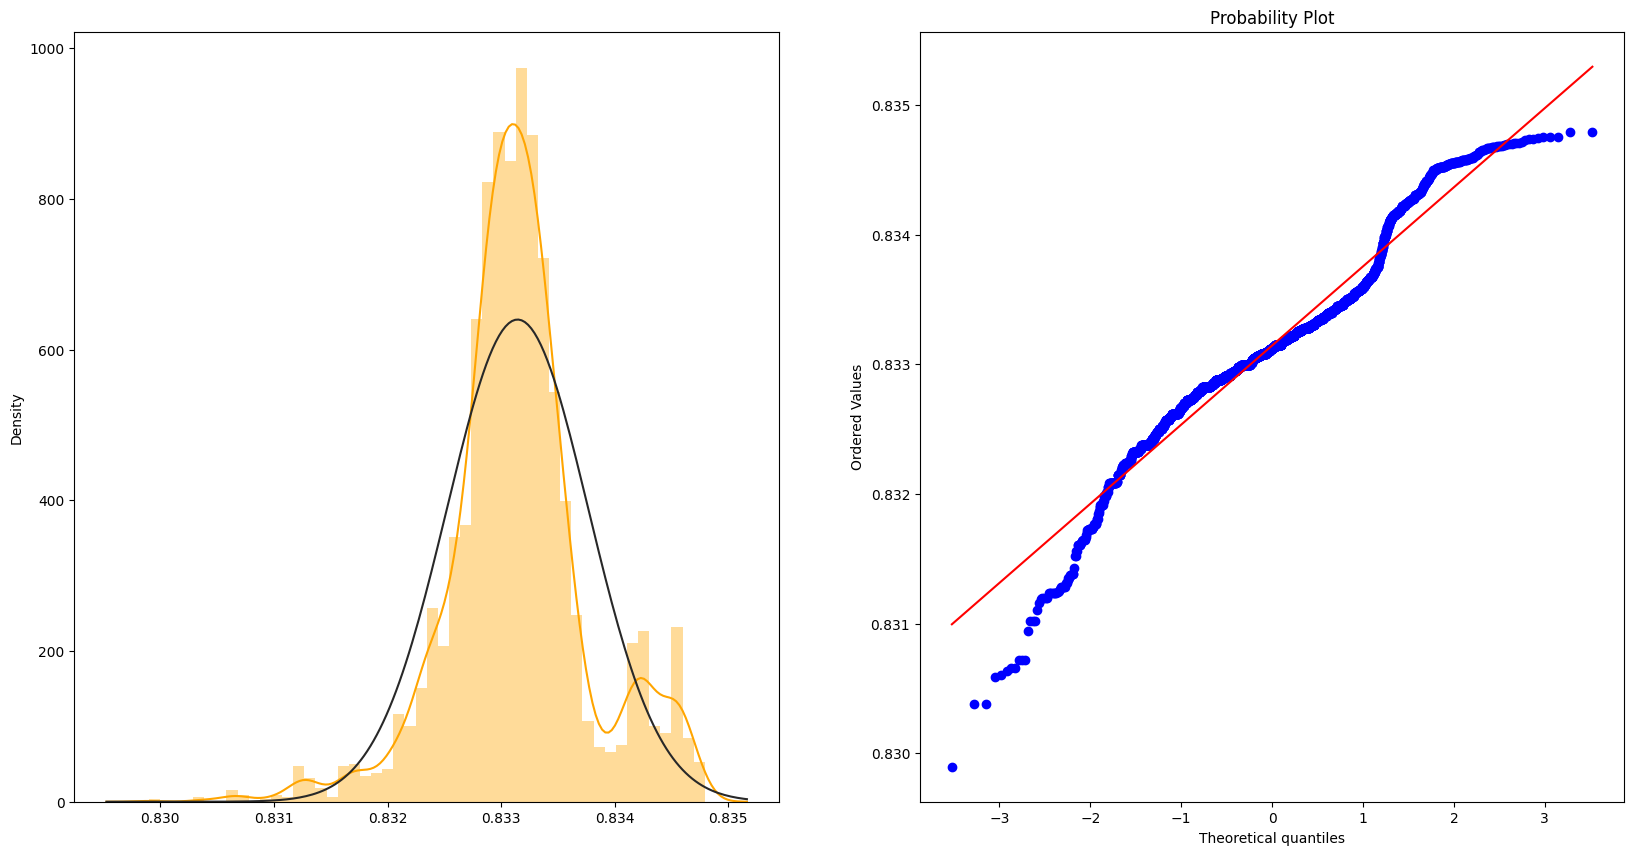

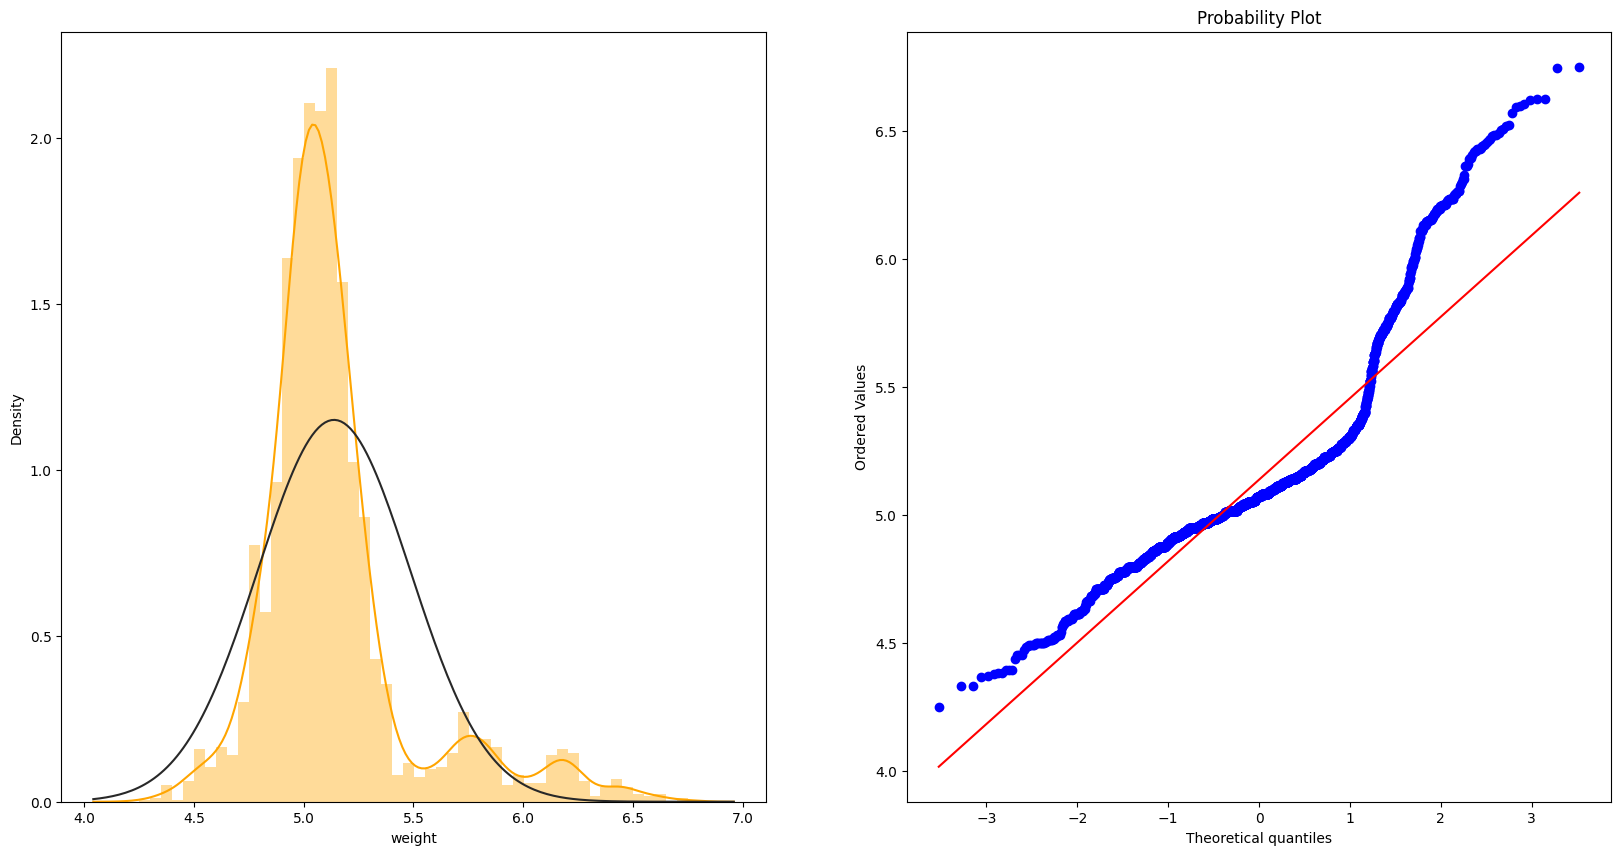

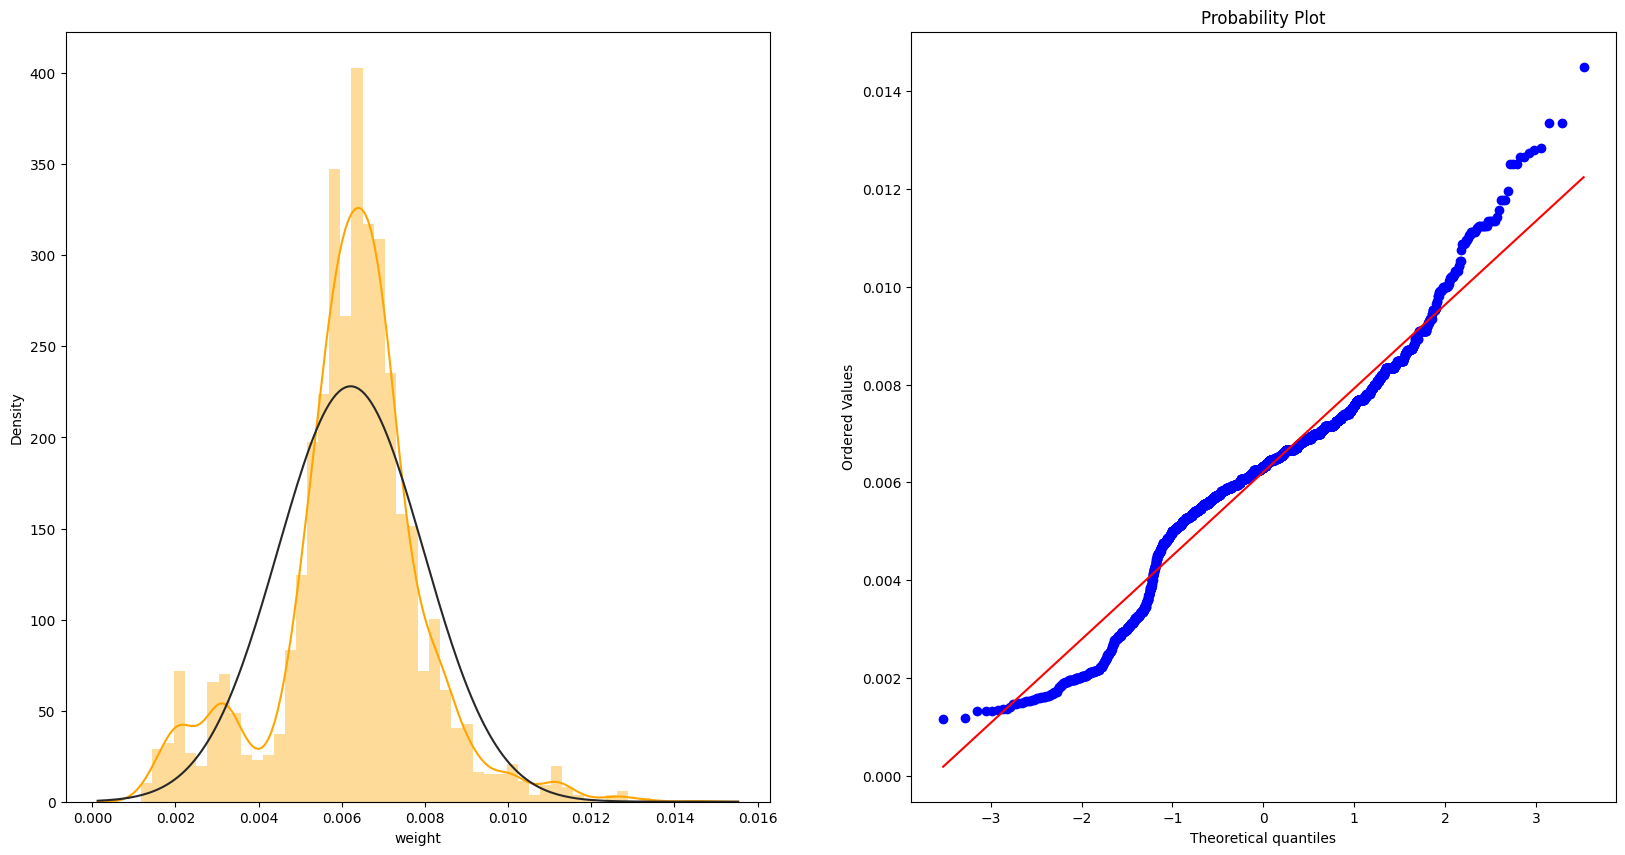

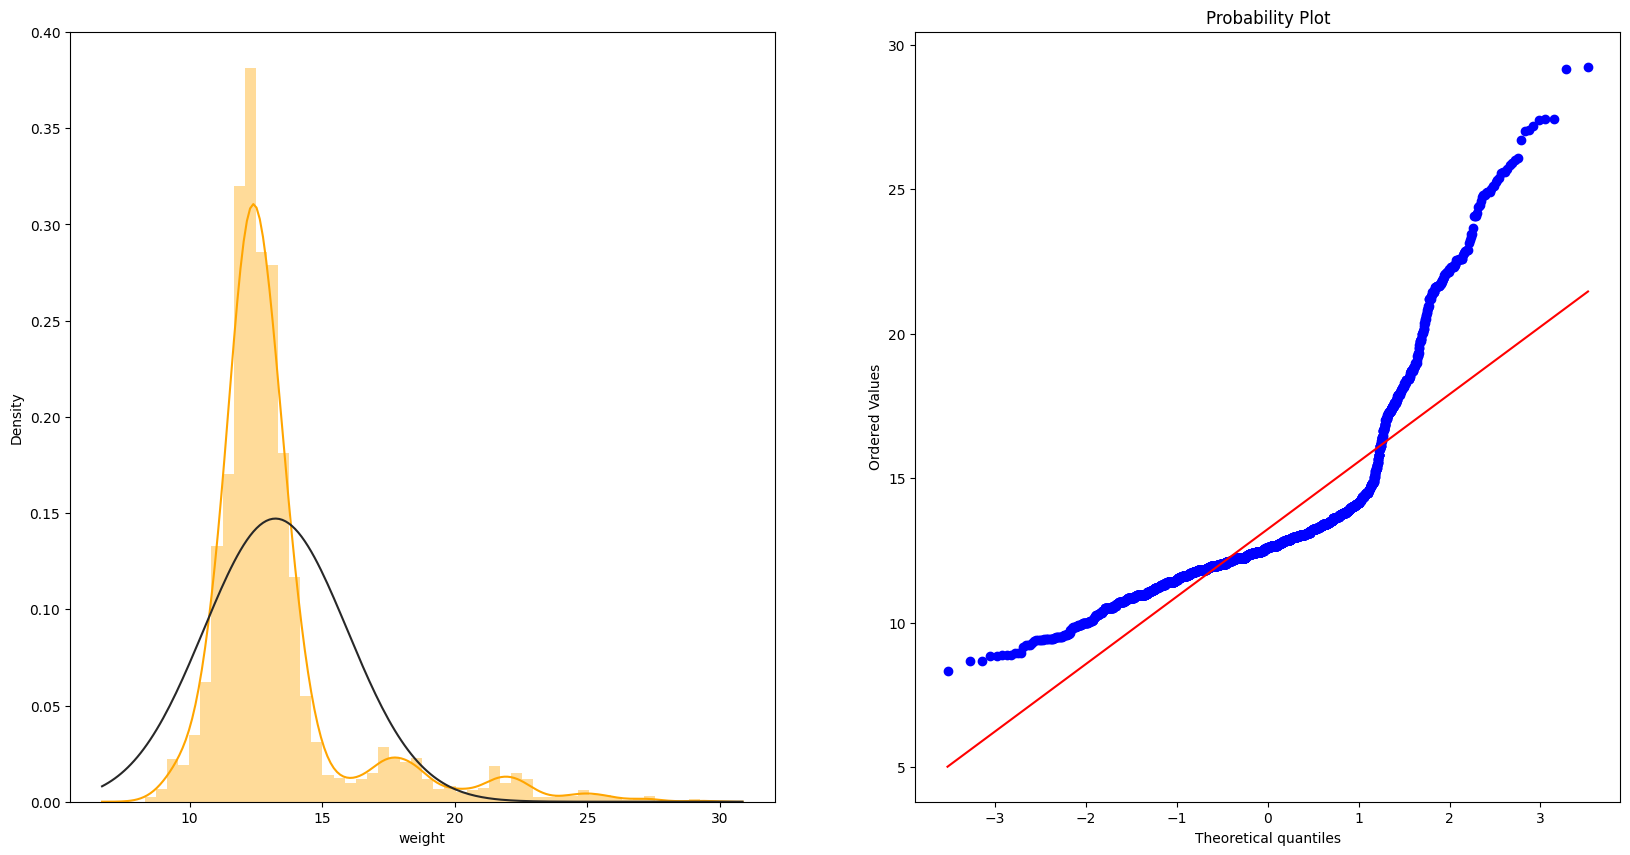

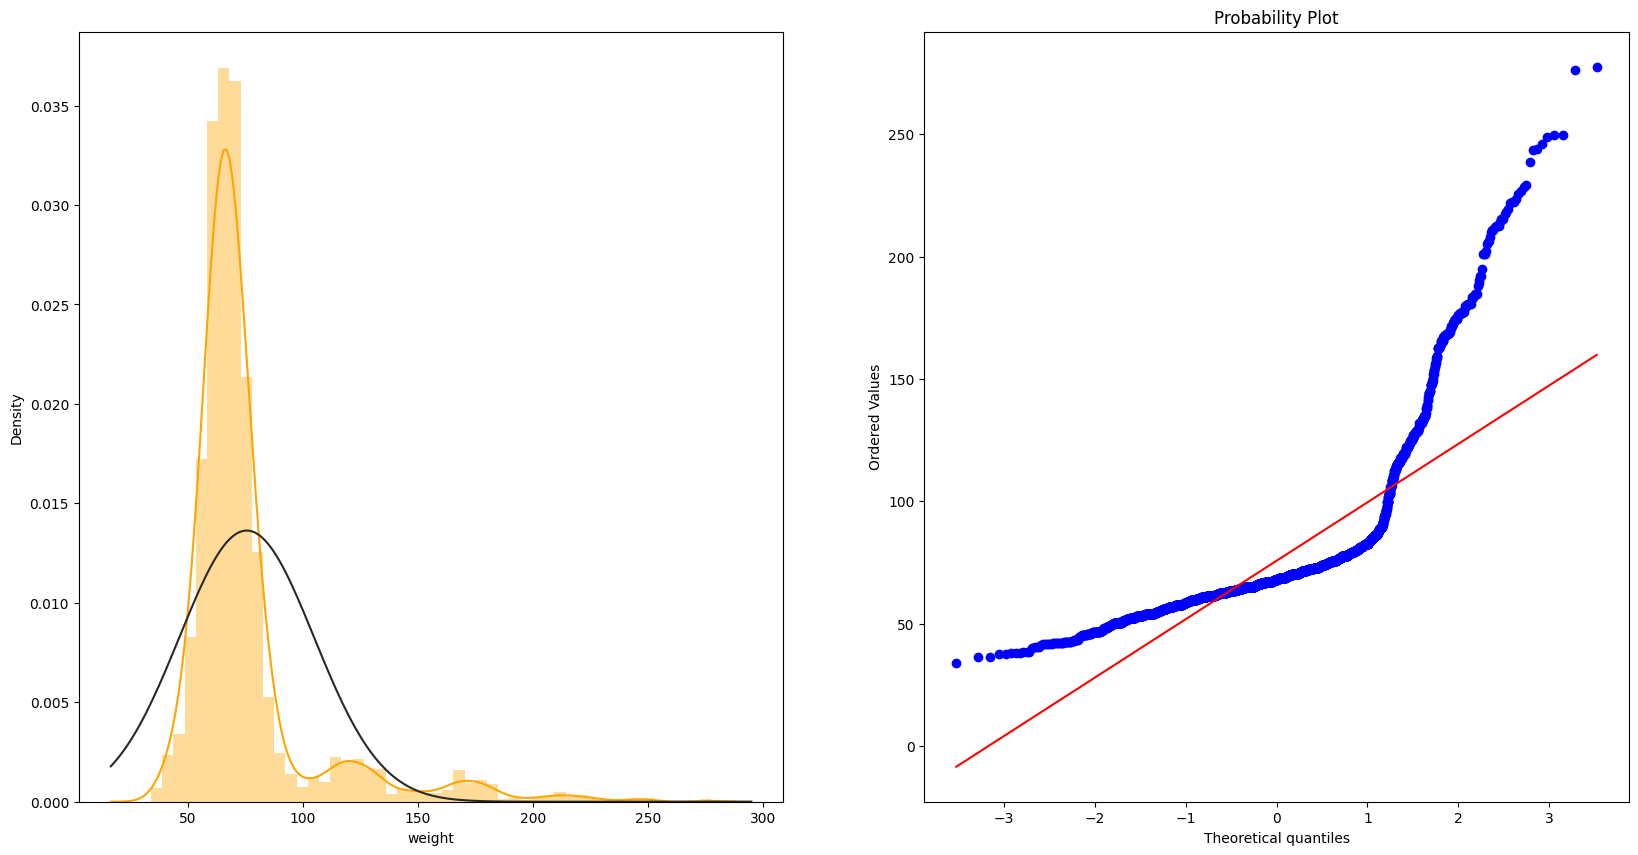

In [171]:
for x in transformations:
    trying_different_transformations('weight',x)

## Trying different transformations on days_used feature

BoxCox - days_used
mu  3496.806846144258  sigma  1439.0447484796455
Log - days_used
mu  6.468905953652584  sigma  0.4336628749605923
Reciprocal - days_used
mu  0.0017471434574026178  sigma  0.0011108860529121054
Square_Root - days_used
mu  25.917714586315785  sigma  4.895654067969873
Exponential - days_used
mu  231.58748020692875  sigma  67.54464188114896


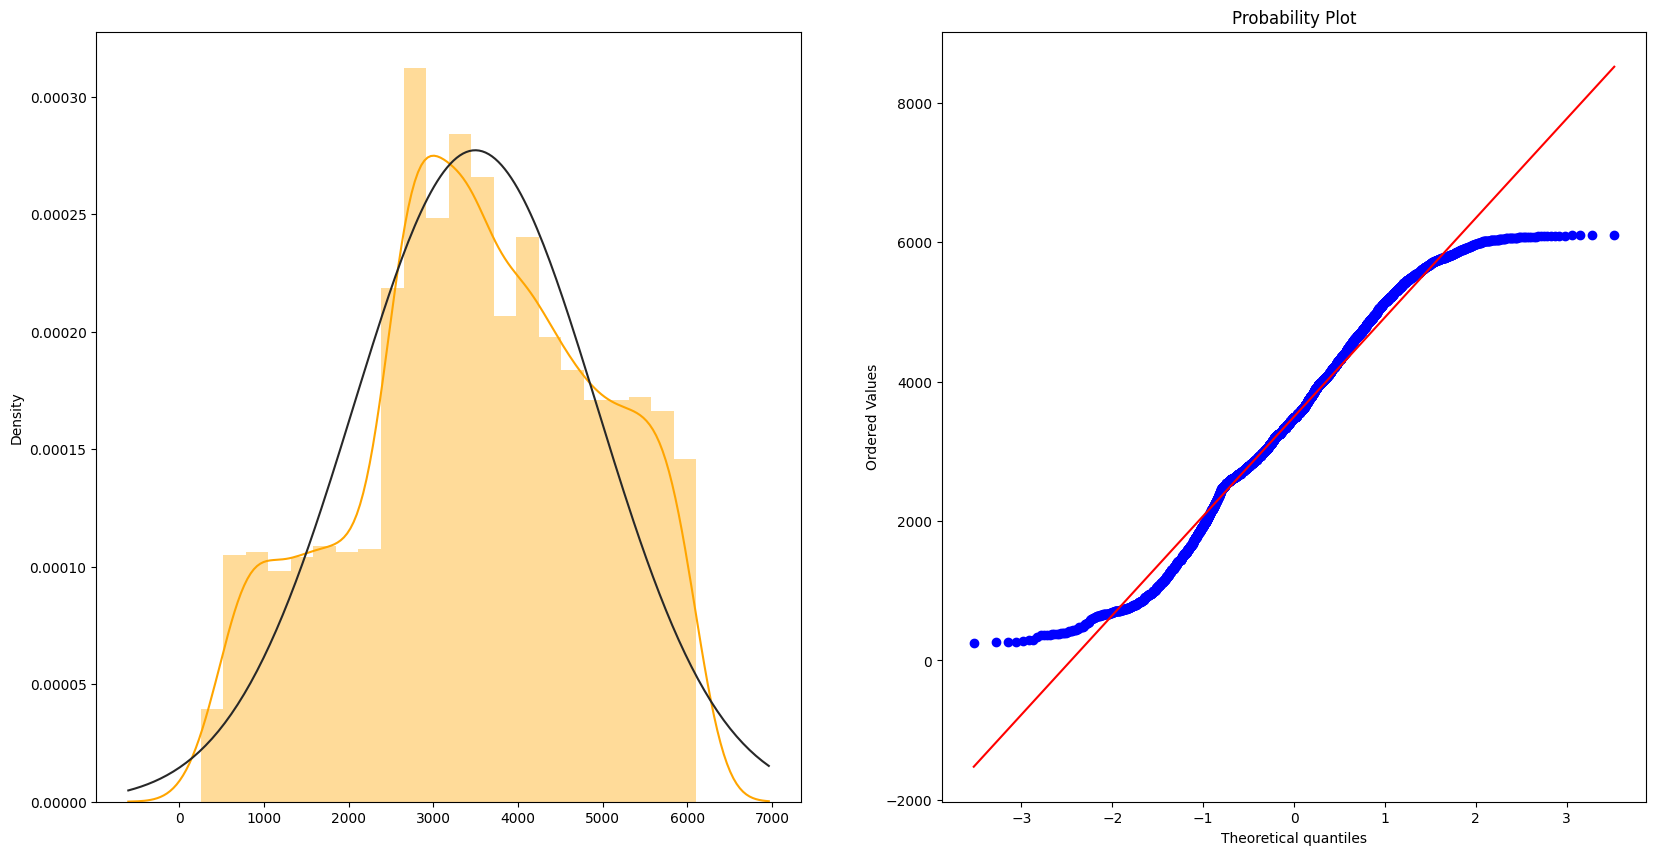

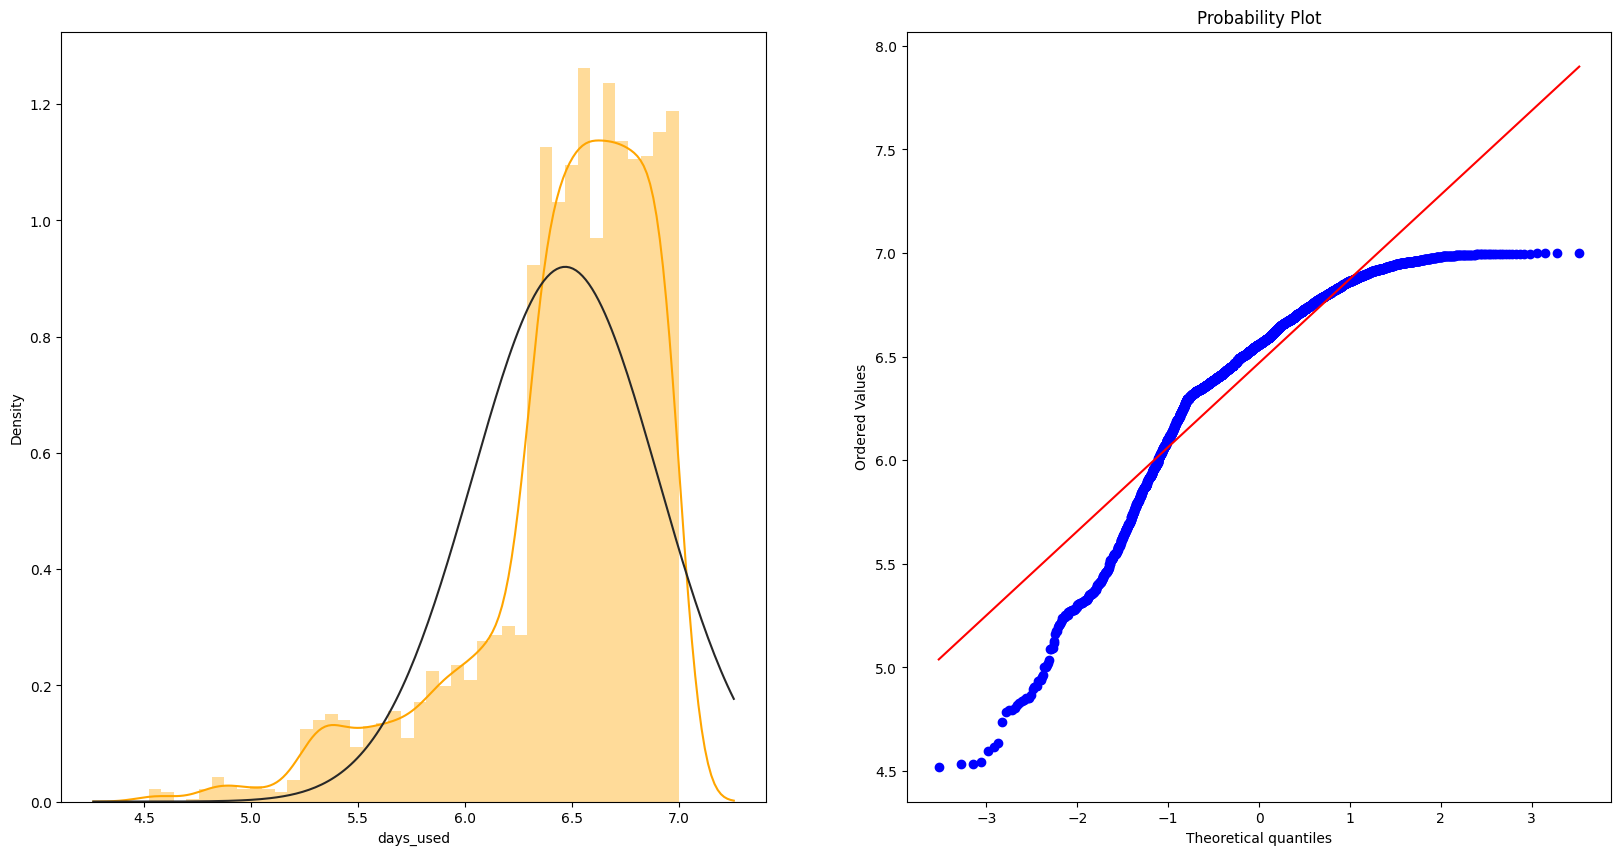

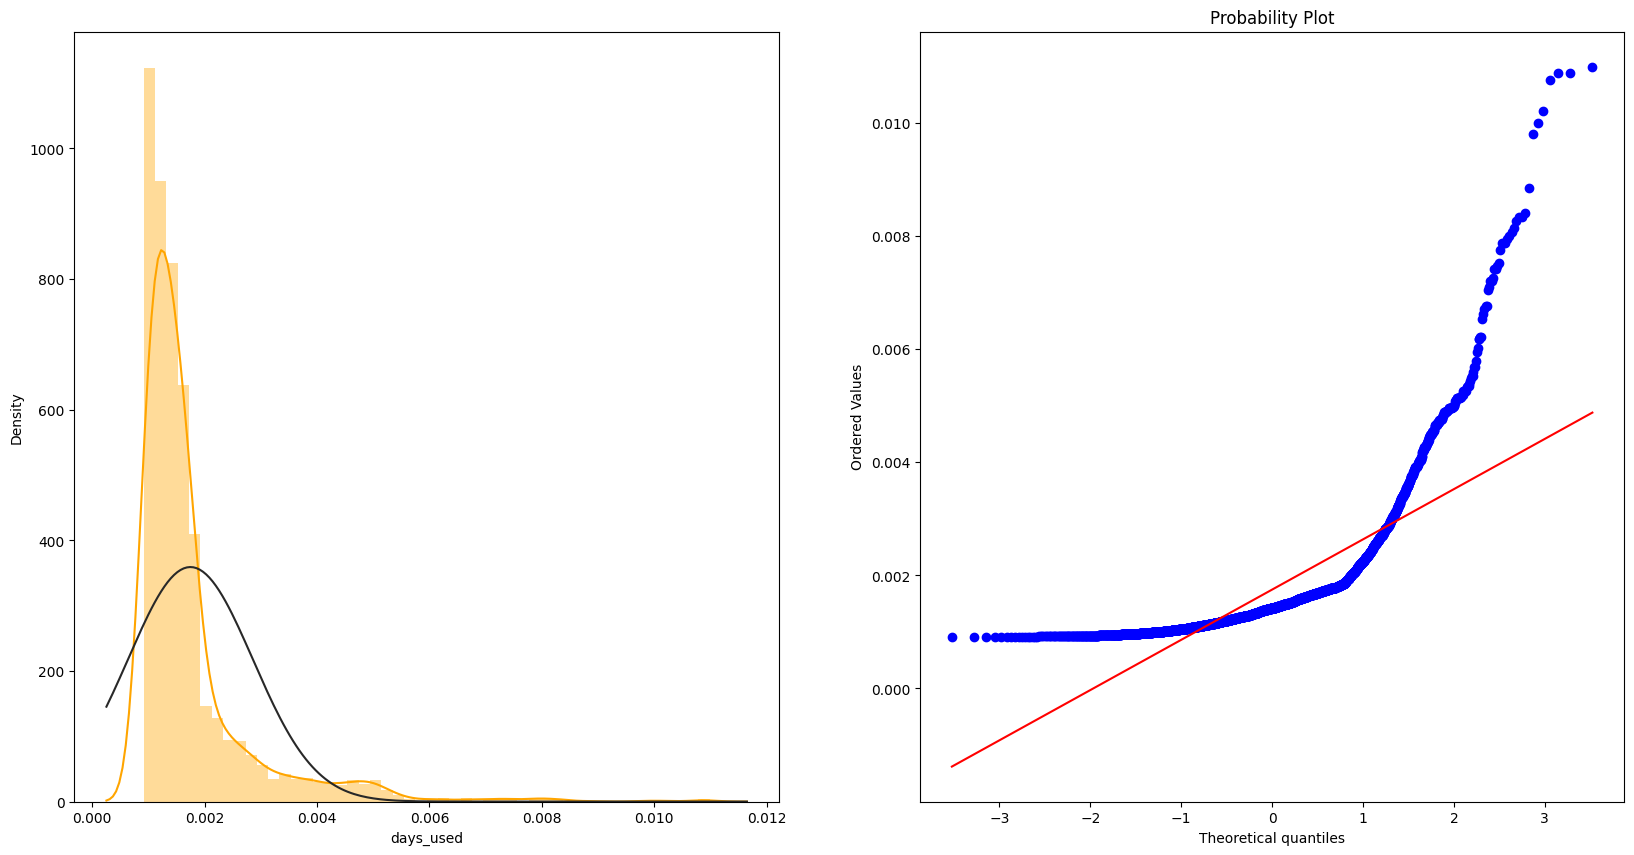

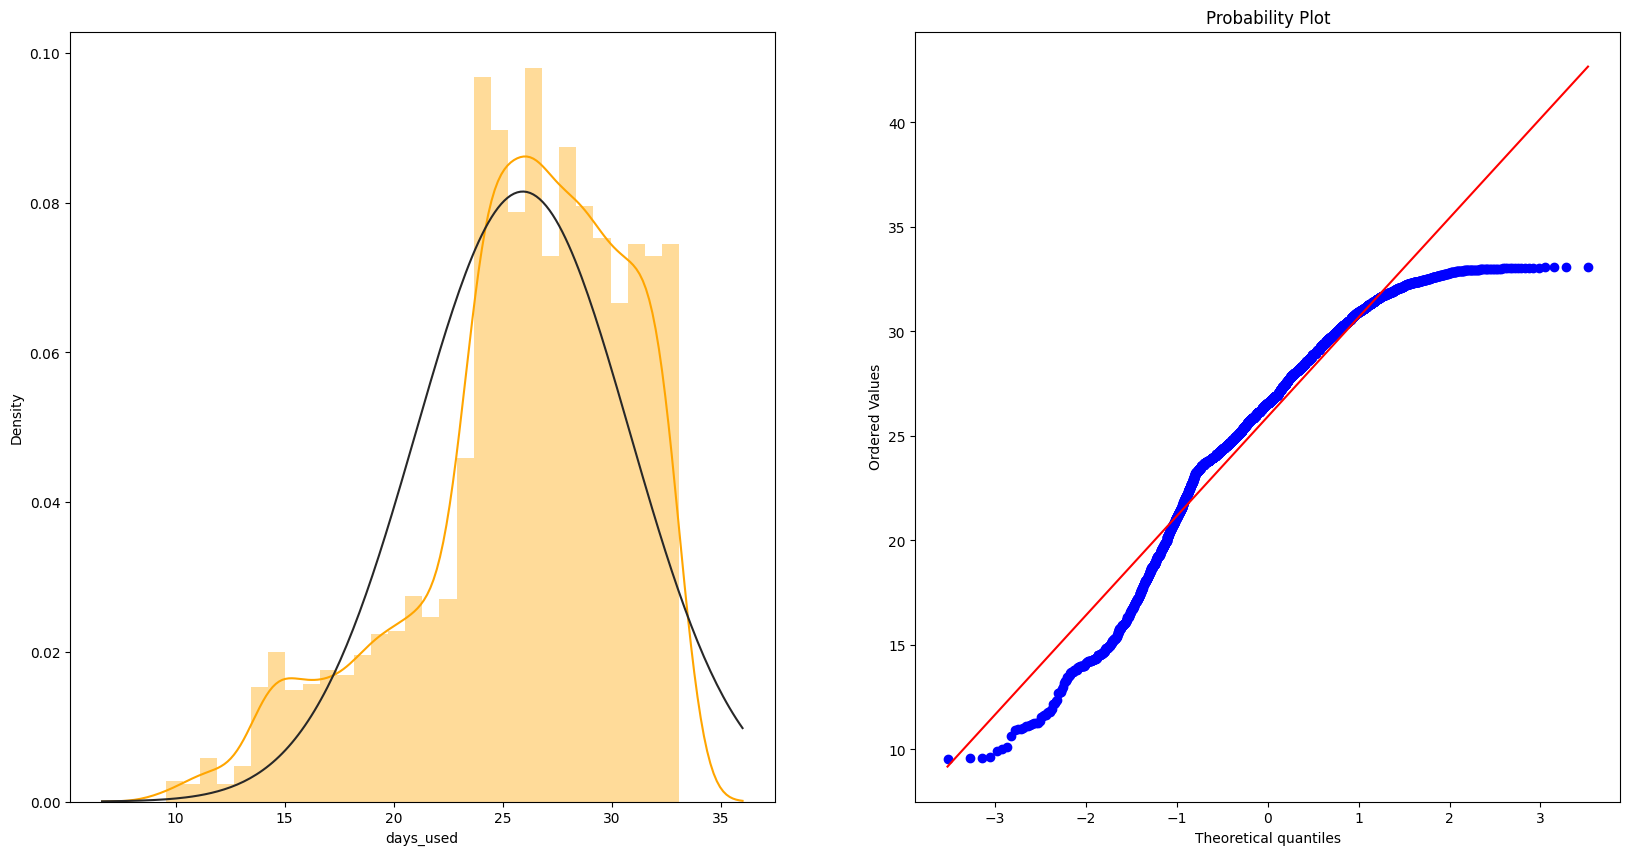

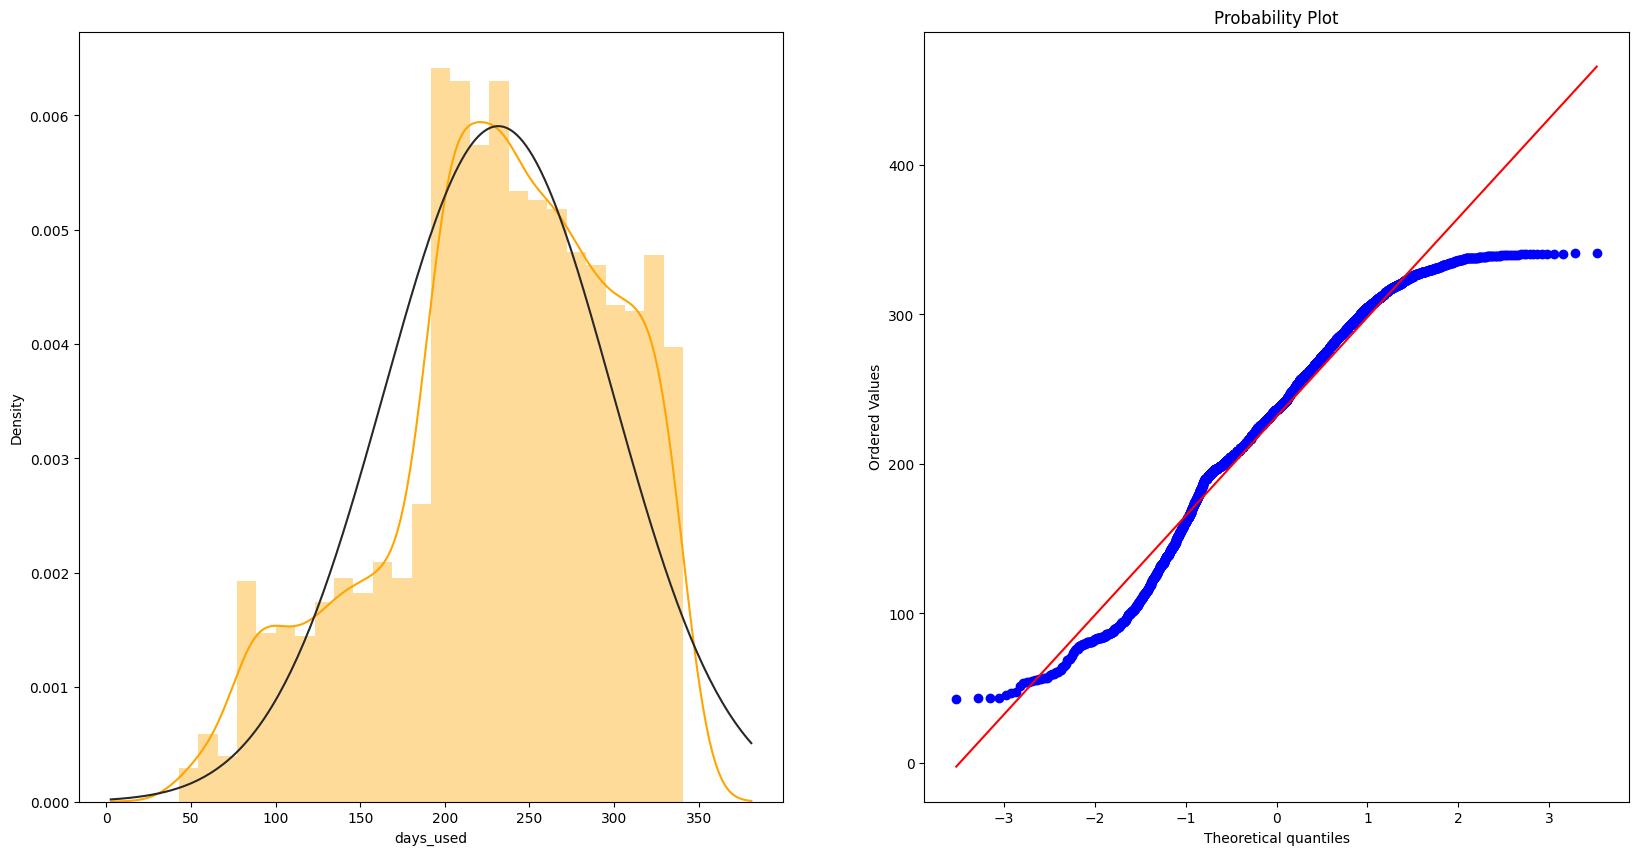

In [172]:
for x in transformations:
    trying_different_transformations('days_used',x)

# Applying transformations

In [173]:
def skweness_correction(columnName):    
    if columnName == 'front_camera_mp' or columnName == 'screen_size' or columnName == 'battery':
        data[columnName], temp_params = boxcox(
        data[columnName]+1)
    elif columnName == 'weight':
        data[columnName] = 1/data[columnName].replace([np.inf, -np.inf], 0)
    elif columnName =='rear_camera_mp':
        data[columnName] = data[columnName]**(1/2)
    print('''After Correcting''')
    (mu, sigma) = norm.fit(data[columnName])
    print("Mu after correcting {} : {}, Sigma after correcting {} : {}".format(
        columnName.upper(), mu, columnName.upper(), sigma))
    plt.figure(figsize=(20, 10))
    plt.subplot(1,2,1)
    sns.distplot(data[columnName], fit=norm, color="orange")
    plt.title(columnName.upper() +
              " Distplot After Skewness Correction", color="black")
    plt.subplot(1,2,2)
    stats.probplot(data[columnName], plot = plt)
    plt.show();

After Correcting
Mu after correcting SCREEN_SIZE : 3.569840626369066, Sigma after correcting SCREEN_SIZE : 0.4545136746419827


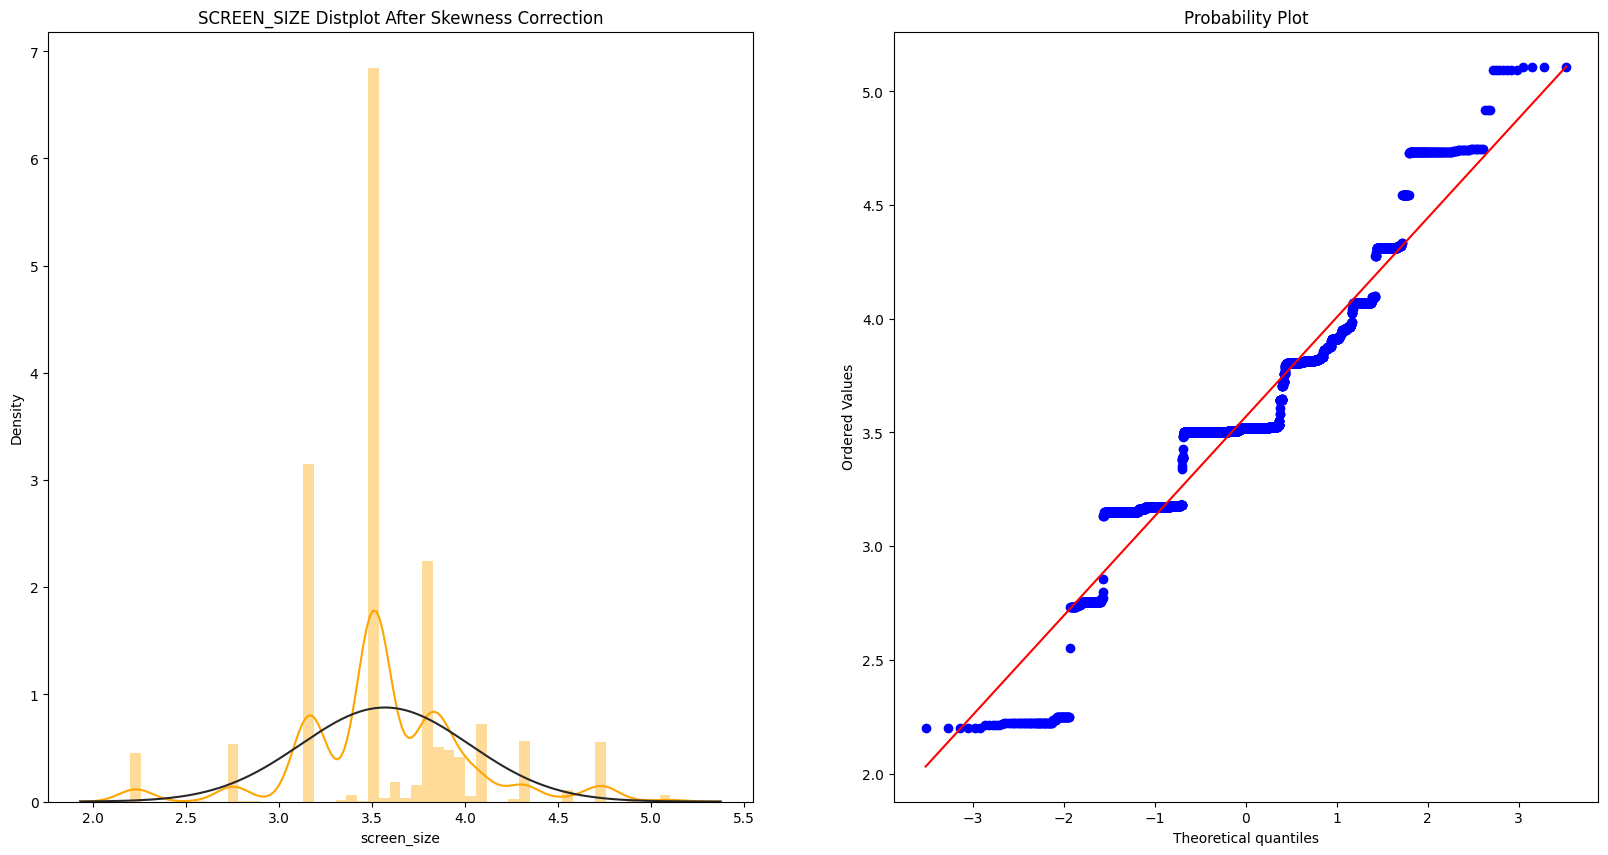

After Correcting
Mu after correcting REAR_CAMERA_MP : 2.9592967600910938, Sigma after correcting REAR_CAMERA_MP : 0.847889627462975


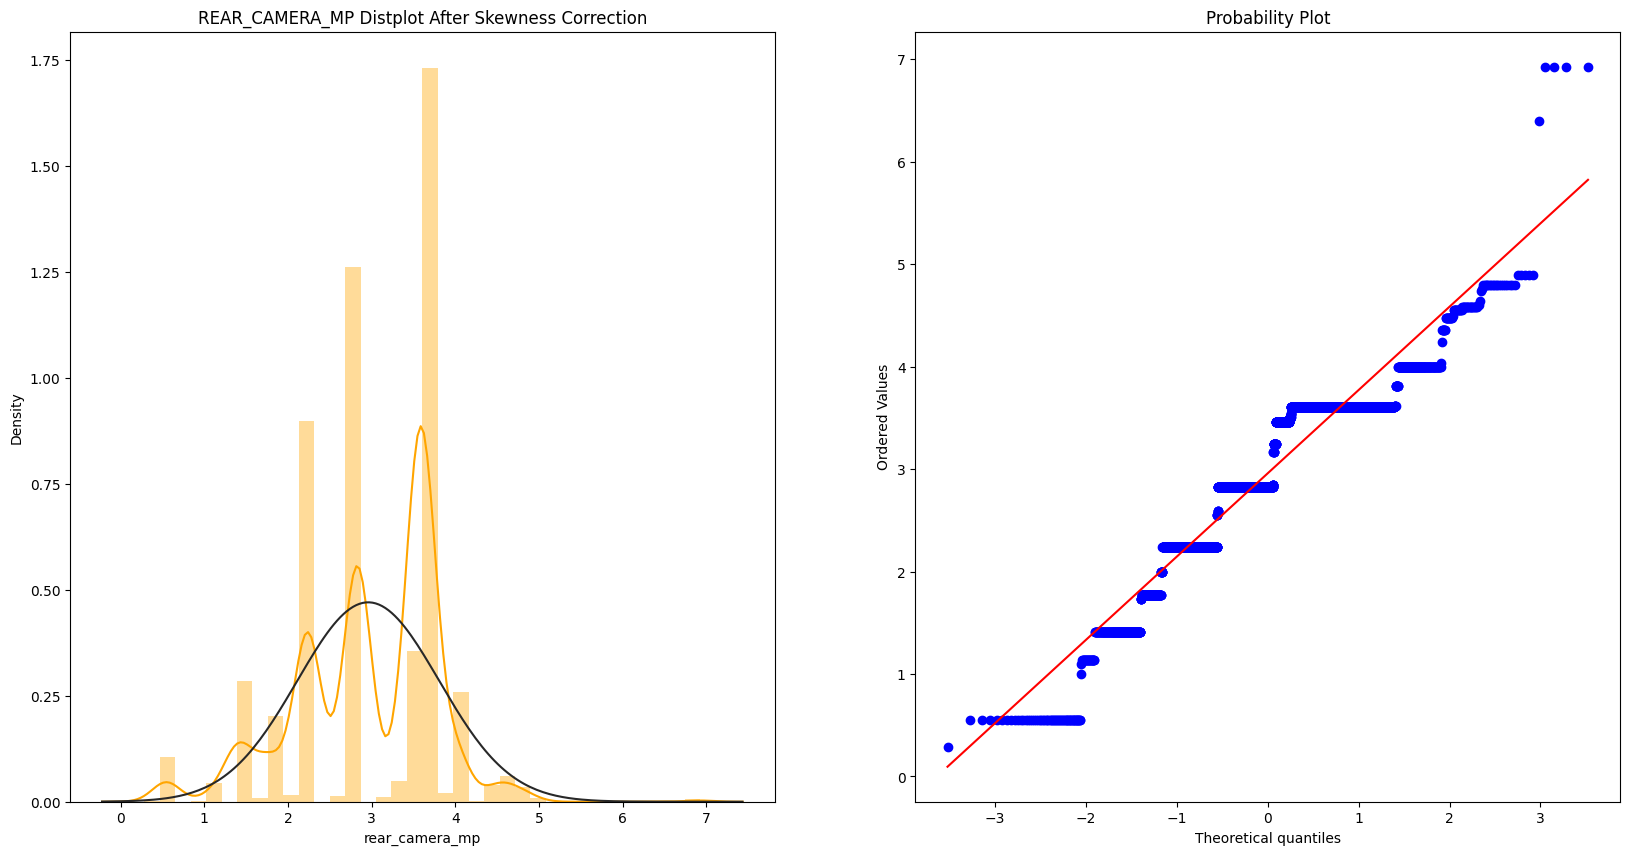

After Correcting
Mu after correcting FRONT_CAMERA_MP : 1.5268144756253081, Sigma after correcting FRONT_CAMERA_MP : 0.819368805379863


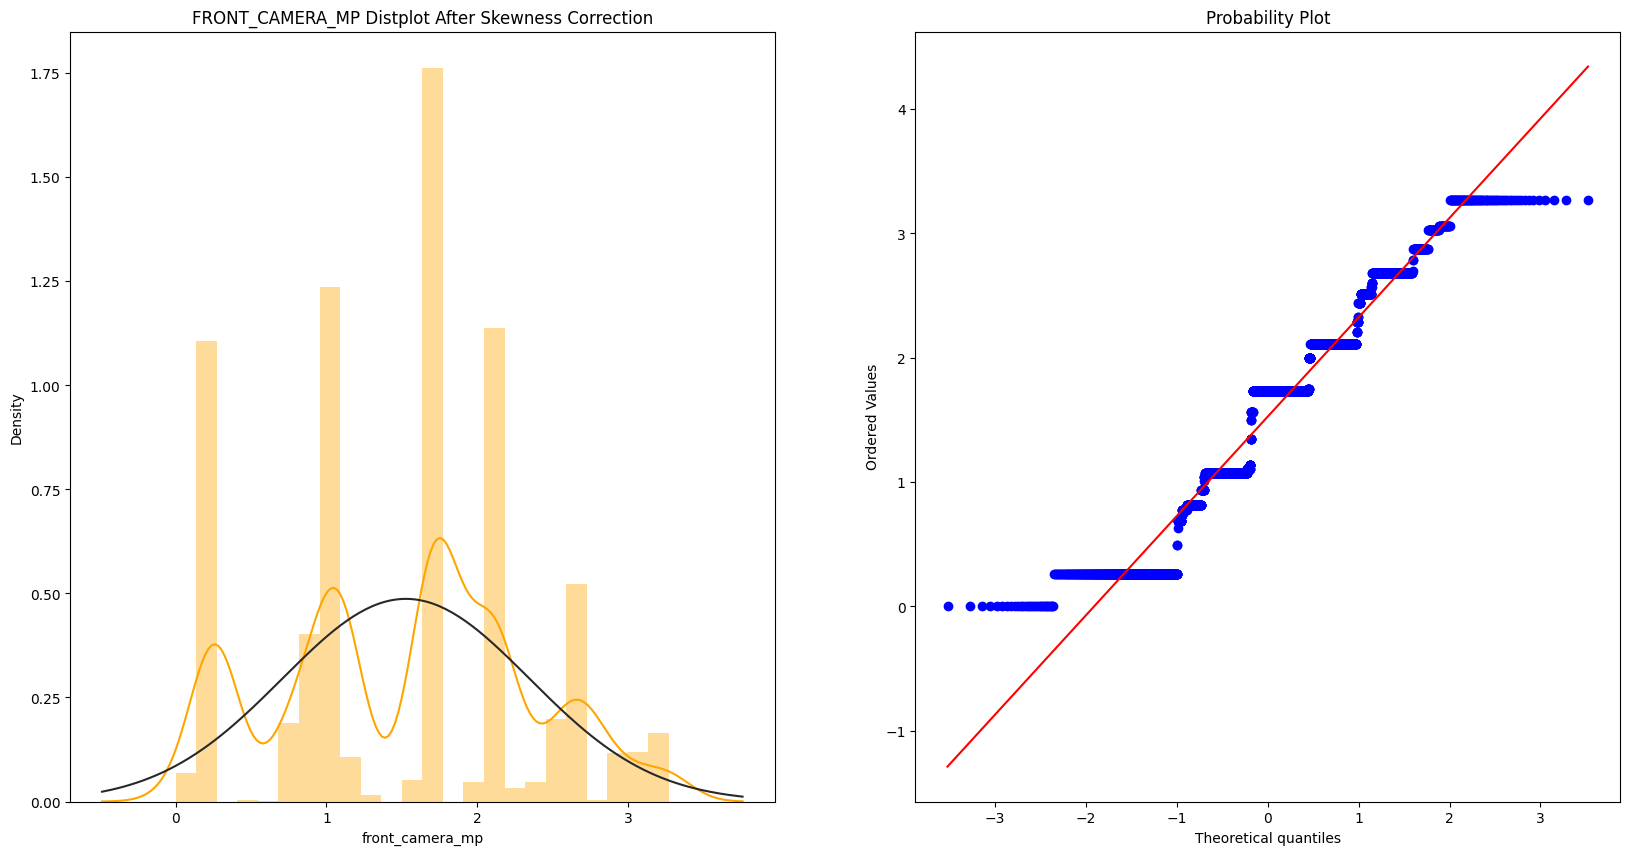

After Correcting
Mu after correcting BATTERY : 9.140952663531056, Sigma after correcting BATTERY : 0.5274073873615559


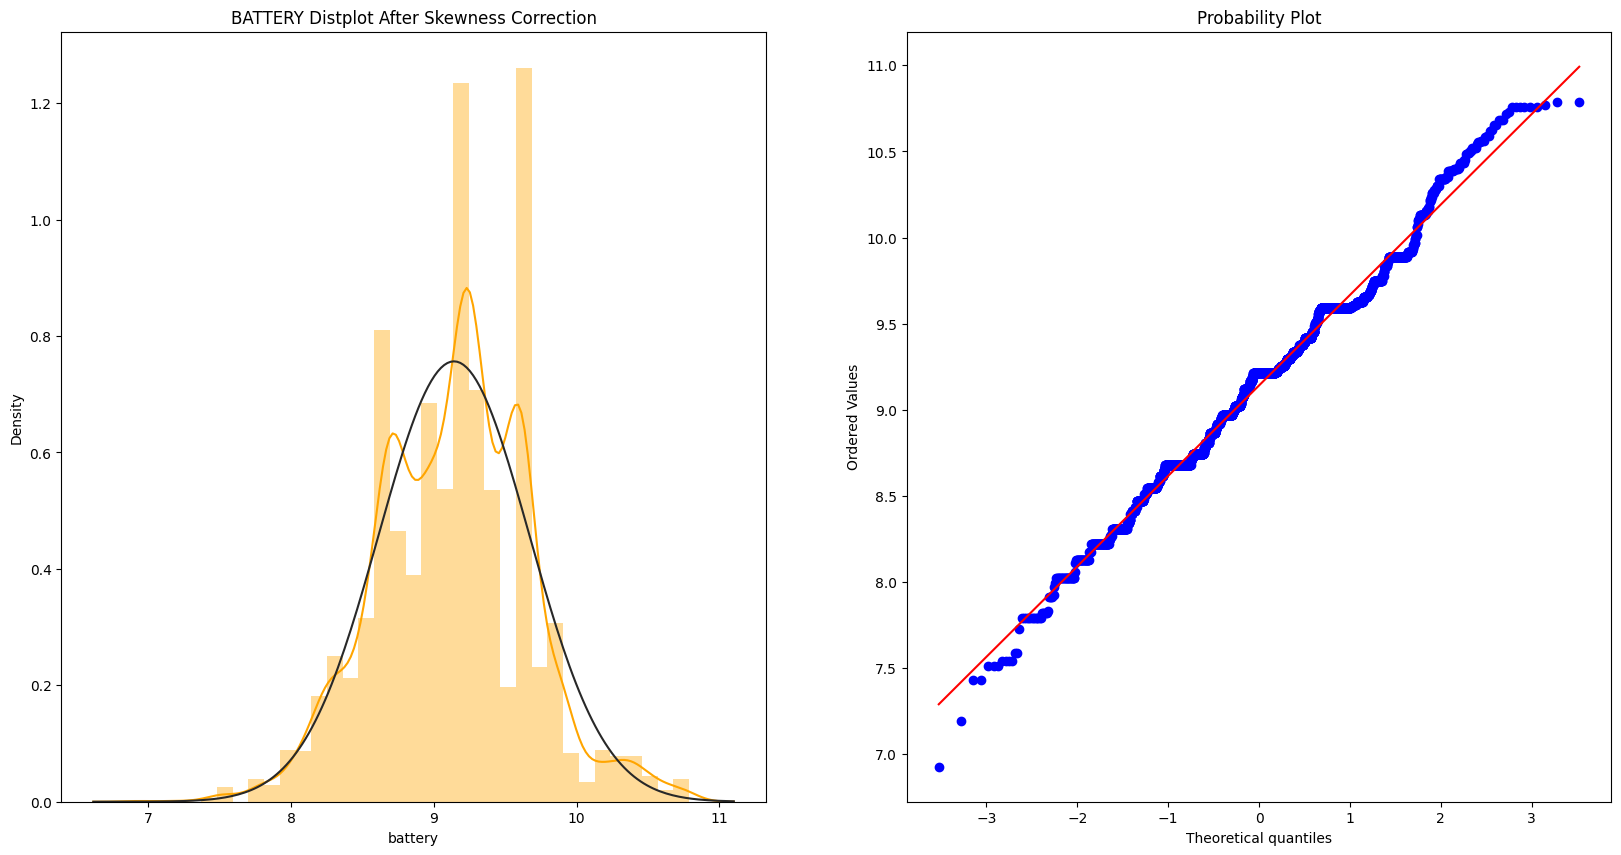

After Correcting
Mu after correcting WEIGHT : 0.006213180426972396, Sigma after correcting WEIGHT : 0.0017488702471315902


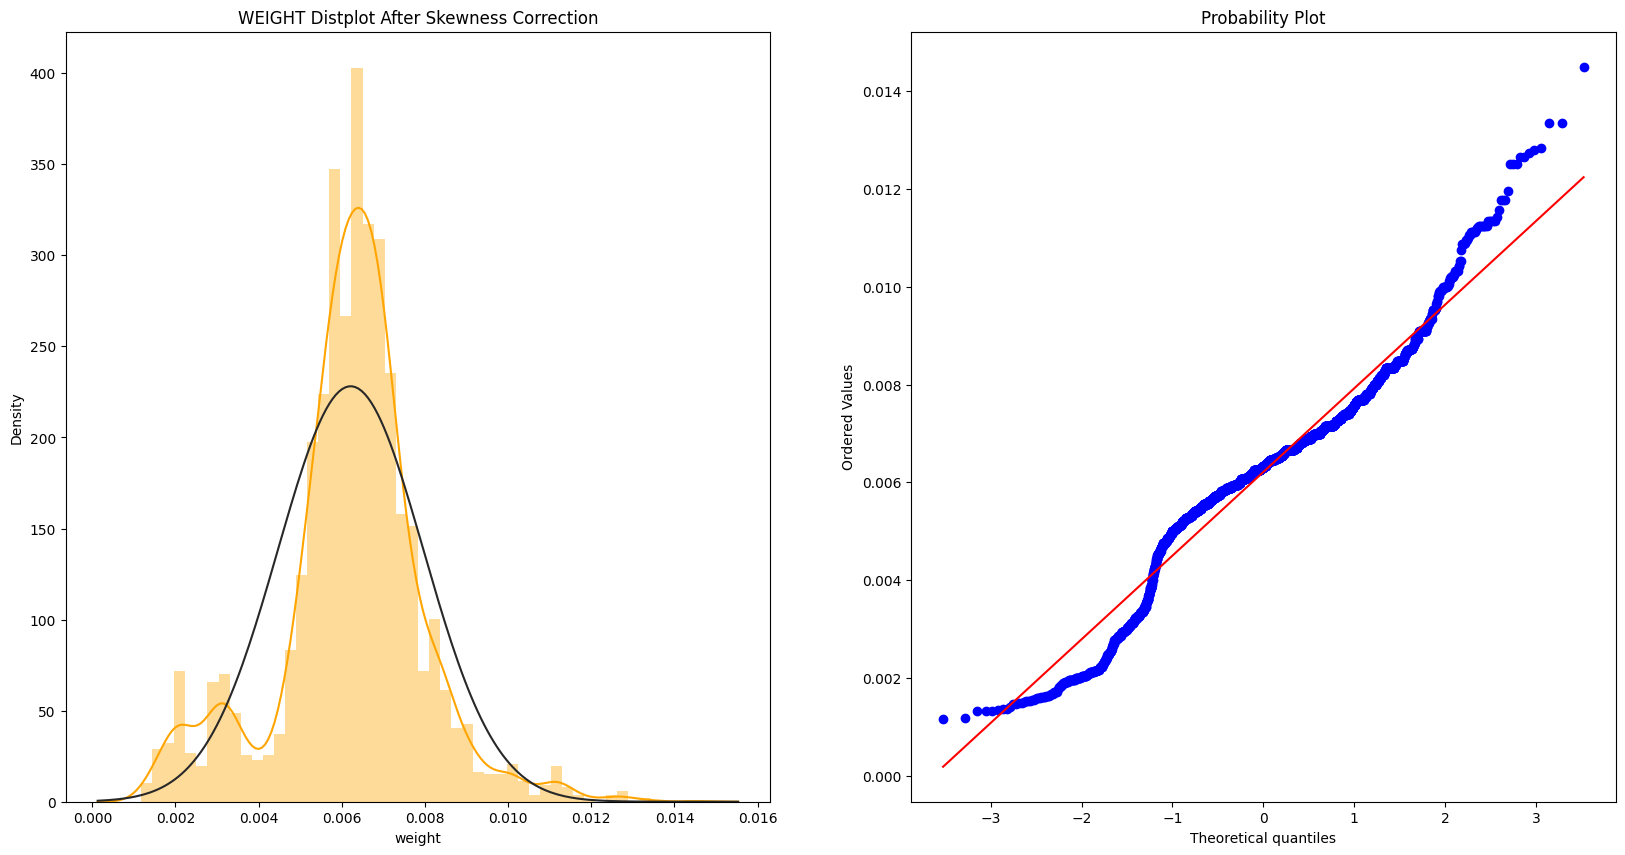

In [174]:
skewColumnList1 = ['screen_size','rear_camera_mp','front_camera_mp','battery','weight']
for columns in skewColumnList1:
    skweness_correction(columns)

# Dropping Outliers!

In [175]:
len(detect_outliers(cols2))

435

In [176]:
data = data.drop(detect_outliers(cols2),axis = 0).reset_index(drop = True)

In [177]:
data.shape[0]

2818

# Encoding categorical features

In [178]:
data = data.drop(['os','device_brand'],axis=1)

In [179]:
data

screen_size  4g  5g  rear_camera_mp  front_camera_mp  internal_memory  \
0        3.720275   1   0        3.605551         1.731322             64.0   
1        4.023023   1   1        3.605551         2.684077            128.0   
2        3.960345   1   1        3.605551         2.106805            128.0   
3        3.813117   1   0        3.605551         2.106805             64.0   
4        3.911944   1   0        3.605551         2.106805             64.0   
...           ...  ..  ..             ...              ...              ...   
2813     3.807562   1   0        2.828427         1.998335             64.0   
2814     3.804223   1   0        3.605551         2.106805            128.0   
2815     3.865771   1   0        3.605551         1.731322             32.0   
2816     3.865771   1   0        3.605551         1.731322             32.0   
2817     3.518543   1   0        3.605551         1.731322             16.0   

      ram   battery    weight  release_year  days_used  normalized_used_price  \
0     3.0  9.219592  0.006849          2020        127               4.307572   
1     8.0  9.687110  0.004695          2020        325               5.162097   
2     8.0  9.655800  0.004695          2020        162               5.111084   
3     3.0  9.888399  0.005405          2020        293               4.389995   
4     4.0  9.590960  0.005682          2020        223               4.413889   
...   ...       ...       ...           ...        ...                    ...   
2813  4.0  9.258228  0.005155          2019        208               5.100902   
2814  8.0  9.590960  0.005000          2018        541               5.037732   
2815  3.0  9.590960  0.006061          2020        201               4.357350   
2816  2.0  9.590960  0.006250          2020        149               4.349762   
2817  2.0  9.590960  0.005952          2020        176               4.132122   

      normalized_new_price  Device_Brand  
0                 4.715100      4.683326  
1                 5.519018      4.683326  
2                 5.884631      4.683326  
3                 4.947837      4.683326  
4                 5.060694      4.683326  
...                    ...           ...  
2813              6.287933      5.011901  
2814              6.251538      4.467399  
2815              4.528829      4.026423  
2816              4.624188      4.026423  
2817              4.279994      4.026423  

[2818 rows x 14 columns]

In [180]:
dummies_year = pd.get_dummies(data['release_year'],drop_first=True)
data = pd.concat([data,dummies_year],axis=1)
data = data.drop('release_year',axis=1)

In [181]:
data

screen_size  4g  5g  rear_camera_mp  front_camera_mp  internal_memory  \
0        3.720275   1   0        3.605551         1.731322             64.0   
1        4.023023   1   1        3.605551         2.684077            128.0   
2        3.960345   1   1        3.605551         2.106805            128.0   
3        3.813117   1   0        3.605551         2.106805             64.0   
4        3.911944   1   0        3.605551         2.106805             64.0   
...           ...  ..  ..             ...              ...              ...   
2813     3.807562   1   0        2.828427         1.998335             64.0   
2814     3.804223   1   0        3.605551         2.106805            128.0   
2815     3.865771   1   0        3.605551         1.731322             32.0   
2816     3.865771   1   0        3.605551         1.731322             32.0   
2817     3.518543   1   0        3.605551         1.731322             16.0   

      ram   battery    weight  days_used  normalized_used_price  \
0     3.0  9.219592  0.006849        127               4.307572   
1     8.0  9.687110  0.004695        325               5.162097   
2     8.0  9.655800  0.004695        162               5.111084   
3     3.0  9.888399  0.005405        293               4.389995   
4     4.0  9.590960  0.005682        223               4.413889   
...   ...       ...       ...        ...                    ...   
2813  4.0  9.258228  0.005155        208               5.100902   
2814  8.0  9.590960  0.005000        541               5.037732   
2815  3.0  9.590960  0.006061        201               4.357350   
2816  2.0  9.590960  0.006250        149               4.349762   
2817  2.0  9.590960  0.005952        176               4.132122   

      normalized_new_price  Device_Brand   2014   2015   2016   2017   2018  \
0                 4.715100      4.683326  False  False  False  False  False   
1                 5.519018      4.683326  False  False  False  False  False   
2                 5.884631      4.683326  False  False  False  False  False   
3                 4.947837      4.683326  False  False  False  False  False   
4                 5.060694      4.683326  False  False  False  False  False   
...                    ...           ...    ...    ...    ...    ...    ...   
2813              6.287933      5.011901  False  False  False  False  False   
2814              6.251538      4.467399  False  False  False  False   True   
2815              4.528829      4.026423  False  False  False  False  False   
2816              4.624188      4.026423  False  False  False  False  False   
2817              4.279994      4.026423  False  False  False  False  False   

       2019   2020  
0     False   True  
1     False   True  
2     False   True  
3     False   True  
4     False   True  
...     ...    ...  
2813   True  False  
2814  False  False  
2815  False   True  
2816  False   True  
2817  False   True  

[2818 rows x 20 columns]

# Train and Test Split

In [182]:
Y = data['normalized_used_price']
X = data.loc[:, data.columns != 'normalized_used_price']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [184]:
X_train.head()

screen_size  4g  5g  rear_camera_mp  front_camera_mp  internal_memory  \
206      3.815335   1   0        2.828427         2.684077             64.0   
2037     3.171336   1   0        2.236068         1.075690             32.0   
1824     3.502049   0   0        3.605551         1.075690             16.0   
2029     3.524855   1   0        4.000000         1.731322             32.0   
2441     3.518543   1   0        3.605551         1.731322             16.0   

      ram   battery    weight  days_used  normalized_new_price  Device_Brand  \
206   4.0  9.590960  0.005051        517              5.772655      4.322144   
2037  4.0  8.805267  0.006494        882              5.393628      4.510090   
1824  4.0  8.971907  0.007092       1089              5.473195      4.282206   
2029  4.0  9.232593  0.006623       1048              5.942537      4.510090   
2441  4.0  9.253989  0.005405        980              4.941857      4.630935   

       2014   2015   2016   2017   2018   2019   2020  
206   False  False  False  False  False   True  False  
2037  False   True  False  False  False  False  False  
1824   True  False  False  False  False  False  False  
2029  False   True  False  False  False  False  False  
2441  False   True  False  False  False  False  False

In [185]:
X_train.columns

Index([         'screen_size',                   '4g',                   '5g',
             'rear_camera_mp',      'front_camera_mp',      'internal_memory',
                        'ram',              'battery',               'weight',
                  'days_used', 'normalized_new_price',         'Device_Brand',
                         2014,                   2015,                   2016,
                         2017,                   2018,                   2019,
                         2020],
      dtype='object')

# Scaling features

In [186]:

# Ensure all column names are strings (if using Pandas DataFrame)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Select only numeric columns
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])

# Apply StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [187]:
X_test.shape[0]

846

# Linear Regression Model

In [188]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
X_train_Prediction = linear_model.predict(X_train)
print("MSE : ",mean_squared_error(y_train,X_train_Prediction))
print("R2 Score : ",r2_score(y_train,X_train_Prediction))

MSE :  0.047703163769980024
R2 Score :  0.8064272904679916


In [189]:
# k-fold
k = 5

mse_scores = cross_val_score(linear_model, X_train, y_train, cv=k, scoring=make_scorer(mean_squared_error))
r2_scores = cross_val_score(linear_model, X_train, y_train, cv=k, scoring=make_scorer(r2_score))

print(f"Average MSE across {k}-Folds: {mse_scores.mean()}")
print(f"Average R² Score across {k}-Folds: {r2_scores.mean()}")


Average MSE across 5-Folds: 0.04876951999837366
Average R² Score across 5-Folds: 0.8013705569117487


In [190]:
cross_linear = cross_val_score(linear_model,X_train,y_train, cv=5, scoring=make_scorer(mean_squared_error))
mean_cross_linear = np.mean(cross_linear)
print(mean_cross_linear)

0.04876951999837366


# Ridge Regression Model

In [191]:
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)
X_train_pred_ridge = ridge_model.predict(X_train)
print("MSE : ",mean_squared_error(y_train,X_train_pred_ridge))
print("R2 Score : ",r2_score(y_train,X_train_pred_ridge))

MSE :  0.04770318883334954
R2 Score :  0.8064271887643736


In [192]:
# k-fold
k = 5

mse_scores = cross_val_score(ridge_model, X_train, y_train, cv=k, scoring=make_scorer(mean_squared_error))
r2_scores = cross_val_score(ridge_model, X_train, y_train, cv=k, scoring=make_scorer(r2_score))

print(f"Average MSE across {k}-Folds: {mse_scores.mean()}")
print(f"Average R² Score across {k}-Folds: {r2_scores.mean()}")


Average MSE across 5-Folds: 0.048767929486901396
Average R² Score across 5-Folds: 0.8013775599868598


In [193]:
cross_ridge = cross_val_score(ridge_model,X_train,y_train, cv=5, scoring=make_scorer(mean_squared_error))
mean_cross_ridge = np.mean(cross_ridge)
print(mean_cross_ridge)

0.048767929486901396


# Lasso Regression Model

In [194]:
lasso_model = Lasso()
lasso_model.fit(X_train,y_train)
X_train_pred_lasso = lasso_model.predict(X_train)
print("MSE : ",mean_squared_error(y_train,X_train_pred_lasso))
print("R2 Score : ",r2_score(y_train,X_train_pred_lasso))


MSE :  0.24643537761758724
R2 Score :  0.0


In [195]:
# k-fold
k = 5

mse_scores = cross_val_score(lasso_model, X_train, y_train, cv=k, scoring=make_scorer(mean_squared_error))
r2_scores = cross_val_score(lasso_model, X_train, y_train, cv=k, scoring=make_scorer(r2_score))

print(f"Average MSE across {k}-Folds: {mse_scores.mean()}")
print(f"Average R² Score across {k}-Folds: {r2_scores.mean()}")


Average MSE across 5-Folds: 0.24656922648957452
Average R² Score across 5-Folds: -0.0013386746577982666


In [196]:
cross_lasso = cross_val_score(lasso_model,X_train,y_train, cv=5, scoring=make_scorer(mean_squared_error))
mean_cross_lasso = np.mean(cross_lasso)
print(mean_cross_lasso)

0.24656922648957452


# SVM Regressor

In [197]:
svmreg_model = SVR()
svmreg_model.fit(X_train,y_train)
X_train_pred_svmreg = svmreg_model.predict(X_train)
print("MSE : ",mean_squared_error(y_train,X_train_pred_svmreg))
print("R2 Score : ",r2_score(y_train,X_train_pred_svmreg))

MSE :  0.03594190854645008
R2 Score :  0.8541528051129741


In [198]:
# k-fold
k = 5

mse_scores = cross_val_score(svmreg_model, X_train, y_train, cv=k, scoring=make_scorer(mean_squared_error))
r2_scores = cross_val_score(svmreg_model, X_train, y_train, cv=k, scoring=make_scorer(r2_score))

print(f"Average MSE across {k}-Folds: {mse_scores.mean()}")
print(f"Average R² Score across {k}-Folds: {r2_scores.mean()}")


Average MSE across 5-Folds: 0.05260923350703176
Average R² Score across 5-Folds: 0.7861823758812797


In [199]:
cross_svmreg = cross_val_score(svmreg_model,X_train,y_train ,cv=5, scoring=make_scorer(mean_squared_error))
mean_cross_svmreg = np.mean(cross_svmreg)
print(mean_cross_svmreg)

0.05260923350703176


# DecisionTree Regressor

In [200]:
dtree_model = DecisionTreeRegressor(max_depth=10)
dtree_model.fit(X_train,y_train)
X_train_pred_dtree = dtree_model.predict(X_train)
print("MSE : ",mean_squared_error(y_train,X_train_pred_dtree))
print("R2 Score : ",r2_score(y_train,X_train_pred_dtree))

MSE :  0.017185945213192697
R2 Score :  0.9302618585880902


In [201]:
# k-fold
k = 5

mse_scores = cross_val_score(dtree_model, X_train, y_train, cv=k, scoring=make_scorer(mean_squared_error))
r2_scores = cross_val_score(dtree_model, X_train, y_train, cv=k, scoring=make_scorer(r2_score))

print(f"Average MSE across {k}-Folds: {mse_scores.mean()}")
print(f"Average R² Score across {k}-Folds: {r2_scores.mean()}")


Average MSE across 5-Folds: 0.08342920593267959
Average R² Score across 5-Folds: 0.6624153671911983


In [202]:
cross_dtree = cross_val_score(dtree_model,X_train,y_train,cv=5,scoring=make_scorer(mean_squared_error))
mean_cross_dtree = np.mean(cross_dtree)
print(mean_cross_dtree)

0.08230226357194013


# RandomForest Regressor

In [203]:
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train,y_train)
X_train_pred_rfr = rfr_model.predict(X_train)
print("MSE : ",mean_squared_error(y_train,X_train_pred_rfr))
print("R2 Score : ",r2_score(y_train,X_train_pred_rfr))

MSE :  0.007122862816874077
R2 Score :  0.9710964274458711


In [204]:
cross_rfr = cross_val_score(rfr_model,X_train,y_train,cv=5,scoring=make_scorer(mean_squared_error))
mean_cross_rfr = cross_rfr.mean()
print(mean_cross_rfr)

0.05037210011406516


## over fit & under fit check

In [205]:
X_test_pred_rfr = rfr_model.predict(X_test)
print("MSE : ",mean_squared_error(y_test,X_test_pred_rfr))
print("R2 Score : ",r2_score(y_test,X_test_pred_rfr))

MSE :  0.05092254867717456
R2 Score :  0.7897437592579162


## K-fold

In [206]:
# k-fold
k = 5

mse_scores = cross_val_score(rfr_model, X_train, y_train, cv=k, scoring=make_scorer(mean_squared_error))
r2_scores = cross_val_score(rfr_model, X_train, y_train, cv=k, scoring=make_scorer(r2_score))

print(f"Average MSE across {k}-Folds: {mse_scores.mean()}")
print(f"Average R² Score across {k}-Folds: {r2_scores.mean()}")


Average MSE across 5-Folds: 0.050818110706607376
Average R² Score across 5-Folds: 0.7923987643595567


In [207]:
pk.dump(rfr_model,open("Price_Predictor.pkl",'wb'))

In [208]:
pk.dump(sc,open("Scaler.pkl",'wb'))